In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.9MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 45.6MB/s ta 0:00:01
    100% |████████████████████████████████| 7.3MB 7.1MB/s  eta 0:00:01
    100% |████████████████████████████████| 81kB 54.8MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 44.6MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 63.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 10.4MB 4.9MB/s  eta 0:00:01
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateut

In [3]:
import gluonts
gluonts.__version__

'0.4.2'

In [4]:
import mxnet
mxnet.__version__

'1.4.1'

In [5]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [6]:
dataname = "m4_monthly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_monthly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly/test/data.json


In [7]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [8]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length of the series
print("length train dataset", len(dataset.train))
print("length test dataset", len(dataset.train))


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train dataset 48000
length test dataset 48000


In [9]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 8000.,  8350.,  8570.,  7700.,  7080.,  6520.,  6070.,  6650.,
         6830.,  5710.,  5260.,  5470.,  7870.,  7360.,  8470.,  7880.,
         6750.,  6860.,  6220.,  6650.,  5450.,  5280.,  4970.,  5550.,
         7750.,  7760.,  7190.,  7440.,  6590.,  6210.,  6010.,  6390.,
         5780.,  5700.,  4680.,  4970.,  6850.,  6740.,  7490.,  6250.,
         6900.,  5870.,  5610.,  6310.,  6110.,  6090.,  5810.,  6060.,
         6950.,  7820.,  8270.,  7840.,  7850.,  6710.,  6220.,  7430.,
         6560.,  7080.,  6680.,  6900.,  8680.,  8450.,  8670.,  8470.,
         7910.,  8140.,  7310.,  7860.,  7730.,  7330.,  7430.,  7150.,
         8720.,  8340.,  8840.,  8780.,  8250.,  8180.,  7570.,  9280.,
         9220.,  9140.,  8950.,  8540.,  9360.,  9750.,  9270.,  8690.,
         8200.,  7610.,  7160.,  8280.,  7370.,  7130.,  6840.,  7260.,
         7430.,  7950.,  7790.,  8090.,  7480.,  6700.,  6650.,  6960.,


## Plot Series

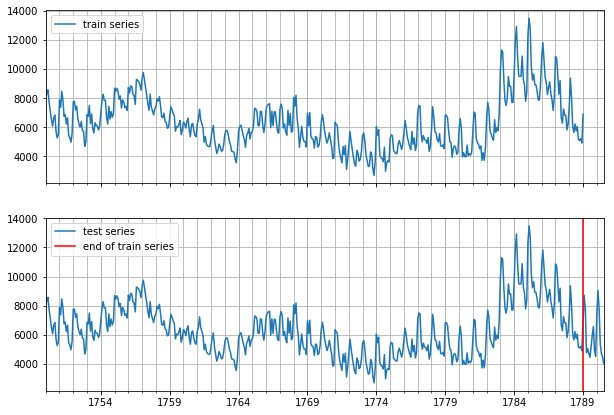

In [10]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [11]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [12]:
######################
### deepar wrapper ###
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):

    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=batches,
        learning_rate=1e-3,
    )
    
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality= [
            feat_static_cat.cardinality 
            for feat_static_cat in dataset.metadata.feat_static_cat
        ],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True
    )

    # predictor = estimator.train(training_data=dataset.train,
    #                             validation_data=dataset.test)
    predictor = estimator.train(training_data=dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = batches

    df = pd.DataFrame([output])

    return df

## Results

In [13]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly", seed=i, epochs=500, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 100/100 [00:06<00:00, 14.55it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[0] Elapsed time 6.883 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.339743
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.67it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 6.385 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.593208
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 14.99it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 6.680 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.064031
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.49it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[3] Elapsed time 6.459 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.885445
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 12.63it/s, avg_epoch_los

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.562107
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.74it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[37] Elapsed time 6.359 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.220405
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 16.20it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[38] Elapsed time 6.178 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.130503
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 15.36it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[39] Elapsed time 6.517 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.650110
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:06<00:00, 15.77it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[40] Elapsed time 6.352 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.44

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.24it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[73] Elapsed time 6.163 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.381717
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.04it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[74] Elapsed time 6.242 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.336133
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.61it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[75] Elapsed time 6.024 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.064995
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.39it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[76] Elapsed time 5.753 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.415286
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.86it/s, avg_epoch_loss=6.49]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.92it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[110] Elapsed time 5.288 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.612596
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.83it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[111] Elapsed time 5.614 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.213229
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 16.99it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[112] Elapsed time 5.892 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.897016
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.20it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[113] Elapsed time 5.820 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.735886
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.57it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.942593
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.82it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[147] Elapsed time 6.325 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.483937
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.45it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 6.082 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.223253
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.04it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[149] Elapsed time 6.241 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.961318
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.46it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 6.922 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.784333
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.99it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[220] Elapsed time 6.257 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.459163
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.98it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[221] Elapsed time 6.681 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.892856
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.10it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[222] Elapsed time 6.219 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.943647
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.03it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[223] Elapsed time 6.247 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.340630
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.81it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.442852
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.94it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[257] Elapsed time 6.283 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.762918
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.53it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[258] Elapsed time 6.886 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.314041
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.02it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[259] Elapsed time 6.253 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.891253
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.12it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[260] Elapsed time 6.209 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.188623
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.27it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[330] Elapsed time 5.795 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.977173
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.82it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[331] Elapsed time 5.624 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.682223
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.17it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[332] Elapsed time 5.829 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.735933
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.06it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[333] Elapsed time 5.866 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.900222
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.66it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.552247
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.02it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[367] Elapsed time 6.250 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.520898
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.14it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[368] Elapsed time 6.612 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.921547
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.10it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[369] Elapsed time 6.218 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.606679
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.98it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[370] Elapsed time 6.275 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.542379
INFO:root:Epoch[371] Learning rate is 5e-05

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.52it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[440] Elapsed time 6.058 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.850653
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.22it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[441] Elapsed time 6.175 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.496253
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.83it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[442] Elapsed time 6.324 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=7.293639
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.83it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[443] Elapsed time 6.324 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.047520
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.82it/s, avg_epoch_l

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.562034
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.12it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[477] Elapsed time 6.212 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.535486
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.40it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[478] Elapsed time 6.104 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.832220
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.81it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[479] Elapsed time 6.331 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.557269
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.64it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[480] Elapsed time 6.399 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.466859
INFO:root:Epoch[481] Learning rate is 5e-05

      MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.08007  0.137514  12.07171            0.125202            0.074325    42   

   epochs  num_batches  
0     500          100  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 100/100 [00:05<00:00, 16.84it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[0] Elapsed time 5.950 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.672763
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 16.36it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[1] Elapsed time 6.117 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.710754
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 16.09it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 6.223 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.072100
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 17.61it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[3] Elapsed time 5.683 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.832799
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.80it/s, avg_epoch_los

100%|██████████| 100/100 [00:06<00:00, 15.96it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[37] Elapsed time 6.285 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.905380
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.94it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[38] Elapsed time 7.180 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.172745
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.44it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[39] Elapsed time 6.483 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.639788
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.87it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[40] Elapsed time 6.310 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.200950
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.67it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[41] Elapsed time 6.392 seconds

100%|██████████| 100/100 [00:06<00:00, 16.01it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[74] Elapsed time 6.249 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.881898
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 14.98it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[75] Elapsed time 6.685 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.768326
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.68it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[76] Elapsed time 6.383 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.285188
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.63it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[77] Elapsed time 6.400 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.585707
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 14.38it/s, avg_epoc

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.76it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[110] Elapsed time 6.349 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.375949
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.12it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[111] Elapsed time 6.212 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.913232
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.69it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[112] Elapsed time 6.380 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.856688
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.72it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[113] Elapsed time 6.802 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.931393
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.19it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.813688
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.94it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[147] Elapsed time 6.275 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.252282
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.48it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[148] Elapsed time 6.468 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.138761
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.40it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[149] Elapsed time 8.069 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.086699
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.92it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[150] Elapsed time 6.710 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.362519
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.39it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[220] Elapsed time 5.757 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.670253
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.86it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[221] Elapsed time 5.604 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.803087
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.81it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[222] Elapsed time 5.620 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.621648
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.56it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[223] Elapsed time 5.394 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.640188
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.47it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.670442
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.91it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[257] Elapsed time 6.710 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.777771
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.45it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[258] Elapsed time 6.479 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.901082
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.18it/s, avg_epoch_loss=6]
INFO:root:Epoch[259] Elapsed time 6.184 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.998576
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.45it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[260] Elapsed time 6.082 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.111452
INFO:root:Epoch[261] Learning rate is 5e-05
100

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.60it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[330] Elapsed time 6.856 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.630244
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.86it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[331] Elapsed time 6.308 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.758256
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.15it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[332] Elapsed time 6.609 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.869036
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.00it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[333] Elapsed time 6.675 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.644354
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.45it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.507945
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.05it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[367] Elapsed time 6.653 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=7.159296
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.50it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[368] Elapsed time 6.460 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.533008
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.57it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[369] Elapsed time 6.429 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.786694
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.87it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[370] Elapsed time 6.733 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.586718
INFO:root:Epoch[371] Learning rate is 5e-05

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.96it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[440] Elapsed time 5.577 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.782549
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.97it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[441] Elapsed time 5.569 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.419908
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.53it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[442] Elapsed time 5.712 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=7.322228
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.90it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[443] Elapsed time 5.591 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.148981
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 16.72it/s, avg_epoch_

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.402316
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.42it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[477] Elapsed time 6.098 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.681325
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.12it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[478] Elapsed time 6.211 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.724408
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.92it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[479] Elapsed time 6.708 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.571439
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.53it/s, avg_epoch_loss=5.13]
INFO:root:Epoch[480] Elapsed time 6.446 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.131780
INFO:root:Epoch[481] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.046584  0.135353  12.595022            0.123118             0.07504   

   seed  epochs  num_batches  
0    43     500          100  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 100/100 [00:06<00:00, 14.70it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[0] Elapsed time 6.805 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.351309
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.33it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 7.503 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.614434
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 13.34it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[2] Elapsed time 7.501 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.956082
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:06<00:00, 15.20it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[3] Elapsed time 6.583 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.830393
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:07<00:00, 14.24it/s, avg_epoch_los

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.575260
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.25it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[37] Elapsed time 6.564 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.096437
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.01it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[38] Elapsed time 6.671 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.140711
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.12it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[39] Elapsed time 6.622 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.314624
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:06<00:00, 15.66it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[40] Elapsed time 6.394 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.287037
INFO:root:Epoch[41] Learning rate is 0.00025
100%

INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:06<00:00, 16.29it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[73] Elapsed time 6.146 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.197777
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:06<00:00, 16.02it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[74] Elapsed time 6.247 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.257226
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.44it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[75] Elapsed time 6.483 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.054463
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.42it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[76] Elapsed time 6.493 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.985786
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 1

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.705382
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.88it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[110] Elapsed time 5.601 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.393968
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.89it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[111] Elapsed time 5.595 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.107483
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.47it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[112] Elapsed time 5.418 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.088457
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 16.87it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[113] Elapsed time 5.932 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.760171
INFO:root:Epoch[114] Learning rate is 5e-05

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:07<00:00, 14.12it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[183] Elapsed time 7.089 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.969663
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.95it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[184] Elapsed time 6.276 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.504895
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.05it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[185] Elapsed time 6.237 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.378872
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.05it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[186] Elapsed time 6.236 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.975571
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.24it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.048723
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.29it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[220] Elapsed time 6.550 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.994406
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.31it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[221] Elapsed time 6.539 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.678899
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:07<00:00, 14.25it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[222] Elapsed time 7.024 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.491057
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 16.10it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[223] Elapsed time 6.216 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.822425
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.97it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[293] Elapsed time 6.682 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.414983
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.76it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[294] Elapsed time 6.350 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.887935
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.86it/s, avg_epoch_loss=6]
INFO:root:Epoch[295] Elapsed time 6.313 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.003826
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.20it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[296] Elapsed time 6.584 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.685926
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.43it/s, avg_epoch_los

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.734307
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.72it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[330] Elapsed time 6.803 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.639015
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.90it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[331] Elapsed time 6.297 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.105034
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.94it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[332] Elapsed time 6.698 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.588563
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:07<00:00, 13.76it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[333] Elapsed time 7.278 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.635613
INFO:root:Epoch[334] Learning rate is 5e-05

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.62it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[403] Elapsed time 6.406 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.550174
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.97it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[404] Elapsed time 6.270 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.830566
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.24it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[405] Elapsed time 6.572 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.649751
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.83it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[406] Elapsed time 6.322 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.303380
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.29it/s, avg_epoch_l

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.393976
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.74it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[440] Elapsed time 6.359 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.209668
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.99it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[441] Elapsed time 6.263 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.830816
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 15.80it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[442] Elapsed time 6.340 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.515646
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:06<00:00, 14.45it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[443] Elapsed time 6.931 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=7.146542
INFO:root:Epoch[444] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.031462  0.136217  12.681196            0.121951            0.074391   

   seed  epochs  num_batches  
0    44     500          100  
m4_monthly


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.080070,0.137514,12.071710,0.125202,0.074325,42,500,100
0,1.046584,0.135353,12.595022,0.123118,0.075040,43,500,100
0,1.031462,0.136217,12.681196,0.121951,0.074391,44,500,100


In [13]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly", seed=i, epochs=3000, batches=50)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:01<00:00, 26.32it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[0] Elapsed time 1.902 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.579082
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 30.79it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[1] Elapsed time 1.625 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.100405
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 32.03it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[2] Elapsed time 1.562 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.644685
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 31.68it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 1.580 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.541731
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.21it/s, avg_epoch_loss=7.53]
INF

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 32.57it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[37] Elapsed time 1.537 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.125034
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.68it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[38] Elapsed time 1.808 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.473612
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 32.95it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 1.519 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.530759
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 33.31it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[40] Elapsed time 1.502 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.829240
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 32.87it/s, avg_epoch_loss=6.61]
IN

100%|██████████| 50/50 [00:01<00:00, 33.21it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[73] Elapsed time 1.507 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.571841
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.98it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[74] Elapsed time 1.517 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.439447
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.66it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 1.532 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.243110
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.44it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[76] Elapsed time 1.543 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.268122
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.96it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[77] Elapsed time 1.518 seconds
INFO:roo

100%|██████████| 50/50 [00:01<00:00, 32.87it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[110] Elapsed time 1.523 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.353758
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.82it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[111] Elapsed time 1.573 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.521058
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.54it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[112] Elapsed time 1.538 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.872325
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.49it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[113] Elapsed time 1.589 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.423278
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.05it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[114] Elapsed time 1.612 sec

100%|██████████| 50/50 [00:01<00:00, 33.38it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[147] Elapsed time 1.499 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.067187
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.17it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[148] Elapsed time 1.508 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.833996
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.59it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[149] Elapsed time 1.490 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.646014
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.41it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[150] Elapsed time 1.498 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.847782
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.45it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[151] Elapsed time 1.543 sec

100%|██████████| 50/50 [00:01<00:00, 32.62it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[184] Elapsed time 1.534 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.596124
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.36it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[185] Elapsed time 1.547 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.162285
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.34it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[186] Elapsed time 1.547 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.934897
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.72it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[187] Elapsed time 1.805 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=7.278567
INFO:root:Epoch[188] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.35it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[188] Elapsed time 1.501 seco

100%|██████████| 50/50 [00:01<00:00, 31.21it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[221] Elapsed time 1.604 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.436170
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.26it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[222] Elapsed time 1.504 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.231448
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.99it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[223] Elapsed time 1.517 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.992286
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.56it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[224] Elapsed time 1.537 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=5.899136
INFO:root:Epoch[225] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.23it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[225] Elapsed time 1.553 seco

100%|██████████| 50/50 [00:01<00:00, 32.43it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[258] Elapsed time 1.543 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.275659
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.94it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[259] Elapsed time 1.520 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.956986
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.27it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[260] Elapsed time 1.552 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=5.966202
INFO:root:Epoch[261] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.20it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[261] Elapsed time 1.555 seconds
INFO:root:Epoch[261] Evaluation metric 'epoch_loss'=6.418881
INFO:root:Epoch[262] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.06it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[262] Elapsed time 1.611 sec

100%|██████████| 50/50 [00:01<00:00, 33.32it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[295] Elapsed time 1.502 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.891944
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.50it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[296] Elapsed time 1.494 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.767813
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.15it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[297] Elapsed time 1.510 seconds
INFO:root:Epoch[297] Evaluation metric 'epoch_loss'=6.583902
INFO:root:Epoch[298] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.62it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[298] Elapsed time 1.489 seconds
INFO:root:Epoch[298] Evaluation metric 'epoch_loss'=7.271322
INFO:root:Epoch[299] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.48it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[299] Elapsed time 1.495 sec

100%|██████████| 50/50 [00:01<00:00, 33.11it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[332] Elapsed time 1.511 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.302005
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.37it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[333] Elapsed time 1.546 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.304452
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.08it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[334] Elapsed time 1.560 seconds
INFO:root:Epoch[334] Evaluation metric 'epoch_loss'=6.832819
INFO:root:Epoch[335] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.34it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[335] Elapsed time 1.547 seconds
INFO:root:Epoch[335] Evaluation metric 'epoch_loss'=6.884938
INFO:root:Epoch[336] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[336] Elapsed time 1.787 second

100%|██████████| 50/50 [00:01<00:00, 32.87it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[369] Elapsed time 1.522 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.125286
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.83it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[370] Elapsed time 1.524 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.329436
INFO:root:Epoch[371] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.21it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[371] Elapsed time 1.507 seconds
INFO:root:Epoch[371] Evaluation metric 'epoch_loss'=6.238949
INFO:root:Epoch[372] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.42it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[372] Elapsed time 1.497 seconds
INFO:root:Epoch[372] Evaluation metric 'epoch_loss'=5.894238
INFO:root:Epoch[373] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.57it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[373] Elapsed time 1.536 sec

100%|██████████| 50/50 [00:01<00:00, 31.19it/s, avg_epoch_loss=7.48]
INFO:root:Epoch[406] Elapsed time 1.604 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=7.477292
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.81it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[407] Elapsed time 1.624 seconds
INFO:root:Epoch[407] Evaluation metric 'epoch_loss'=7.169418
INFO:root:Epoch[408] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.50it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[408] Elapsed time 1.540 seconds
INFO:root:Epoch[408] Evaluation metric 'epoch_loss'=5.832685
INFO:root:Epoch[409] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.84it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[409] Elapsed time 1.524 seconds
INFO:root:Epoch[409] Evaluation metric 'epoch_loss'=5.711723
INFO:root:Epoch[410] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.52it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[410] Elapsed time 1.588 sec

100%|██████████| 50/50 [00:01<00:00, 27.03it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[443] Elapsed time 1.852 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.943601
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.89it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[444] Elapsed time 1.674 seconds
INFO:root:Epoch[444] Evaluation metric 'epoch_loss'=6.261996
INFO:root:Epoch[445] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.92it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[445] Elapsed time 1.673 seconds
INFO:root:Epoch[445] Evaluation metric 'epoch_loss'=5.574786
INFO:root:Epoch[446] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.88it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[446] Elapsed time 1.675 seconds
INFO:root:Epoch[446] Evaluation metric 'epoch_loss'=5.931777
INFO:root:Epoch[447] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.80it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[447] Elapsed time 1.625 sec

100%|██████████| 50/50 [00:01<00:00, 29.34it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[480] Elapsed time 1.706 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=6.742883
INFO:root:Epoch[481] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.11it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[481] Elapsed time 1.512 seconds
INFO:root:Epoch[481] Evaluation metric 'epoch_loss'=5.610246
INFO:root:Epoch[482] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.92it/s, avg_epoch_loss=5.15]
INFO:root:Epoch[482] Elapsed time 1.520 seconds
INFO:root:Epoch[482] Evaluation metric 'epoch_loss'=5.145477
INFO:root:Epoch[483] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.12it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[483] Elapsed time 1.558 seconds
INFO:root:Epoch[483] Evaluation metric 'epoch_loss'=5.782792
INFO:root:Epoch[484] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.23it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[484] Elapsed time 1.553 sec

100%|██████████| 50/50 [00:01<00:00, 33.13it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[517] Elapsed time 1.511 seconds
INFO:root:Epoch[517] Evaluation metric 'epoch_loss'=5.505559
INFO:root:Epoch[518] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.02it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[518] Elapsed time 1.516 seconds
INFO:root:Epoch[518] Evaluation metric 'epoch_loss'=5.347400
INFO:root:Epoch[519] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.66it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[519] Elapsed time 1.532 seconds
INFO:root:Epoch[519] Evaluation metric 'epoch_loss'=6.406814
INFO:root:Epoch[520] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.86it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[520] Elapsed time 1.523 seconds
INFO:root:Epoch[520] Evaluation metric 'epoch_loss'=6.276548
INFO:root:Epoch[521] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.19it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[521] Elapsed time 1.508 sec

100%|██████████| 50/50 [00:01<00:00, 30.04it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[554] Elapsed time 1.666 seconds
INFO:root:Epoch[554] Evaluation metric 'epoch_loss'=5.900445
INFO:root:Epoch[555] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.02it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[555] Elapsed time 1.668 seconds
INFO:root:Epoch[555] Evaluation metric 'epoch_loss'=7.091680
INFO:root:Epoch[556] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.63it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[556] Elapsed time 1.811 seconds
INFO:root:Epoch[556] Evaluation metric 'epoch_loss'=7.724576
INFO:root:Epoch[557] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.85it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[557] Elapsed time 1.677 seconds
INFO:root:Epoch[557] Evaluation metric 'epoch_loss'=6.160793
INFO:root:Epoch[558] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.09it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[558] Elapsed time 1.663 seco

100%|██████████| 50/50 [00:01<00:00, 31.40it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[591] Elapsed time 1.594 seconds
INFO:root:Epoch[591] Evaluation metric 'epoch_loss'=6.891398
INFO:root:Epoch[592] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.32it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[592] Elapsed time 1.597 seconds
INFO:root:Epoch[592] Evaluation metric 'epoch_loss'=6.467230
INFO:root:Epoch[593] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.91it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[593] Elapsed time 1.673 seconds
INFO:root:Epoch[593] Evaluation metric 'epoch_loss'=6.893634
INFO:root:Epoch[594] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.00it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[594] Elapsed time 1.516 seconds
INFO:root:Epoch[594] Evaluation metric 'epoch_loss'=5.716300
INFO:root:Epoch[595] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.99it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[595] Elapsed time 1.517 sec

100%|██████████| 50/50 [00:01<00:00, 32.77it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[628] Elapsed time 1.527 seconds
INFO:root:Epoch[628] Evaluation metric 'epoch_loss'=6.748859
INFO:root:Epoch[629] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.50it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[629] Elapsed time 1.540 seconds
INFO:root:Epoch[629] Evaluation metric 'epoch_loss'=6.747710
INFO:root:Epoch[630] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.13it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[630] Elapsed time 1.779 seconds
INFO:root:Epoch[630] Evaluation metric 'epoch_loss'=6.627821
INFO:root:Epoch[631] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.17it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[631] Elapsed time 1.556 seconds
INFO:root:Epoch[631] Evaluation metric 'epoch_loss'=5.382102
INFO:root:Epoch[632] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.47it/s, avg_epoch_loss=5.09]
INFO:root:Epoch[632] Elapsed time 1.542 sec

100%|██████████| 50/50 [00:01<00:00, 30.08it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[665] Elapsed time 1.663 seconds
INFO:root:Epoch[665] Evaluation metric 'epoch_loss'=6.885305
INFO:root:Epoch[666] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.59it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[666] Elapsed time 1.691 seconds
INFO:root:Epoch[666] Evaluation metric 'epoch_loss'=6.539839
INFO:root:Epoch[667] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.95it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[667] Elapsed time 1.519 seconds
INFO:root:Epoch[667] Evaluation metric 'epoch_loss'=5.245381
INFO:root:Epoch[668] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.12it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[668] Elapsed time 1.511 seconds
INFO:root:Epoch[668] Evaluation metric 'epoch_loss'=5.607073
INFO:root:Epoch[669] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.80it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[669] Elapsed time 1.526 sec

100%|██████████| 50/50 [00:01<00:00, 33.19it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[702] Elapsed time 1.508 seconds
INFO:root:Epoch[702] Evaluation metric 'epoch_loss'=5.709661
INFO:root:Epoch[703] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.46it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[703] Elapsed time 1.542 seconds
INFO:root:Epoch[703] Evaluation metric 'epoch_loss'=5.536874
INFO:root:Epoch[704] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 32.67it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[704] Elapsed time 1.532 seconds
INFO:root:Epoch[704] Evaluation metric 'epoch_loss'=5.540778
INFO:root:Epoch[705] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 33.24it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[705] Elapsed time 1.505 seconds
INFO:root:Epoch[705] Evaluation metric 'epoch_loss'=7.163670
INFO:root:Epoch[706] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.57it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[706] Elapsed time 1.637 sec

100%|██████████| 50/50 [00:01<00:00, 28.71it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[739] Elapsed time 1.743 seconds
INFO:root:Epoch[739] Evaluation metric 'epoch_loss'=5.635372
INFO:root:Epoch[740] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.57it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[740] Elapsed time 1.815 seconds
INFO:root:Epoch[740] Evaluation metric 'epoch_loss'=6.213209
INFO:root:Epoch[741] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[741] Elapsed time 1.879 seconds
INFO:root:Epoch[741] Evaluation metric 'epoch_loss'=6.860292
INFO:root:Epoch[742] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.89it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[742] Elapsed time 1.861 seconds
INFO:root:Epoch[742] Evaluation metric 'epoch_loss'=6.408843
INFO:root:Epoch[743] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.28it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[743] Elapsed time 2.062 sec

100%|██████████| 50/50 [00:01<00:00, 27.10it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[776] Elapsed time 1.847 seconds
INFO:root:Epoch[776] Evaluation metric 'epoch_loss'=6.365187
INFO:root:Epoch[777] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.53it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[777] Elapsed time 1.754 seconds
INFO:root:Epoch[777] Evaluation metric 'epoch_loss'=6.901718
INFO:root:Epoch[778] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.15it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[778] Elapsed time 1.717 seconds
INFO:root:Epoch[778] Evaluation metric 'epoch_loss'=6.504655
INFO:root:Epoch[779] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.44it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[779] Elapsed time 1.700 seconds
INFO:root:Epoch[779] Evaluation metric 'epoch_loss'=6.791101
INFO:root:Epoch[780] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.98it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[780] Elapsed time 1.855 secon

100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[813] Elapsed time 1.751 seconds
INFO:root:Epoch[813] Evaluation metric 'epoch_loss'=6.855920
INFO:root:Epoch[814] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.69it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[814] Elapsed time 1.686 seconds
INFO:root:Epoch[814] Evaluation metric 'epoch_loss'=6.713618
INFO:root:Epoch[815] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.52it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[815] Elapsed time 1.961 seconds
INFO:root:Epoch[815] Evaluation metric 'epoch_loss'=6.874799
INFO:root:Epoch[816] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.19it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[816] Elapsed time 1.658 seconds
INFO:root:Epoch[816] Evaluation metric 'epoch_loss'=5.659018
INFO:root:Epoch[817] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.82it/s, avg_epoch_loss=5.18]
INFO:root:Epoch[817] Elapsed time 1.678 sec

100%|██████████| 50/50 [00:01<00:00, 28.09it/s, avg_epoch_loss=6]
INFO:root:Epoch[850] Elapsed time 1.782 seconds
INFO:root:Epoch[850] Evaluation metric 'epoch_loss'=5.999733
INFO:root:Epoch[851] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.62it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[851] Elapsed time 1.749 seconds
INFO:root:Epoch[851] Evaluation metric 'epoch_loss'=5.690671
INFO:root:Epoch[852] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.61it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[852] Elapsed time 1.813 seconds
INFO:root:Epoch[852] Evaluation metric 'epoch_loss'=5.588928
INFO:root:Epoch[853] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[853] Elapsed time 1.826 seconds
INFO:root:Epoch[853] Evaluation metric 'epoch_loss'=5.435739
INFO:root:Epoch[854] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.88it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[854] Elapsed time 1.796 seconds

100%|██████████| 50/50 [00:01<00:00, 28.71it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[887] Elapsed time 1.744 seconds
INFO:root:Epoch[887] Evaluation metric 'epoch_loss'=5.547682
INFO:root:Epoch[888] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[888] Elapsed time 1.719 seconds
INFO:root:Epoch[888] Evaluation metric 'epoch_loss'=5.452529
INFO:root:Epoch[889] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.46it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[889] Elapsed time 1.759 seconds
INFO:root:Epoch[889] Evaluation metric 'epoch_loss'=6.179308
INFO:root:Epoch[890] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.19it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[890] Elapsed time 1.775 seconds
INFO:root:Epoch[890] Evaluation metric 'epoch_loss'=6.504242
INFO:root:Epoch[891] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.87it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[891] Elapsed time 1.796 seco

100%|██████████| 50/50 [00:01<00:00, 27.02it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[924] Elapsed time 1.852 seconds
INFO:root:Epoch[924] Evaluation metric 'epoch_loss'=5.410690
INFO:root:Epoch[925] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.30it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[925] Elapsed time 1.834 seconds
INFO:root:Epoch[925] Evaluation metric 'epoch_loss'=5.763510
INFO:root:Epoch[926] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.82it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[926] Elapsed time 1.799 seconds
INFO:root:Epoch[926] Evaluation metric 'epoch_loss'=6.543198
INFO:root:Epoch[927] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.47it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[927] Elapsed time 1.822 seconds
INFO:root:Epoch[927] Evaluation metric 'epoch_loss'=7.154816
INFO:root:Epoch[928] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.46it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[928] Elapsed time 1.822 sec

100%|██████████| 50/50 [00:01<00:00, 29.62it/s, avg_epoch_loss=4.99]
INFO:root:Epoch[961] Elapsed time 1.689 seconds
INFO:root:Epoch[961] Evaluation metric 'epoch_loss'=4.986304
INFO:root:Epoch[962] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.25it/s, avg_epoch_loss=5.18]
INFO:root:Epoch[962] Elapsed time 1.711 seconds
INFO:root:Epoch[962] Evaluation metric 'epoch_loss'=5.180433
INFO:root:Epoch[963] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.67it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[963] Elapsed time 1.746 seconds
INFO:root:Epoch[963] Evaluation metric 'epoch_loss'=6.756901
INFO:root:Epoch[964] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.33it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[964] Elapsed time 1.706 seconds
INFO:root:Epoch[964] Evaluation metric 'epoch_loss'=6.712778
INFO:root:Epoch[965] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.27it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[965] Elapsed time 1.980 sec

100%|██████████| 50/50 [00:01<00:00, 27.72it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[998] Elapsed time 1.807 seconds
INFO:root:Epoch[998] Evaluation metric 'epoch_loss'=6.214146
INFO:root:Epoch[999] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.69it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[999] Elapsed time 1.745 seconds
INFO:root:Epoch[999] Evaluation metric 'epoch_loss'=6.270513
INFO:root:Epoch[1000] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.33it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[1000] Elapsed time 1.831 seconds
INFO:root:Epoch[1000] Evaluation metric 'epoch_loss'=5.906483
INFO:root:Epoch[1001] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.13it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[1001] Elapsed time 1.845 seconds
INFO:root:Epoch[1001] Evaluation metric 'epoch_loss'=5.656345
INFO:root:Epoch[1002] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1002] Elapsed time 1

INFO:root:Epoch[1034] Evaluation metric 'epoch_loss'=7.067246
INFO:root:Epoch[1035] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.61it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[1035] Elapsed time 1.881 seconds
INFO:root:Epoch[1035] Evaluation metric 'epoch_loss'=7.346512
INFO:root:Epoch[1036] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.33it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[1036] Elapsed time 1.975 seconds
INFO:root:Epoch[1036] Evaluation metric 'epoch_loss'=6.732904
INFO:root:Epoch[1037] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.53it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[1037] Elapsed time 1.754 seconds
INFO:root:Epoch[1037] Evaluation metric 'epoch_loss'=5.613477
INFO:root:Epoch[1038] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.88it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[1038] Elapsed time 1.795 seconds
INFO:root:Epoch[1038] Evaluation metric 'epoch_loss'=5.476316
INFO:root:Epoch[1039] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.41it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[1071] Elapsed time 1.895 seconds
INFO:root:Epoch[1071] Evaluation metric 'epoch_loss'=6.667929
INFO:root:Epoch[1072] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.94it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[1072] Elapsed time 2.006 seconds
INFO:root:Epoch[1072] Evaluation metric 'epoch_loss'=6.971378
INFO:root:Epoch[1073] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.83it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1073] Elapsed time 1.866 seconds
INFO:root:Epoch[1073] Evaluation metric 'epoch_loss'=5.965633
INFO:root:Epoch[1074] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.81it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[1074] Elapsed time 1.866 seconds
INFO:root:Epoch[1074] Evaluation metric 'epoch_loss'=5.364644
INFO:root:Epoch[1075] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.01it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[1075] Elapsed t

INFO:root:Epoch[1107] Evaluation metric 'epoch_loss'=7.090725
INFO:root:Epoch[1108] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.24it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[1108] Elapsed time 1.772 seconds
INFO:root:Epoch[1108] Evaluation metric 'epoch_loss'=6.539174
INFO:root:Epoch[1109] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.89it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[1109] Elapsed time 1.862 seconds
INFO:root:Epoch[1109] Evaluation metric 'epoch_loss'=6.617643
INFO:root:Epoch[1110] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.35it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[1110] Elapsed time 1.705 seconds
INFO:root:Epoch[1110] Evaluation metric 'epoch_loss'=5.563218
INFO:root:Epoch[1111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.37it/s, avg_epoch_loss=4.98]
INFO:root:Epoch[1111] Elapsed time 1.704 seconds
INFO:root:Epoch[1111] Evaluation metric 'epoch_loss'=4.977245
INFO:root:Epoch[1112] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.19it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[1144] Elapsed time 1.911 seconds
INFO:root:Epoch[1144] Evaluation metric 'epoch_loss'=6.644726
INFO:root:Epoch[1145] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.69it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[1145] Elapsed time 2.027 seconds
INFO:root:Epoch[1145] Evaluation metric 'epoch_loss'=6.755100
INFO:root:Epoch[1146] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.13it/s, avg_epoch_loss=5.18]
INFO:root:Epoch[1146] Elapsed time 1.661 seconds
INFO:root:Epoch[1146] Evaluation metric 'epoch_loss'=5.180971
INFO:root:Epoch[1147] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.18it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[1147] Elapsed time 1.715 seconds
INFO:root:Epoch[1147] Evaluation metric 'epoch_loss'=5.557221
INFO:root:Epoch[1148] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.37it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[1148] Elapsed t

INFO:root:Epoch[1180] Evaluation metric 'epoch_loss'=5.726814
INFO:root:Epoch[1181] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.88it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[1181] Elapsed time 1.862 seconds
INFO:root:Epoch[1181] Evaluation metric 'epoch_loss'=5.681938
INFO:root:Epoch[1182] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.64it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[1182] Elapsed time 1.749 seconds
INFO:root:Epoch[1182] Evaluation metric 'epoch_loss'=5.282311
INFO:root:Epoch[1183] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.01it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[1183] Elapsed time 1.789 seconds
INFO:root:Epoch[1183] Evaluation metric 'epoch_loss'=6.230495
INFO:root:Epoch[1184] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.42it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[1184] Elapsed time 2.049 seconds
INFO:root:Epoch[1184] Evaluation metric 'epoch_loss'=7.110475
INFO:root:Epoch[1185] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.88it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[1217] Elapsed time 1.795 seconds
INFO:root:Epoch[1217] Evaluation metric 'epoch_loss'=5.439290
INFO:root:Epoch[1218] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.83it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[1218] Elapsed time 1.799 seconds
INFO:root:Epoch[1218] Evaluation metric 'epoch_loss'=5.866657
INFO:root:Epoch[1219] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.34it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[1219] Elapsed time 1.766 seconds
INFO:root:Epoch[1219] Evaluation metric 'epoch_loss'=6.331545
INFO:root:Epoch[1220] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[1220] Elapsed time 1.750 seconds
INFO:root:Epoch[1220] Evaluation metric 'epoch_loss'=6.710911
INFO:root:Epoch[1221] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.04it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[1221] Elapsed t

INFO:root:Epoch[1253] Evaluation metric 'epoch_loss'=5.328484
INFO:root:Epoch[1254] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.55it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[1254] Elapsed time 1.885 seconds
INFO:root:Epoch[1254] Evaluation metric 'epoch_loss'=5.662628
INFO:root:Epoch[1255] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.37it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[1255] Elapsed time 1.704 seconds
INFO:root:Epoch[1255] Evaluation metric 'epoch_loss'=6.482561
INFO:root:Epoch[1256] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.00it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[1256] Elapsed time 1.726 seconds
INFO:root:Epoch[1256] Evaluation metric 'epoch_loss'=7.088495
INFO:root:Epoch[1257] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.55it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[1257] Elapsed time 1.753 seconds
INFO:root:Epoch[1257] Evaluation metric 'epoch_loss'=6.689171
INFO:root:Epoch[1258] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.66it/s, avg_epoch_loss=4.9]
INFO:root:Epoch[1290] Elapsed time 1.687 seconds
INFO:root:Epoch[1290] Evaluation metric 'epoch_loss'=4.899949
INFO:root:Epoch[1291] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.98it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[1291] Elapsed time 1.727 seconds
INFO:root:Epoch[1291] Evaluation metric 'epoch_loss'=5.655360
INFO:root:Epoch[1292] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.86it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[1292] Elapsed time 1.734 seconds
INFO:root:Epoch[1292] Evaluation metric 'epoch_loss'=6.739646
INFO:root:Epoch[1293] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.27it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[1293] Elapsed time 1.710 seconds
INFO:root:Epoch[1293] Evaluation metric 'epoch_loss'=6.573279
INFO:root:Epoch[1294] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.65it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[1294] Elapsed ti

INFO:root:Epoch[1326] Evaluation metric 'epoch_loss'=5.283049
INFO:root:Epoch[1327] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.12it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[1327] Elapsed time 1.845 seconds
INFO:root:Epoch[1327] Evaluation metric 'epoch_loss'=6.315094
INFO:root:Epoch[1328] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.11it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[1328] Elapsed time 1.719 seconds
INFO:root:Epoch[1328] Evaluation metric 'epoch_loss'=6.114788
INFO:root:Epoch[1329] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.92it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[1329] Elapsed time 1.673 seconds
INFO:root:Epoch[1329] Evaluation metric 'epoch_loss'=5.980263
INFO:root:Epoch[1330] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.14it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[1330] Elapsed time 1.660 seconds
INFO:root:Epoch[1330] Evaluation metric 'epoch_loss'=5.670127
INFO:root:Epoch[1331] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.94it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[1363] Elapsed time 1.672 seconds
INFO:root:Epoch[1363] Evaluation metric 'epoch_loss'=6.981525
INFO:root:Epoch[1364] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.41it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[1364] Elapsed time 1.826 seconds
INFO:root:Epoch[1364] Evaluation metric 'epoch_loss'=7.602704
INFO:root:Epoch[1365] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.48it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[1365] Elapsed time 1.757 seconds
INFO:root:Epoch[1365] Evaluation metric 'epoch_loss'=6.072323
INFO:root:Epoch[1366] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.07it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[1366] Elapsed time 1.722 seconds
INFO:root:Epoch[1366] Evaluation metric 'epoch_loss'=5.504471
INFO:root:Epoch[1367] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.27it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[1367] Elapsed tim

INFO:root:Epoch[1399] Evaluation metric 'epoch_loss'=6.689441
INFO:root:Epoch[1400] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.56it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1400] Elapsed time 1.753 seconds
INFO:root:Epoch[1400] Evaluation metric 'epoch_loss'=6.450736
INFO:root:Epoch[1401] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.63it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[1401] Elapsed time 1.953 seconds
INFO:root:Epoch[1401] Evaluation metric 'epoch_loss'=7.008347
INFO:root:Epoch[1402] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.34it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[1402] Elapsed time 1.831 seconds
INFO:root:Epoch[1402] Evaluation metric 'epoch_loss'=5.728378
INFO:root:Epoch[1403] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.94it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[1403] Elapsed time 1.672 seconds
INFO:root:Epoch[1403] Evaluation metric 'epoch_loss'=5.327142
INFO:root:Epoch[1404] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.64it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[1436] Elapsed time 1.688 seconds
INFO:root:Epoch[1436] Evaluation metric 'epoch_loss'=6.985622
INFO:root:Epoch[1437] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.51it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1437] Elapsed time 1.696 seconds
INFO:root:Epoch[1437] Evaluation metric 'epoch_loss'=6.576590
INFO:root:Epoch[1438] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.68it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[1438] Elapsed time 1.949 seconds
INFO:root:Epoch[1438] Evaluation metric 'epoch_loss'=6.612212
INFO:root:Epoch[1439] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.52it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[1439] Elapsed time 1.819 seconds
INFO:root:Epoch[1439] Evaluation metric 'epoch_loss'=5.420327
INFO:root:Epoch[1440] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.35it/s, avg_epoch_loss=4.89]
INFO:root:Epoch[1440] Elapsed t

INFO:root:Epoch[1472] Evaluation metric 'epoch_loss'=6.724013
INFO:root:Epoch[1473] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.80it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[1473] Elapsed time 1.738 seconds
INFO:root:Epoch[1473] Evaluation metric 'epoch_loss'=6.615543
INFO:root:Epoch[1474] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.63it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1474] Elapsed time 2.118 seconds
INFO:root:Epoch[1474] Evaluation metric 'epoch_loss'=6.871799
INFO:root:Epoch[1475] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.82it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[1475] Elapsed time 1.679 seconds
INFO:root:Epoch[1475] Evaluation metric 'epoch_loss'=5.233026
INFO:root:Epoch[1476] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.63it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[1476] Elapsed time 1.689 seconds
INFO:root:Epoch[1476] Evaluation metric 'epoch_loss'=5.394746
INFO:root:Epoch[1477] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.73it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[1509] Elapsed time 1.742 seconds
INFO:root:Epoch[1509] Evaluation metric 'epoch_loss'=5.978467
INFO:root:Epoch[1510] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.94it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[1510] Elapsed time 1.858 seconds
INFO:root:Epoch[1510] Evaluation metric 'epoch_loss'=5.599115
INFO:root:Epoch[1511] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.06it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[1511] Elapsed time 1.849 seconds
INFO:root:Epoch[1511] Evaluation metric 'epoch_loss'=5.398713
INFO:root:Epoch[1512] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.83it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[1512] Elapsed time 1.865 seconds
INFO:root:Epoch[1512] Evaluation metric 'epoch_loss'=5.635717
INFO:root:Epoch[1513] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.44it/s, avg_epoch_loss=7]
INFO:root:Epoch[1513] Elapsed time 1

INFO:root:Epoch[1545] Evaluation metric 'epoch_loss'=6.397125
INFO:root:Epoch[1546] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.39it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[1546] Elapsed time 1.896 seconds
INFO:root:Epoch[1546] Evaluation metric 'epoch_loss'=5.438492
INFO:root:Epoch[1547] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.80it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[1547] Elapsed time 1.940 seconds
INFO:root:Epoch[1547] Evaluation metric 'epoch_loss'=5.454003
INFO:root:Epoch[1548] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.16it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[1548] Elapsed time 1.990 seconds
INFO:root:Epoch[1548] Evaluation metric 'epoch_loss'=6.088476
INFO:root:Epoch[1549] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.40it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[1549] Elapsed time 1.895 seconds
INFO:root:Epoch[1549] Evaluation metric 'epoch_loss'=6.725358
INFO:root:Epoch[1550] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.69it/s, avg_epoch_loss=5.81]
INFO:root:Epoch[1582] Elapsed time 1.875 seconds
INFO:root:Epoch[1582] Evaluation metric 'epoch_loss'=5.810961
INFO:root:Epoch[1583] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.62it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[1583] Elapsed time 1.953 seconds
INFO:root:Epoch[1583] Evaluation metric 'epoch_loss'=5.321463
INFO:root:Epoch[1584] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.43it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[1584] Elapsed time 1.824 seconds
INFO:root:Epoch[1584] Evaluation metric 'epoch_loss'=5.907179
INFO:root:Epoch[1585] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.60it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1585] Elapsed time 1.813 seconds
INFO:root:Epoch[1585] Evaluation metric 'epoch_loss'=6.662004
INFO:root:Epoch[1586] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.42it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1586] Elapsed t

INFO:root:Epoch[1618] Evaluation metric 'epoch_loss'=6.511514
INFO:root:Epoch[1619] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.13it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1619] Elapsed time 1.718 seconds
INFO:root:Epoch[1619] Evaluation metric 'epoch_loss'=5.340861
INFO:root:Epoch[1620] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.58it/s, avg_epoch_loss=4.9]
INFO:root:Epoch[1620] Elapsed time 1.815 seconds
INFO:root:Epoch[1620] Evaluation metric 'epoch_loss'=4.898942
INFO:root:Epoch[1621] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.63it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[1621] Elapsed time 1.811 seconds
INFO:root:Epoch[1621] Evaluation metric 'epoch_loss'=5.836795
INFO:root:Epoch[1622] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.88it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[1622] Elapsed time 1.733 seconds
INFO:root:Epoch[1622] Evaluation metric 'epoch_loss'=6.695218
INFO:root:Epoch[1623] Learning rate is 5

100%|██████████| 50/50 [00:01<00:00, 30.11it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1655] Elapsed time 1.662 seconds
INFO:root:Epoch[1655] Evaluation metric 'epoch_loss'=5.103875
INFO:root:Epoch[1656] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.11it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[1656] Elapsed time 1.781 seconds
INFO:root:Epoch[1656] Evaluation metric 'epoch_loss'=5.643132
INFO:root:Epoch[1657] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.32it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[1657] Elapsed time 1.767 seconds
INFO:root:Epoch[1657] Evaluation metric 'epoch_loss'=6.240301
INFO:root:Epoch[1658] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.45it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[1658] Elapsed time 1.759 seconds
INFO:root:Epoch[1658] Evaluation metric 'epoch_loss'=6.138314
INFO:root:Epoch[1659] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.14it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[1659] Elapsed tim

INFO:root:Epoch[1691] Evaluation metric 'epoch_loss'=5.273849
INFO:root:Epoch[1692] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.82it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[1692] Elapsed time 1.679 seconds
INFO:root:Epoch[1692] Evaluation metric 'epoch_loss'=5.908416
INFO:root:Epoch[1693] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.88it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[1693] Elapsed time 1.733 seconds
INFO:root:Epoch[1693] Evaluation metric 'epoch_loss'=7.033441
INFO:root:Epoch[1694] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.12it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[1694] Elapsed time 1.992 seconds
INFO:root:Epoch[1694] Evaluation metric 'epoch_loss'=7.558180
INFO:root:Epoch[1695] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.36it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[1695] Elapsed time 1.705 seconds
INFO:root:Epoch[1695] Evaluation metric 'epoch_loss'=5.978746
INFO:root:Epoch[1696] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 25.68it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[1728] Elapsed time 1.948 seconds
INFO:root:Epoch[1728] Evaluation metric 'epoch_loss'=6.153320
INFO:root:Epoch[1729] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.58it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[1729] Elapsed time 1.883 seconds
INFO:root:Epoch[1729] Evaluation metric 'epoch_loss'=6.809910
INFO:root:Epoch[1730] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.98it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[1730] Elapsed time 1.789 seconds
INFO:root:Epoch[1730] Evaluation metric 'epoch_loss'=6.282548
INFO:root:Epoch[1731] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.90it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[1731] Elapsed time 1.861 seconds
INFO:root:Epoch[1731] Evaluation metric 'epoch_loss'=6.909071
INFO:root:Epoch[1732] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[1732] Elapsed t

INFO:root:Epoch[1764] Evaluation metric 'epoch_loss'=6.379656
INFO:root:Epoch[1765] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.22it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[1765] Elapsed time 1.774 seconds
INFO:root:Epoch[1765] Evaluation metric 'epoch_loss'=7.120143
INFO:root:Epoch[1766] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.16it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[1766] Elapsed time 1.660 seconds
INFO:root:Epoch[1766] Evaluation metric 'epoch_loss'=6.346934
INFO:root:Epoch[1767] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.25it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1767] Elapsed time 1.771 seconds
INFO:root:Epoch[1767] Evaluation metric 'epoch_loss'=6.658942
INFO:root:Epoch[1768] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.67it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[1768] Elapsed time 1.876 seconds
INFO:root:Epoch[1768] Evaluation metric 'epoch_loss'=6.144377
INFO:root:Epoch[1769] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.30it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[1801] Elapsed time 1.833 seconds
INFO:root:Epoch[1801] Evaluation metric 'epoch_loss'=6.545284
INFO:root:Epoch[1802] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.73it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[1802] Elapsed time 1.872 seconds
INFO:root:Epoch[1802] Evaluation metric 'epoch_loss'=6.566802
INFO:root:Epoch[1803] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.49it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[1803] Elapsed time 2.044 seconds
INFO:root:Epoch[1803] Evaluation metric 'epoch_loss'=6.917161
INFO:root:Epoch[1804] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.19it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[1804] Elapsed time 1.841 seconds
INFO:root:Epoch[1804] Evaluation metric 'epoch_loss'=5.892413
INFO:root:Epoch[1805] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[1805] Elapsed t

INFO:root:Epoch[1837] Evaluation metric 'epoch_loss'=6.215968
INFO:root:Epoch[1838] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.33it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[1838] Elapsed time 1.707 seconds
INFO:root:Epoch[1838] Evaluation metric 'epoch_loss'=6.048082
INFO:root:Epoch[1839] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.82it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[1839] Elapsed time 1.678 seconds
INFO:root:Epoch[1839] Evaluation metric 'epoch_loss'=5.708935
INFO:root:Epoch[1840] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.54it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[1840] Elapsed time 1.817 seconds
INFO:root:Epoch[1840] Evaluation metric 'epoch_loss'=5.704159
INFO:root:Epoch[1841] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.92it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1841] Elapsed time 1.792 seconds
INFO:root:Epoch[1841] Evaluation metric 'epoch_loss'=5.098973
INFO:root:Epoch[1842] Learning rate is 5

100%|██████████| 50/50 [00:01<00:00, 28.64it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[1874] Elapsed time 1.748 seconds
INFO:root:Epoch[1874] Evaluation metric 'epoch_loss'=6.905798
INFO:root:Epoch[1875] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.79it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[1875] Elapsed time 1.681 seconds
INFO:root:Epoch[1875] Evaluation metric 'epoch_loss'=5.402290
INFO:root:Epoch[1876] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.85it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1876] Elapsed time 1.797 seconds
INFO:root:Epoch[1876] Evaluation metric 'epoch_loss'=5.349369
INFO:root:Epoch[1877] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.96it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[1877] Elapsed time 2.005 seconds
INFO:root:Epoch[1877] Evaluation metric 'epoch_loss'=6.202247
INFO:root:Epoch[1878] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.39it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[1878] Elapsed tim

INFO:root:Epoch[1910] Evaluation metric 'epoch_loss'=6.539716
INFO:root:Epoch[1911] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.09it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[1911] Elapsed time 1.721 seconds
INFO:root:Epoch[1911] Evaluation metric 'epoch_loss'=6.591377
INFO:root:Epoch[1912] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.71it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1912] Elapsed time 1.685 seconds
INFO:root:Epoch[1912] Evaluation metric 'epoch_loss'=5.343841
INFO:root:Epoch[1913] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.93it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[1913] Elapsed time 1.672 seconds
INFO:root:Epoch[1913] Evaluation metric 'epoch_loss'=5.436809
INFO:root:Epoch[1914] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.63it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[1914] Elapsed time 1.748 seconds
INFO:root:Epoch[1914] Evaluation metric 'epoch_loss'=6.398328
INFO:root:Epoch[1915] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 28.04it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[1947] Elapsed time 1.785 seconds
INFO:root:Epoch[1947] Evaluation metric 'epoch_loss'=6.616109
INFO:root:Epoch[1948] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[1948] Elapsed time 1.787 seconds
INFO:root:Epoch[1948] Evaluation metric 'epoch_loss'=5.863803
INFO:root:Epoch[1949] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=4.88]
INFO:root:Epoch[1949] Elapsed time 1.745 seconds
INFO:root:Epoch[1949] Evaluation metric 'epoch_loss'=4.884658
INFO:root:Epoch[1950] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.08it/s, avg_epoch_loss=4.9]
INFO:root:Epoch[1950] Elapsed time 1.848 seconds
INFO:root:Epoch[1950] Evaluation metric 'epoch_loss'=4.902072
INFO:root:Epoch[1951] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.03it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[1951] Elapsed ti

INFO:root:Epoch[1983] Evaluation metric 'epoch_loss'=6.915354
INFO:root:Epoch[1984] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.98it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1984] Elapsed time 2.004 seconds
INFO:root:Epoch[1984] Evaluation metric 'epoch_loss'=5.970173
INFO:root:Epoch[1985] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.39it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[1985] Elapsed time 1.703 seconds
INFO:root:Epoch[1985] Evaluation metric 'epoch_loss'=5.114486
INFO:root:Epoch[1986] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.37it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[1986] Elapsed time 1.764 seconds
INFO:root:Epoch[1986] Evaluation metric 'epoch_loss'=5.754902
INFO:root:Epoch[1987] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.94it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[1987] Elapsed time 1.792 seconds
INFO:root:Epoch[1987] Evaluation metric 'epoch_loss'=6.210733
INFO:root:Epoch[1988] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.96it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[2020] Elapsed time 1.790 seconds
INFO:root:Epoch[2020] Evaluation metric 'epoch_loss'=5.538282
INFO:root:Epoch[2021] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.50it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[2021] Elapsed time 1.697 seconds
INFO:root:Epoch[2021] Evaluation metric 'epoch_loss'=5.230533
INFO:root:Epoch[2022] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.52it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[2022] Elapsed time 1.819 seconds
INFO:root:Epoch[2022] Evaluation metric 'epoch_loss'=5.898929
INFO:root:Epoch[2023] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.55it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[2023] Elapsed time 1.816 seconds
INFO:root:Epoch[2023] Evaluation metric 'epoch_loss'=7.012815
INFO:root:Epoch[2024] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.21it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[2024] Elapsed ti

INFO:root:Epoch[2056] Evaluation metric 'epoch_loss'=5.493869
INFO:root:Epoch[2057] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[2057] Elapsed time 1.839 seconds
INFO:root:Epoch[2057] Evaluation metric 'epoch_loss'=5.516363
INFO:root:Epoch[2058] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.07it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[2058] Elapsed time 1.849 seconds
INFO:root:Epoch[2058] Evaluation metric 'epoch_loss'=6.136163
INFO:root:Epoch[2059] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.27it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2059] Elapsed time 1.905 seconds
INFO:root:Epoch[2059] Evaluation metric 'epoch_loss'=6.873789
INFO:root:Epoch[2060] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.71it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[2060] Elapsed time 1.948 seconds
INFO:root:Epoch[2060] Evaluation metric 'epoch_loss'=6.323831
INFO:root:Epoch[2061] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.23it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[2093] Elapsed time 1.712 seconds
INFO:root:Epoch[2093] Evaluation metric 'epoch_loss'=5.391555
INFO:root:Epoch[2094] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.49it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[2094] Elapsed time 1.697 seconds
INFO:root:Epoch[2094] Evaluation metric 'epoch_loss'=6.329982
INFO:root:Epoch[2095] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.33it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[2095] Elapsed time 1.650 seconds
INFO:root:Epoch[2095] Evaluation metric 'epoch_loss'=7.020249
INFO:root:Epoch[2096] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.27it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[2096] Elapsed time 1.836 seconds
INFO:root:Epoch[2096] Evaluation metric 'epoch_loss'=6.368934
INFO:root:Epoch[2097] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.06it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[2097] Elapsed t

INFO:root:Epoch[2129] Evaluation metric 'epoch_loss'=5.220647
INFO:root:Epoch[2130] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.41it/s, avg_epoch_loss=4.83]
INFO:root:Epoch[2130] Elapsed time 1.761 seconds
INFO:root:Epoch[2130] Evaluation metric 'epoch_loss'=4.831558
INFO:root:Epoch[2131] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.83it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[2131] Elapsed time 1.798 seconds
INFO:root:Epoch[2131] Evaluation metric 'epoch_loss'=6.141809
INFO:root:Epoch[2132] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.15it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[2132] Elapsed time 1.778 seconds
INFO:root:Epoch[2132] Evaluation metric 'epoch_loss'=6.552421
INFO:root:Epoch[2133] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.09it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[2133] Elapsed time 1.918 seconds
INFO:root:Epoch[2133] Evaluation metric 'epoch_loss'=6.752950
INFO:root:Epoch[2134] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 30.20it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[2166] Elapsed time 1.658 seconds
INFO:root:Epoch[2166] Evaluation metric 'epoch_loss'=5.823432
INFO:root:Epoch[2167] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.75it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[2167] Elapsed time 1.683 seconds
INFO:root:Epoch[2167] Evaluation metric 'epoch_loss'=6.234742
INFO:root:Epoch[2168] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.63it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[2168] Elapsed time 1.689 seconds
INFO:root:Epoch[2168] Evaluation metric 'epoch_loss'=6.121267
INFO:root:Epoch[2169] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.91it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[2169] Elapsed time 1.731 seconds
INFO:root:Epoch[2169] Evaluation metric 'epoch_loss'=5.757306
INFO:root:Epoch[2170] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.99it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[2170] Elapsed t

INFO:root:Epoch[2202] Evaluation metric 'epoch_loss'=6.441225
INFO:root:Epoch[2203] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.24it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2203] Elapsed time 1.909 seconds
INFO:root:Epoch[2203] Evaluation metric 'epoch_loss'=7.104796
INFO:root:Epoch[2204] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.22it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[2204] Elapsed time 1.841 seconds
INFO:root:Epoch[2204] Evaluation metric 'epoch_loss'=7.027931
INFO:root:Epoch[2205] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.40it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[2205] Elapsed time 1.762 seconds
INFO:root:Epoch[2205] Evaluation metric 'epoch_loss'=5.755406
INFO:root:Epoch[2206] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.97it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2206] Elapsed time 1.790 seconds
INFO:root:Epoch[2206] Evaluation metric 'epoch_loss'=5.309360
INFO:root:Epoch[2207] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 25.16it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[2239] Elapsed time 1.989 seconds
INFO:root:Epoch[2239] Evaluation metric 'epoch_loss'=6.612518
INFO:root:Epoch[2240] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[2240] Elapsed time 1.879 seconds
INFO:root:Epoch[2240] Evaluation metric 'epoch_loss'=6.534497
INFO:root:Epoch[2241] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.25it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[2241] Elapsed time 1.772 seconds
INFO:root:Epoch[2241] Evaluation metric 'epoch_loss'=6.498290
INFO:root:Epoch[2242] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.21it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[2242] Elapsed time 1.713 seconds
INFO:root:Epoch[2242] Evaluation metric 'epoch_loss'=5.304632
INFO:root:Epoch[2243] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.00it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[2243] Elapsed tim

INFO:root:Epoch[2275] Evaluation metric 'epoch_loss'=7.117311
INFO:root:Epoch[2276] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.61it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[2276] Elapsed time 1.750 seconds
INFO:root:Epoch[2276] Evaluation metric 'epoch_loss'=6.552764
INFO:root:Epoch[2277] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.11it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[2277] Elapsed time 1.846 seconds
INFO:root:Epoch[2277] Evaluation metric 'epoch_loss'=6.516696
INFO:root:Epoch[2278] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.98it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[2278] Elapsed time 1.727 seconds
INFO:root:Epoch[2278] Evaluation metric 'epoch_loss'=5.457019
INFO:root:Epoch[2279] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.27it/s, avg_epoch_loss=4.88]
INFO:root:Epoch[2279] Elapsed time 1.770 seconds
INFO:root:Epoch[2279] Evaluation metric 'epoch_loss'=4.881004
INFO:root:Epoch[2280] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.98it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[2312] Elapsed time 1.789 seconds
INFO:root:Epoch[2312] Evaluation metric 'epoch_loss'=6.720445
INFO:root:Epoch[2313] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.03it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[2313] Elapsed time 1.923 seconds
INFO:root:Epoch[2313] Evaluation metric 'epoch_loss'=6.627157
INFO:root:Epoch[2314] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.70it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[2314] Elapsed time 1.685 seconds
INFO:root:Epoch[2314] Evaluation metric 'epoch_loss'=5.108091
INFO:root:Epoch[2315] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.67it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[2315] Elapsed time 1.687 seconds
INFO:root:Epoch[2315] Evaluation metric 'epoch_loss'=5.401640
INFO:root:Epoch[2316] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.94it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[2316] Elapsed ti

INFO:root:Epoch[2348] Evaluation metric 'epoch_loss'=5.946346
INFO:root:Epoch[2349] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.42it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[2349] Elapsed time 1.701 seconds
INFO:root:Epoch[2349] Evaluation metric 'epoch_loss'=5.626923
INFO:root:Epoch[2350] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.28it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[2350] Elapsed time 1.710 seconds
INFO:root:Epoch[2350] Evaluation metric 'epoch_loss'=5.441127
INFO:root:Epoch[2351] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.03it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[2351] Elapsed time 1.726 seconds
INFO:root:Epoch[2351] Evaluation metric 'epoch_loss'=5.344468
INFO:root:Epoch[2352] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.72it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[2352] Elapsed time 1.684 seconds
INFO:root:Epoch[2352] Evaluation metric 'epoch_loss'=6.976238
INFO:root:Epoch[2353] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.19it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[2385] Elapsed time 1.714 seconds
INFO:root:Epoch[2385] Evaluation metric 'epoch_loss'=5.463528
INFO:root:Epoch[2386] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.43it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[2386] Elapsed time 1.894 seconds
INFO:root:Epoch[2386] Evaluation metric 'epoch_loss'=5.340693
INFO:root:Epoch[2387] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.65it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[2387] Elapsed time 1.879 seconds
INFO:root:Epoch[2387] Evaluation metric 'epoch_loss'=6.115404
INFO:root:Epoch[2388] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.91it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[2388] Elapsed time 1.673 seconds
INFO:root:Epoch[2388] Evaluation metric 'epoch_loss'=6.680484
INFO:root:Epoch[2389] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.73it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[2389] Elapsed t

INFO:root:Epoch[2421] Evaluation metric 'epoch_loss'=5.728577
INFO:root:Epoch[2422] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.41it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[2422] Elapsed time 1.702 seconds
INFO:root:Epoch[2422] Evaluation metric 'epoch_loss'=5.241237
INFO:root:Epoch[2423] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.62it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[2423] Elapsed time 1.689 seconds
INFO:root:Epoch[2423] Evaluation metric 'epoch_loss'=5.884942
INFO:root:Epoch[2424] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.29it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[2424] Elapsed time 1.709 seconds
INFO:root:Epoch[2424] Evaluation metric 'epoch_loss'=6.628772
INFO:root:Epoch[2425] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[2425] Elapsed time 1.745 seconds
INFO:root:Epoch[2425] Evaluation metric 'epoch_loss'=6.833972
INFO:root:Epoch[2426] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.33it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[2458] Elapsed time 1.767 seconds
INFO:root:Epoch[2458] Evaluation metric 'epoch_loss'=5.329634
INFO:root:Epoch[2459] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.47it/s, avg_epoch_loss=4.84]
INFO:root:Epoch[2459] Elapsed time 1.758 seconds
INFO:root:Epoch[2459] Evaluation metric 'epoch_loss'=4.839992
INFO:root:Epoch[2460] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.52it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[2460] Elapsed time 1.755 seconds
INFO:root:Epoch[2460] Evaluation metric 'epoch_loss'=5.550068
INFO:root:Epoch[2461] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.53it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[2461] Elapsed time 1.754 seconds
INFO:root:Epoch[2461] Evaluation metric 'epoch_loss'=6.606470
INFO:root:Epoch[2462] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.39it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2462] Elapsed t

INFO:root:Epoch[2494] Evaluation metric 'epoch_loss'=5.249258
INFO:root:Epoch[2495] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.78it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[2495] Elapsed time 1.626 seconds
INFO:root:Epoch[2495] Evaluation metric 'epoch_loss'=5.231576
INFO:root:Epoch[2496] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.48it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[2496] Elapsed time 1.698 seconds
INFO:root:Epoch[2496] Evaluation metric 'epoch_loss'=6.204667
INFO:root:Epoch[2497] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.40it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[2497] Elapsed time 1.703 seconds
INFO:root:Epoch[2497] Evaluation metric 'epoch_loss'=6.060296
INFO:root:Epoch[2498] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.29it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[2498] Elapsed time 1.653 seconds
INFO:root:Epoch[2498] Evaluation metric 'epoch_loss'=5.863324
INFO:root:Epoch[2499] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 26.77it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[2531] Elapsed time 1.869 seconds
INFO:root:Epoch[2531] Evaluation metric 'epoch_loss'=5.229937
INFO:root:Epoch[2532] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.26it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[2532] Elapsed time 1.710 seconds
INFO:root:Epoch[2532] Evaluation metric 'epoch_loss'=6.907173
INFO:root:Epoch[2533] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.89it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[2533] Elapsed time 1.795 seconds
INFO:root:Epoch[2533] Evaluation metric 'epoch_loss'=7.257989
INFO:root:Epoch[2534] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.44it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[2534] Elapsed time 1.760 seconds
INFO:root:Epoch[2534] Evaluation metric 'epoch_loss'=6.606338
INFO:root:Epoch[2535] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.43it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[2535] Elapsed t

INFO:root:Epoch[2567] Evaluation metric 'epoch_loss'=6.111104
INFO:root:Epoch[2568] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.89it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[2568] Elapsed time 1.732 seconds
INFO:root:Epoch[2568] Evaluation metric 'epoch_loss'=6.454817
INFO:root:Epoch[2569] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.25it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[2569] Elapsed time 1.772 seconds
INFO:root:Epoch[2569] Evaluation metric 'epoch_loss'=6.557122
INFO:root:Epoch[2570] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.24it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[2570] Elapsed time 1.907 seconds
INFO:root:Epoch[2570] Evaluation metric 'epoch_loss'=6.916643
INFO:root:Epoch[2571] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.80it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[2571] Elapsed time 1.682 seconds
INFO:root:Epoch[2571] Evaluation metric 'epoch_loss'=5.817301
INFO:root:Epoch[2572] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.28it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2604] Elapsed time 1.709 seconds
INFO:root:Epoch[2604] Evaluation metric 'epoch_loss'=6.673108
INFO:root:Epoch[2605] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.67it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[2605] Elapsed time 1.746 seconds
INFO:root:Epoch[2605] Evaluation metric 'epoch_loss'=6.811276
INFO:root:Epoch[2606] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.11it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[2606] Elapsed time 1.720 seconds
INFO:root:Epoch[2606] Evaluation metric 'epoch_loss'=6.600000
INFO:root:Epoch[2607] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.50it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[2607] Elapsed time 1.888 seconds
INFO:root:Epoch[2607] Evaluation metric 'epoch_loss'=6.370154
INFO:root:Epoch[2608] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.78it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[2608] Elapsed ti

INFO:root:Epoch[2640] Evaluation metric 'epoch_loss'=5.260372
INFO:root:Epoch[2641] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.88it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2641] Elapsed time 1.733 seconds
INFO:root:Epoch[2641] Evaluation metric 'epoch_loss'=6.670427
INFO:root:Epoch[2642] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.91it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[2642] Elapsed time 1.731 seconds
INFO:root:Epoch[2642] Evaluation metric 'epoch_loss'=6.689475
INFO:root:Epoch[2643] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.75it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[2643] Elapsed time 1.944 seconds
INFO:root:Epoch[2643] Evaluation metric 'epoch_loss'=6.793355
INFO:root:Epoch[2644] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.95it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[2644] Elapsed time 1.671 seconds
INFO:root:Epoch[2644] Evaluation metric 'epoch_loss'=5.278597
INFO:root:Epoch[2645] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.91it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[2677] Elapsed time 1.860 seconds
INFO:root:Epoch[2677] Evaluation metric 'epoch_loss'=6.104764
INFO:root:Epoch[2678] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.62it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[2678] Elapsed time 1.748 seconds
INFO:root:Epoch[2678] Evaluation metric 'epoch_loss'=5.879466
INFO:root:Epoch[2679] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.06it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[2679] Elapsed time 1.784 seconds
INFO:root:Epoch[2679] Evaluation metric 'epoch_loss'=5.575732
INFO:root:Epoch[2680] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.24it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[2680] Elapsed time 1.772 seconds
INFO:root:Epoch[2680] Evaluation metric 'epoch_loss'=5.477279
INFO:root:Epoch[2681] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.20it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2681] Elapsed ti

INFO:root:Epoch[2713] Evaluation metric 'epoch_loss'=7.367732
INFO:root:Epoch[2714] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.57it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2714] Elapsed time 1.815 seconds
INFO:root:Epoch[2714] Evaluation metric 'epoch_loss'=6.577226
INFO:root:Epoch[2715] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.39it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[2715] Elapsed time 1.827 seconds
INFO:root:Epoch[2715] Evaluation metric 'epoch_loss'=5.455415
INFO:root:Epoch[2716] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.44it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2716] Elapsed time 1.700 seconds
INFO:root:Epoch[2716] Evaluation metric 'epoch_loss'=5.314022
INFO:root:Epoch[2717] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.05it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[2717] Elapsed time 1.784 seconds
INFO:root:Epoch[2717] Evaluation metric 'epoch_loss'=6.154246
INFO:root:Epoch[2718] Learning rate is

100%|██████████| 50/50 [00:02<00:00, 24.41it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[2750] Elapsed time 2.052 seconds
INFO:root:Epoch[2750] Evaluation metric 'epoch_loss'=6.967402
INFO:root:Epoch[2751] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.86it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[2751] Elapsed time 1.734 seconds
INFO:root:Epoch[2751] Evaluation metric 'epoch_loss'=5.845485
INFO:root:Epoch[2752] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.05it/s, avg_epoch_loss=5.22]
INFO:root:Epoch[2752] Elapsed time 1.785 seconds
INFO:root:Epoch[2752] Evaluation metric 'epoch_loss'=5.219481
INFO:root:Epoch[2753] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.06it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[2753] Elapsed time 1.850 seconds
INFO:root:Epoch[2753] Evaluation metric 'epoch_loss'=5.741818
INFO:root:Epoch[2754] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.50it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[2754] Elapsed t

INFO:root:Epoch[2786] Evaluation metric 'epoch_loss'=6.592413
INFO:root:Epoch[2787] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.47it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[2787] Elapsed time 2.132 seconds
INFO:root:Epoch[2787] Evaluation metric 'epoch_loss'=6.531137
INFO:root:Epoch[2788] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.01it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[2788] Elapsed time 1.853 seconds
INFO:root:Epoch[2788] Evaluation metric 'epoch_loss'=5.330426
INFO:root:Epoch[2789] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.42it/s, avg_epoch_loss=4.83]
INFO:root:Epoch[2789] Elapsed time 1.761 seconds
INFO:root:Epoch[2789] Evaluation metric 'epoch_loss'=4.830030
INFO:root:Epoch[2790] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.79it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[2790] Elapsed time 1.868 seconds
INFO:root:Epoch[2790] Evaluation metric 'epoch_loss'=5.431297
INFO:root:Epoch[2791] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 25.01it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[2823] Elapsed time 2.001 seconds
INFO:root:Epoch[2823] Evaluation metric 'epoch_loss'=6.792418
INFO:root:Epoch[2824] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.69it/s, avg_epoch_loss=5.22]
INFO:root:Epoch[2824] Elapsed time 1.686 seconds
INFO:root:Epoch[2824] Evaluation metric 'epoch_loss'=5.224721
INFO:root:Epoch[2825] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.83it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[2825] Elapsed time 1.799 seconds
INFO:root:Epoch[2825] Evaluation metric 'epoch_loss'=5.236317
INFO:root:Epoch[2826] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.32it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[2826] Elapsed time 1.767 seconds
INFO:root:Epoch[2826] Evaluation metric 'epoch_loss'=6.202950
INFO:root:Epoch[2827] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.05it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[2827] Elapsed ti

INFO:root:Epoch[2859] Evaluation metric 'epoch_loss'=5.480465
INFO:root:Epoch[2860] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.47it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[2860] Elapsed time 1.758 seconds
INFO:root:Epoch[2860] Evaluation metric 'epoch_loss'=5.228899
INFO:root:Epoch[2861] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.30it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[2861] Elapsed time 1.834 seconds
INFO:root:Epoch[2861] Evaluation metric 'epoch_loss'=5.825408
INFO:root:Epoch[2862] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[2862] Elapsed time 1.786 seconds
INFO:root:Epoch[2862] Evaluation metric 'epoch_loss'=7.047638
INFO:root:Epoch[2863] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.02it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[2863] Elapsed time 1.923 seconds
INFO:root:Epoch[2863] Evaluation metric 'epoch_loss'=7.514105
INFO:root:Epoch[2864] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.73it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[2896] Elapsed time 1.805 seconds
INFO:root:Epoch[2896] Evaluation metric 'epoch_loss'=5.675638
INFO:root:Epoch[2897] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[2897] Elapsed time 1.742 seconds
INFO:root:Epoch[2897] Evaluation metric 'epoch_loss'=6.225169
INFO:root:Epoch[2898] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.52it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[2898] Elapsed time 1.818 seconds
INFO:root:Epoch[2898] Evaluation metric 'epoch_loss'=6.806573
INFO:root:Epoch[2899] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.49it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[2899] Elapsed time 1.890 seconds
INFO:root:Epoch[2899] Evaluation metric 'epoch_loss'=6.334268
INFO:root:Epoch[2900] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.97it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[2900] Elapsed t

INFO:root:Epoch[2932] Evaluation metric 'epoch_loss'=5.293815
INFO:root:Epoch[2933] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.54it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[2933] Elapsed time 1.694 seconds
INFO:root:Epoch[2933] Evaluation metric 'epoch_loss'=6.124111
INFO:root:Epoch[2934] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.19it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2934] Elapsed time 1.657 seconds
INFO:root:Epoch[2934] Evaluation metric 'epoch_loss'=6.670658
INFO:root:Epoch[2935] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.64it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[2935] Elapsed time 1.811 seconds
INFO:root:Epoch[2935] Evaluation metric 'epoch_loss'=6.633828
INFO:root:Epoch[2936] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.18it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[2936] Elapsed time 1.841 seconds
INFO:root:Epoch[2936] Evaluation metric 'epoch_loss'=6.559244
INFO:root:Epoch[2937] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.54it/s, avg_epoch_loss=4.8]
INFO:root:Epoch[2969] Elapsed time 1.695 seconds
INFO:root:Epoch[2969] Evaluation metric 'epoch_loss'=4.803038
INFO:root:Epoch[2970] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.93it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[2970] Elapsed time 1.730 seconds
INFO:root:Epoch[2970] Evaluation metric 'epoch_loss'=5.362796
INFO:root:Epoch[2971] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.75it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2971] Elapsed time 1.741 seconds
INFO:root:Epoch[2971] Evaluation metric 'epoch_loss'=6.638205
INFO:root:Epoch[2972] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.63it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[2972] Elapsed time 1.748 seconds
INFO:root:Epoch[2972] Evaluation metric 'epoch_loss'=6.742232
INFO:root:Epoch[2973] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.76it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[2973] Elapsed ti

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.10503  0.135953  13.174116            0.124092            0.073207    42   

   epochs  num_batches  
0    3000           50  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:01<00:00, 26.26it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[0] Elapsed time 1.905 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.066039
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.70it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1] Elapsed time 1.807 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.279487
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.98it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[2] Elapsed time 1.789 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.778005
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 28.09it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[3] Elapsed time 1.782 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.643504
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.72it/s, avg_epoch_loss=7.64]
IN

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 28.53it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[37] Elapsed time 1.754 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.198098
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 23.24it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[38] Elapsed time 2.153 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.501380
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[39] Elapsed time 1.841 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.636759
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 28.18it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[40] Elapsed time 1.776 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.977223
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=6.69]
INFO

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.412177
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 29.07it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[74] Elapsed time 1.723 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.399850
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.61it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[75] Elapsed time 1.749 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.942931
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.71it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[76] Elapsed time 1.685 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.502147
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=8.14]
INFO:root:Epoch[77] Elapsed time 1.825 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=8.142983
INFO:root:Epo

INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.82it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[111] Elapsed time 1.799 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.638129
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.78it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[112] Elapsed time 1.801 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.408463
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.20it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[113] Elapsed time 1.774 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.953408
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.88it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[114] Elapsed time 1.933 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.522040
INFO:root:Epoch[115] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.92it/s, avg_epoch_loss=6.47]

INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.79it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[148] Elapsed time 1.943 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.248507
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.38it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[149] Elapsed time 1.897 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.114160
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.83it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[150] Elapsed time 1.800 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.950561
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.87it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[151] Elapsed time 1.934 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=6.929813
INFO:root:Epoch[152] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.63it/s, avg_epoch_loss=5.77]

INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.07it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[185] Elapsed time 1.920 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.950473
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.06it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[186] Elapsed time 1.849 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.131196
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.64it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[187] Elapsed time 1.879 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.904931
INFO:root:Epoch[188] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.34it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[188] Elapsed time 1.766 seconds
INFO:root:Epoch[188] Evaluation metric 'epoch_loss'=5.747998
INFO:root:Epoch[189] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.39it/s, avg_epoch_loss=5.94]


INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.18it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[222] Elapsed time 1.658 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.235400
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.57it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[223] Elapsed time 1.693 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.927094
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.47it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[224] Elapsed time 1.698 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=5.639380
INFO:root:Epoch[225] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.56it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[225] Elapsed time 1.693 seconds
INFO:root:Epoch[225] Evaluation metric 'epoch_loss'=6.298394
INFO:root:Epoch[226] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.11it/s, avg_epoch_loss=7.35]


INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.04it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[259] Elapsed time 1.723 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.828882
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.55it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[260] Elapsed time 1.959 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.235690
INFO:root:Epoch[261] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.71it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[261] Elapsed time 1.745 seconds
INFO:root:Epoch[261] Evaluation metric 'epoch_loss'=6.556597
INFO:root:Epoch[262] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.38it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[262] Elapsed time 1.828 seconds
INFO:root:Epoch[262] Evaluation metric 'epoch_loss'=6.904266
INFO:root:Epoch[263] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.30it/s, avg_epoch_loss=6.76]


INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.77it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[296] Elapsed time 1.740 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.785998
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.75it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[297] Elapsed time 1.741 seconds
INFO:root:Epoch[297] Evaluation metric 'epoch_loss'=6.509090
INFO:root:Epoch[298] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.63it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[298] Elapsed time 1.749 seconds
INFO:root:Epoch[298] Evaluation metric 'epoch_loss'=7.267640
INFO:root:Epoch[299] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.84it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[299] Elapsed time 1.798 seconds
INFO:root:Epoch[299] Evaluation metric 'epoch_loss'=6.782702
INFO:root:Epoch[300] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=6.83]

INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.39it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[333] Elapsed time 1.763 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.607192
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.44it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[334] Elapsed time 1.700 seconds
INFO:root:Epoch[334] Evaluation metric 'epoch_loss'=7.005105
INFO:root:Epoch[335] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.07it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[335] Elapsed time 1.722 seconds
INFO:root:Epoch[335] Evaluation metric 'epoch_loss'=6.791880
INFO:root:Epoch[336] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.14it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[336] Elapsed time 1.991 seconds
INFO:root:Epoch[336] Evaluation metric 'epoch_loss'=7.024224
INFO:root:Epoch[337] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.44it/s, avg_epoch_loss=5.78]

INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.31it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[370] Elapsed time 1.833 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.329241
INFO:root:Epoch[371] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.44it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[371] Elapsed time 1.892 seconds
INFO:root:Epoch[371] Evaluation metric 'epoch_loss'=6.094706
INFO:root:Epoch[372] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.92it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[372] Elapsed time 1.859 seconds
INFO:root:Epoch[372] Evaluation metric 'epoch_loss'=5.862063
INFO:root:Epoch[373] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.79it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[373] Elapsed time 1.739 seconds
INFO:root:Epoch[373] Evaluation metric 'epoch_loss'=5.635436
INFO:root:Epoch[374] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.85it/s, avg_epoch_loss=5.76]

INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.97it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[407] Elapsed time 1.789 seconds
INFO:root:Epoch[407] Evaluation metric 'epoch_loss'=6.015806
INFO:root:Epoch[408] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.80it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[408] Elapsed time 1.940 seconds
INFO:root:Epoch[408] Evaluation metric 'epoch_loss'=5.704939
INFO:root:Epoch[409] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[409] Elapsed time 1.836 seconds
INFO:root:Epoch[409] Evaluation metric 'epoch_loss'=5.879419
INFO:root:Epoch[410] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[410] Elapsed time 1.802 seconds
INFO:root:Epoch[410] Evaluation metric 'epoch_loss'=6.335884
INFO:root:Epoch[411] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.57it/s, avg_epoch_loss=6.96]


INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[444] Elapsed time 1.787 seconds
INFO:root:Epoch[444] Evaluation metric 'epoch_loss'=5.781551
INFO:root:Epoch[445] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.35it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[445] Elapsed time 1.705 seconds
INFO:root:Epoch[445] Evaluation metric 'epoch_loss'=5.500037
INFO:root:Epoch[446] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.19it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[446] Elapsed time 1.715 seconds
INFO:root:Epoch[446] Evaluation metric 'epoch_loss'=6.297836
INFO:root:Epoch[447] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.78it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[447] Elapsed time 1.681 seconds
INFO:root:Epoch[447] Evaluation metric 'epoch_loss'=7.007450
INFO:root:Epoch[448] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.29it/s, avg_epoch_loss=6.67]
I

INFO:root:Epoch[481] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.51it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[481] Elapsed time 1.755 seconds
INFO:root:Epoch[481] Evaluation metric 'epoch_loss'=5.574071
INFO:root:Epoch[482] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.87it/s, avg_epoch_loss=5.12]
INFO:root:Epoch[482] Elapsed time 1.796 seconds
INFO:root:Epoch[482] Evaluation metric 'epoch_loss'=5.115433
INFO:root:Epoch[483] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.65it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[483] Elapsed time 1.747 seconds
INFO:root:Epoch[483] Evaluation metric 'epoch_loss'=6.186805
INFO:root:Epoch[484] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.89it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[484] Elapsed time 1.732 seconds
INFO:root:Epoch[484] Evaluation metric 'epoch_loss'=6.777993
INFO:root:Epoch[485] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.70it/s, avg_epoch_loss=6.85]

INFO:root:Epoch[518] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.95it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[518] Elapsed time 1.790 seconds
INFO:root:Epoch[518] Evaluation metric 'epoch_loss'=5.668577
INFO:root:Epoch[519] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[519] Elapsed time 1.787 seconds
INFO:root:Epoch[519] Evaluation metric 'epoch_loss'=6.326267
INFO:root:Epoch[520] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.61it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[520] Elapsed time 1.813 seconds
INFO:root:Epoch[520] Evaluation metric 'epoch_loss'=6.235938
INFO:root:Epoch[521] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.97it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[521] Elapsed time 1.789 seconds
INFO:root:Epoch[521] Evaluation metric 'epoch_loss'=6.100054
INFO:root:Epoch[522] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.56it/s, avg_epoch_loss=5.67]


INFO:root:Epoch[555] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.26it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[555] Elapsed time 1.771 seconds
INFO:root:Epoch[555] Evaluation metric 'epoch_loss'=7.128763
INFO:root:Epoch[556] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.78it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[556] Elapsed time 1.941 seconds
INFO:root:Epoch[556] Evaluation metric 'epoch_loss'=7.747371
INFO:root:Epoch[557] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.33it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[557] Elapsed time 1.707 seconds
INFO:root:Epoch[557] Evaluation metric 'epoch_loss'=6.219533
INFO:root:Epoch[558] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.18it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[558] Elapsed time 1.776 seconds
INFO:root:Epoch[558] Evaluation metric 'epoch_loss'=5.680893
INFO:root:Epoch[559] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.46it/s, avg_epoch_loss=5.64]

INFO:root:Epoch[592] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.61it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[592] Elapsed time 1.813 seconds
INFO:root:Epoch[592] Evaluation metric 'epoch_loss'=6.466165
INFO:root:Epoch[593] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.28it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[593] Elapsed time 1.904 seconds
INFO:root:Epoch[593] Evaluation metric 'epoch_loss'=6.983115
INFO:root:Epoch[594] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[594] Elapsed time 1.741 seconds
INFO:root:Epoch[594] Evaluation metric 'epoch_loss'=5.760908
INFO:root:Epoch[595] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.09it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[595] Elapsed time 1.720 seconds
INFO:root:Epoch[595] Evaluation metric 'epoch_loss'=5.491828
INFO:root:Epoch[596] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.99it/s, avg_epoch_loss=6.3]


INFO:root:Epoch[629] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.48it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[629] Elapsed time 1.698 seconds
INFO:root:Epoch[629] Evaluation metric 'epoch_loss'=6.783602
INFO:root:Epoch[630] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.97it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[630] Elapsed time 1.927 seconds
INFO:root:Epoch[630] Evaluation metric 'epoch_loss'=6.430179
INFO:root:Epoch[631] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.70it/s, avg_epoch_loss=5.14]
INFO:root:Epoch[631] Elapsed time 1.807 seconds
INFO:root:Epoch[631] Evaluation metric 'epoch_loss'=5.142833
INFO:root:Epoch[632] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.32it/s, avg_epoch_loss=5.07]
INFO:root:Epoch[632] Elapsed time 1.832 seconds
INFO:root:Epoch[632] Evaluation metric 'epoch_loss'=5.066622
INFO:root:Epoch[633] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.85it/s, avg_epoch_loss=6.43]

INFO:root:Epoch[666] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[666] Elapsed time 1.788 seconds
INFO:root:Epoch[666] Evaluation metric 'epoch_loss'=6.172369
INFO:root:Epoch[667] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.22it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[667] Elapsed time 1.774 seconds
INFO:root:Epoch[667] Evaluation metric 'epoch_loss'=5.234864
INFO:root:Epoch[668] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.51it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[668] Elapsed time 1.756 seconds
INFO:root:Epoch[668] Evaluation metric 'epoch_loss'=5.865492
INFO:root:Epoch[669] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.11it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[669] Elapsed time 1.719 seconds
INFO:root:Epoch[669] Evaluation metric 'epoch_loss'=6.312293
INFO:root:Epoch[670] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.55it/s, avg_epoch_loss=6.12]

INFO:root:Epoch[703] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.11it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[703] Elapsed time 1.783 seconds
INFO:root:Epoch[703] Evaluation metric 'epoch_loss'=5.233750
INFO:root:Epoch[704] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.07it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[704] Elapsed time 1.665 seconds
INFO:root:Epoch[704] Evaluation metric 'epoch_loss'=6.853813
INFO:root:Epoch[705] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.98it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[705] Elapsed time 1.855 seconds
INFO:root:Epoch[705] Evaluation metric 'epoch_loss'=7.273667
INFO:root:Epoch[706] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.81it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[706] Elapsed time 1.867 seconds
INFO:root:Epoch[706] Evaluation metric 'epoch_loss'=7.067573
INFO:root:Epoch[707] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.49it/s, avg_epoch_loss=5.63]

INFO:root:Epoch[740] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.16it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[740] Elapsed time 1.843 seconds
INFO:root:Epoch[740] Evaluation metric 'epoch_loss'=6.514997
INFO:root:Epoch[741] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.71it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[741] Elapsed time 1.806 seconds
INFO:root:Epoch[741] Evaluation metric 'epoch_loss'=6.675062
INFO:root:Epoch[742] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.59it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[742] Elapsed time 1.816 seconds
INFO:root:Epoch[742] Evaluation metric 'epoch_loss'=6.564092
INFO:root:Epoch[743] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[743] Elapsed time 1.828 seconds
INFO:root:Epoch[743] Evaluation metric 'epoch_loss'=6.666142
INFO:root:Epoch[744] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.05it/s, avg_epoch_loss=5.5]


INFO:root:Epoch[777] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.00it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[777] Elapsed time 1.668 seconds
INFO:root:Epoch[777] Evaluation metric 'epoch_loss'=7.172023
INFO:root:Epoch[778] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.22it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[778] Elapsed time 1.841 seconds
INFO:root:Epoch[778] Evaluation metric 'epoch_loss'=6.640032
INFO:root:Epoch[779] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.54it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[779] Elapsed time 1.960 seconds
INFO:root:Epoch[779] Evaluation metric 'epoch_loss'=6.680813
INFO:root:Epoch[780] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.51it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[780] Elapsed time 1.888 seconds
INFO:root:Epoch[780] Evaluation metric 'epoch_loss'=6.087829
INFO:root:Epoch[781] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.46it/s, avg_epoch_loss=5.01]

INFO:root:Epoch[814] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.43it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[814] Elapsed time 1.701 seconds
INFO:root:Epoch[814] Evaluation metric 'epoch_loss'=6.704164
INFO:root:Epoch[815] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.14it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[815] Elapsed time 1.991 seconds
INFO:root:Epoch[815] Evaluation metric 'epoch_loss'=6.945563
INFO:root:Epoch[816] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.72it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[816] Elapsed time 1.742 seconds
INFO:root:Epoch[816] Evaluation metric 'epoch_loss'=5.601061
INFO:root:Epoch[817] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.01it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[817] Elapsed time 1.853 seconds
INFO:root:Epoch[817] Evaluation metric 'epoch_loss'=5.233185
INFO:root:Epoch[818] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.92it/s, avg_epoch_loss=6.13]
I

INFO:root:Epoch[851] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[851] Elapsed time 1.788 seconds
INFO:root:Epoch[851] Evaluation metric 'epoch_loss'=5.742831
INFO:root:Epoch[852] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.71it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[852] Elapsed time 1.876 seconds
INFO:root:Epoch[852] Evaluation metric 'epoch_loss'=5.782785
INFO:root:Epoch[853] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.17it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[853] Elapsed time 1.777 seconds
INFO:root:Epoch[853] Evaluation metric 'epoch_loss'=5.229415
INFO:root:Epoch[854] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.47it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[854] Elapsed time 1.822 seconds
INFO:root:Epoch[854] Evaluation metric 'epoch_loss'=6.797740
INFO:root:Epoch[855] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.38it/s, avg_epoch_loss=7.32]


INFO:root:Epoch[888] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.93it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[888] Elapsed time 1.931 seconds
INFO:root:Epoch[888] Evaluation metric 'epoch_loss'=5.425997
INFO:root:Epoch[889] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.07it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[889] Elapsed time 1.920 seconds
INFO:root:Epoch[889] Evaluation metric 'epoch_loss'=6.255849
INFO:root:Epoch[890] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.68it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[890] Elapsed time 1.876 seconds
INFO:root:Epoch[890] Evaluation metric 'epoch_loss'=6.444667
INFO:root:Epoch[891] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.39it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[891] Elapsed time 1.897 seconds
INFO:root:Epoch[891] Evaluation metric 'epoch_loss'=6.810683
INFO:root:Epoch[892] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.75it/s, avg_epoch_loss=6.78]

INFO:root:Epoch[925] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.27it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[925] Elapsed time 1.710 seconds
INFO:root:Epoch[925] Evaluation metric 'epoch_loss'=6.032727
INFO:root:Epoch[926] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.43it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[926] Elapsed time 1.824 seconds
INFO:root:Epoch[926] Evaluation metric 'epoch_loss'=6.768770
INFO:root:Epoch[927] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.12it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[927] Elapsed time 1.846 seconds
INFO:root:Epoch[927] Evaluation metric 'epoch_loss'=6.807369
INFO:root:Epoch[928] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.71it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[928] Elapsed time 1.873 seconds
INFO:root:Epoch[928] Evaluation metric 'epoch_loss'=6.706360
INFO:root:Epoch[929] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.21it/s, avg_epoch_loss=6.44]

INFO:root:Epoch[962] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.63it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[962] Elapsed time 1.812 seconds
INFO:root:Epoch[962] Evaluation metric 'epoch_loss'=5.923674
INFO:root:Epoch[963] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.62it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[963] Elapsed time 1.812 seconds
INFO:root:Epoch[963] Evaluation metric 'epoch_loss'=6.707435
INFO:root:Epoch[964] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.81it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[964] Elapsed time 1.868 seconds
INFO:root:Epoch[964] Evaluation metric 'epoch_loss'=6.579859
INFO:root:Epoch[965] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.78it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[965] Elapsed time 2.020 seconds
INFO:root:Epoch[965] Evaluation metric 'epoch_loss'=6.857986
INFO:root:Epoch[966] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.02it/s, avg_epoch_loss=5.24]

INFO:root:Epoch[999] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.24it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[999] Elapsed time 1.712 seconds
INFO:root:Epoch[999] Evaluation metric 'epoch_loss'=6.207290
INFO:root:Epoch[1000] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 31.03it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[1000] Elapsed time 1.613 seconds
INFO:root:Epoch[1000] Evaluation metric 'epoch_loss'=5.960954
INFO:root:Epoch[1001] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[1001] Elapsed time 1.787 seconds
INFO:root:Epoch[1001] Evaluation metric 'epoch_loss'=5.679146
INFO:root:Epoch[1002] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.11it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[1002] Elapsed time 1.846 seconds
INFO:root:Epoch[1002] Evaluation metric 'epoch_loss'=5.377597
INFO:root:Epoch[1003] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.45it/s, avg_epoch_

100%|██████████| 50/50 [00:01<00:00, 27.28it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1035] Elapsed time 1.834 seconds
INFO:root:Epoch[1035] Evaluation metric 'epoch_loss'=7.587261
INFO:root:Epoch[1036] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.76it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[1036] Elapsed time 1.741 seconds
INFO:root:Epoch[1036] Evaluation metric 'epoch_loss'=5.994027
INFO:root:Epoch[1037] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.26it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[1037] Elapsed time 1.710 seconds
INFO:root:Epoch[1037] Evaluation metric 'epoch_loss'=5.541241
INFO:root:Epoch[1038] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.29it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1038] Elapsed time 1.769 seconds
INFO:root:Epoch[1038] Evaluation metric 'epoch_loss'=5.625987
INFO:root:Epoch[1039] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.57it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[1039] Elapsed t

INFO:root:Epoch[1071] Evaluation metric 'epoch_loss'=6.478355
INFO:root:Epoch[1072] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.55it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[1072] Elapsed time 1.959 seconds
INFO:root:Epoch[1072] Evaluation metric 'epoch_loss'=6.813883
INFO:root:Epoch[1073] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.72it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1073] Elapsed time 1.742 seconds
INFO:root:Epoch[1073] Evaluation metric 'epoch_loss'=5.692333
INFO:root:Epoch[1074] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.30it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[1074] Elapsed time 1.708 seconds
INFO:root:Epoch[1074] Evaluation metric 'epoch_loss'=5.405837
INFO:root:Epoch[1075] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.52it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[1075] Elapsed time 1.695 seconds
INFO:root:Epoch[1075] Evaluation metric 'epoch_loss'=6.275981
INFO:root:Epoch[1076] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.80it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1108] Elapsed time 1.738 seconds
INFO:root:Epoch[1108] Evaluation metric 'epoch_loss'=6.773659
INFO:root:Epoch[1109] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.13it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[1109] Elapsed time 1.915 seconds
INFO:root:Epoch[1109] Evaluation metric 'epoch_loss'=6.462643
INFO:root:Epoch[1110] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.01it/s, avg_epoch_loss=5.06]
INFO:root:Epoch[1110] Elapsed time 1.725 seconds
INFO:root:Epoch[1110] Evaluation metric 'epoch_loss'=5.060398
INFO:root:Epoch[1111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.22it/s, avg_epoch_loss=4.94]
INFO:root:Epoch[1111] Elapsed time 1.773 seconds
INFO:root:Epoch[1111] Evaluation metric 'epoch_loss'=4.944024
INFO:root:Epoch[1112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.53it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1112] Elapsed t

INFO:root:Epoch[1144] Evaluation metric 'epoch_loss'=6.936508
INFO:root:Epoch[1145] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.75it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[1145] Elapsed time 1.803 seconds
INFO:root:Epoch[1145] Evaluation metric 'epoch_loss'=5.896436
INFO:root:Epoch[1146] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.83it/s, avg_epoch_loss=5.12]
INFO:root:Epoch[1146] Elapsed time 1.736 seconds
INFO:root:Epoch[1146] Evaluation metric 'epoch_loss'=5.122028
INFO:root:Epoch[1147] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[1147] Elapsed time 1.742 seconds
INFO:root:Epoch[1147] Evaluation metric 'epoch_loss'=6.006908
INFO:root:Epoch[1148] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.30it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[1148] Elapsed time 1.903 seconds
INFO:root:Epoch[1148] Evaluation metric 'epoch_loss'=6.266958
INFO:root:Epoch[1149] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 28.63it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[1181] Elapsed time 1.748 seconds
INFO:root:Epoch[1181] Evaluation metric 'epoch_loss'=5.825385
INFO:root:Epoch[1182] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.80it/s, avg_epoch_loss=5.16]
INFO:root:Epoch[1182] Elapsed time 1.800 seconds
INFO:root:Epoch[1182] Evaluation metric 'epoch_loss'=5.160767
INFO:root:Epoch[1183] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.34it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1183] Elapsed time 1.706 seconds
INFO:root:Epoch[1183] Evaluation metric 'epoch_loss'=6.584939
INFO:root:Epoch[1184] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[1184] Elapsed time 1.829 seconds
INFO:root:Epoch[1184] Evaluation metric 'epoch_loss'=7.114785
INFO:root:Epoch[1185] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.31it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[1185] Elapsed t

INFO:root:Epoch[1217] Evaluation metric 'epoch_loss'=5.479050
INFO:root:Epoch[1218] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.38it/s, avg_epoch_loss=6]
INFO:root:Epoch[1218] Elapsed time 1.764 seconds
INFO:root:Epoch[1218] Evaluation metric 'epoch_loss'=5.996026
INFO:root:Epoch[1219] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.49it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[1219] Elapsed time 1.697 seconds
INFO:root:Epoch[1219] Evaluation metric 'epoch_loss'=6.398481
INFO:root:Epoch[1220] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.61it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[1220] Elapsed time 1.813 seconds
INFO:root:Epoch[1220] Evaluation metric 'epoch_loss'=6.684659
INFO:root:Epoch[1221] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.41it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[1221] Elapsed time 1.826 seconds
INFO:root:Epoch[1221] Evaluation metric 'epoch_loss'=6.544431
INFO:root:Epoch[1222] Learning rate is 5e-

100%|██████████| 50/50 [00:01<00:00, 29.44it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1254] Elapsed time 1.700 seconds
INFO:root:Epoch[1254] Evaluation metric 'epoch_loss'=5.348413
INFO:root:Epoch[1255] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.07it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[1255] Elapsed time 1.664 seconds
INFO:root:Epoch[1255] Evaluation metric 'epoch_loss'=6.386137
INFO:root:Epoch[1256] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.02it/s, avg_epoch_loss=7]
INFO:root:Epoch[1256] Elapsed time 1.670 seconds
INFO:root:Epoch[1256] Evaluation metric 'epoch_loss'=7.004216
INFO:root:Epoch[1257] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.61it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[1257] Elapsed time 1.690 seconds
INFO:root:Epoch[1257] Evaluation metric 'epoch_loss'=6.377764
INFO:root:Epoch[1258] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.15it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1258] Elapsed time

INFO:root:Epoch[1290] Evaluation metric 'epoch_loss'=5.345900
INFO:root:Epoch[1291] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.31it/s, avg_epoch_loss=4.92]
INFO:root:Epoch[1291] Elapsed time 1.768 seconds
INFO:root:Epoch[1291] Evaluation metric 'epoch_loss'=4.917641
INFO:root:Epoch[1292] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.41it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[1292] Elapsed time 1.762 seconds
INFO:root:Epoch[1292] Evaluation metric 'epoch_loss'=5.983724
INFO:root:Epoch[1293] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.78it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1293] Elapsed time 1.739 seconds
INFO:root:Epoch[1293] Evaluation metric 'epoch_loss'=6.655880
INFO:root:Epoch[1294] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.91it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[1294] Elapsed time 1.860 seconds
INFO:root:Epoch[1294] Evaluation metric 'epoch_loss'=6.591600
INFO:root:Epoch[1295] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.50it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[1327] Elapsed time 1.888 seconds
INFO:root:Epoch[1327] Evaluation metric 'epoch_loss'=5.517129
INFO:root:Epoch[1328] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.43it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[1328] Elapsed time 1.824 seconds
INFO:root:Epoch[1328] Evaluation metric 'epoch_loss'=6.290570
INFO:root:Epoch[1329] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[1329] Elapsed time 1.802 seconds
INFO:root:Epoch[1329] Evaluation metric 'epoch_loss'=6.129124
INFO:root:Epoch[1330] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.91it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[1330] Elapsed time 1.731 seconds
INFO:root:Epoch[1330] Evaluation metric 'epoch_loss'=5.953537
INFO:root:Epoch[1331] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.93it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[1331] Elapsed t

INFO:root:Epoch[1363] Evaluation metric 'epoch_loss'=5.740346
INFO:root:Epoch[1364] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.26it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[1364] Elapsed time 1.710 seconds
INFO:root:Epoch[1364] Evaluation metric 'epoch_loss'=6.984814
INFO:root:Epoch[1365] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.65it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1365] Elapsed time 2.030 seconds
INFO:root:Epoch[1365] Evaluation metric 'epoch_loss'=7.543640
INFO:root:Epoch[1366] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.28it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[1366] Elapsed time 1.835 seconds
INFO:root:Epoch[1366] Evaluation metric 'epoch_loss'=6.059368
INFO:root:Epoch[1367] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.40it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[1367] Elapsed time 1.763 seconds
INFO:root:Epoch[1367] Evaluation metric 'epoch_loss'=5.525731
INFO:root:Epoch[1368] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 25.97it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[1400] Elapsed time 1.927 seconds
INFO:root:Epoch[1400] Evaluation metric 'epoch_loss'=6.839177
INFO:root:Epoch[1401] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.44it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[1401] Elapsed time 1.760 seconds
INFO:root:Epoch[1401] Evaluation metric 'epoch_loss'=6.343899
INFO:root:Epoch[1402] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.80it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[1402] Elapsed time 1.868 seconds
INFO:root:Epoch[1402] Evaluation metric 'epoch_loss'=6.985576
INFO:root:Epoch[1403] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.18it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1403] Elapsed time 1.841 seconds
INFO:root:Epoch[1403] Evaluation metric 'epoch_loss'=5.687443
INFO:root:Epoch[1404] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.10it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[1404] Elapsed t

INFO:root:Epoch[1436] Evaluation metric 'epoch_loss'=6.775009
INFO:root:Epoch[1437] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.23it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[1437] Elapsed time 1.714 seconds
INFO:root:Epoch[1437] Evaluation metric 'epoch_loss'=6.746259
INFO:root:Epoch[1438] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.19it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[1438] Elapsed time 1.775 seconds
INFO:root:Epoch[1438] Evaluation metric 'epoch_loss'=6.636284
INFO:root:Epoch[1439] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.78it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[1439] Elapsed time 1.870 seconds
INFO:root:Epoch[1439] Evaluation metric 'epoch_loss'=6.552649
INFO:root:Epoch[1440] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.53it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[1440] Elapsed time 1.754 seconds
INFO:root:Epoch[1440] Evaluation metric 'epoch_loss'=5.328029
INFO:root:Epoch[1441] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[1473] Elapsed time 1.796 seconds
INFO:root:Epoch[1473] Evaluation metric 'epoch_loss'=6.603073
INFO:root:Epoch[1474] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.75it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[1474] Elapsed time 1.944 seconds
INFO:root:Epoch[1474] Evaluation metric 'epoch_loss'=6.840366
INFO:root:Epoch[1475] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.56it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[1475] Elapsed time 1.884 seconds
INFO:root:Epoch[1475] Evaluation metric 'epoch_loss'=6.221896
INFO:root:Epoch[1476] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1476] Elapsed time 1.723 seconds
INFO:root:Epoch[1476] Evaluation metric 'epoch_loss'=5.101144
INFO:root:Epoch[1477] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.89it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[1477] Elapsed tim

INFO:root:Epoch[1509] Evaluation metric 'epoch_loss'=6.144487
INFO:root:Epoch[1510] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.85it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[1510] Elapsed time 1.797 seconds
INFO:root:Epoch[1510] Evaluation metric 'epoch_loss'=5.953582
INFO:root:Epoch[1511] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.57it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[1511] Elapsed time 1.752 seconds
INFO:root:Epoch[1511] Evaluation metric 'epoch_loss'=5.579174
INFO:root:Epoch[1512] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[1512] Elapsed time 1.879 seconds
INFO:root:Epoch[1512] Evaluation metric 'epoch_loss'=5.332730
INFO:root:Epoch[1513] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.17it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1513] Elapsed time 1.842 seconds
INFO:root:Epoch[1513] Evaluation metric 'epoch_loss'=5.970738
INFO:root:Epoch[1514] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.26it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[1546] Elapsed time 1.906 seconds
INFO:root:Epoch[1546] Evaluation metric 'epoch_loss'=5.874039
INFO:root:Epoch[1547] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.44it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[1547] Elapsed time 1.893 seconds
INFO:root:Epoch[1547] Evaluation metric 'epoch_loss'=5.555356
INFO:root:Epoch[1548] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.29it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[1548] Elapsed time 1.904 seconds
INFO:root:Epoch[1548] Evaluation metric 'epoch_loss'=5.661613
INFO:root:Epoch[1549] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.46it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[1549] Elapsed time 1.823 seconds
INFO:root:Epoch[1549] Evaluation metric 'epoch_loss'=6.223742
INFO:root:Epoch[1550] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.29it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1550] Elapsed t

INFO:root:Epoch[1582] Evaluation metric 'epoch_loss'=6.991982
INFO:root:Epoch[1583] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.43it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[1583] Elapsed time 1.701 seconds
INFO:root:Epoch[1583] Evaluation metric 'epoch_loss'=5.667873
INFO:root:Epoch[1584] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.65it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1584] Elapsed time 1.688 seconds
INFO:root:Epoch[1584] Evaluation metric 'epoch_loss'=5.352075
INFO:root:Epoch[1585] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.83it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1585] Elapsed time 1.736 seconds
INFO:root:Epoch[1585] Evaluation metric 'epoch_loss'=5.969347
INFO:root:Epoch[1586] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.94it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[1586] Elapsed time 1.729 seconds
INFO:root:Epoch[1586] Evaluation metric 'epoch_loss'=6.760737
INFO:root:Epoch[1587] Learning rate is

100%|██████████| 50/50 [00:02<00:00, 24.80it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[1619] Elapsed time 2.019 seconds
INFO:root:Epoch[1619] Evaluation metric 'epoch_loss'=6.590806
INFO:root:Epoch[1620] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.92it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[1620] Elapsed time 1.730 seconds
INFO:root:Epoch[1620] Evaluation metric 'epoch_loss'=5.468509
INFO:root:Epoch[1621] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.35it/s, avg_epoch_loss=4.86]
INFO:root:Epoch[1621] Elapsed time 1.766 seconds
INFO:root:Epoch[1621] Evaluation metric 'epoch_loss'=4.862092
INFO:root:Epoch[1622] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.85it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[1622] Elapsed time 1.797 seconds
INFO:root:Epoch[1622] Evaluation metric 'epoch_loss'=5.428838
INFO:root:Epoch[1623] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.08it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[1623] Elapsed t

INFO:root:Epoch[1655] Evaluation metric 'epoch_loss'=6.974107
INFO:root:Epoch[1656] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.19it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[1656] Elapsed time 1.911 seconds
INFO:root:Epoch[1656] Evaluation metric 'epoch_loss'=5.298363
INFO:root:Epoch[1657] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.61it/s, avg_epoch_loss=5.21]
INFO:root:Epoch[1657] Elapsed time 1.954 seconds
INFO:root:Epoch[1657] Evaluation metric 'epoch_loss'=5.208912
INFO:root:Epoch[1658] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.23it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[1658] Elapsed time 1.838 seconds
INFO:root:Epoch[1658] Evaluation metric 'epoch_loss'=6.311431
INFO:root:Epoch[1659] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[1659] Elapsed time 1.828 seconds
INFO:root:Epoch[1659] Evaluation metric 'epoch_loss'=6.134679
INFO:root:Epoch[1660] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 29.23it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[1692] Elapsed time 1.712 seconds
INFO:root:Epoch[1692] Evaluation metric 'epoch_loss'=5.316451
INFO:root:Epoch[1693] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.04it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[1693] Elapsed time 1.724 seconds
INFO:root:Epoch[1693] Evaluation metric 'epoch_loss'=5.678278
INFO:root:Epoch[1694] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.38it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[1694] Elapsed time 1.703 seconds
INFO:root:Epoch[1694] Evaluation metric 'epoch_loss'=6.971679
INFO:root:Epoch[1695] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.40it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[1695] Elapsed time 1.896 seconds
INFO:root:Epoch[1695] Evaluation metric 'epoch_loss'=7.563551
INFO:root:Epoch[1696] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.30it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[1696] Elapsed t

INFO:root:Epoch[1728] Evaluation metric 'epoch_loss'=5.420683
INFO:root:Epoch[1729] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.45it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[1729] Elapsed time 1.760 seconds
INFO:root:Epoch[1729] Evaluation metric 'epoch_loss'=6.137006
INFO:root:Epoch[1730] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.56it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1730] Elapsed time 1.753 seconds
INFO:root:Epoch[1730] Evaluation metric 'epoch_loss'=6.767743
INFO:root:Epoch[1731] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.23it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[1731] Elapsed time 1.773 seconds
INFO:root:Epoch[1731] Evaluation metric 'epoch_loss'=6.365117
INFO:root:Epoch[1732] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.97it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[1732] Elapsed time 1.856 seconds
INFO:root:Epoch[1732] Evaluation metric 'epoch_loss'=6.876267
INFO:root:Epoch[1733] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.47it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[1765] Elapsed time 1.698 seconds
INFO:root:Epoch[1765] Evaluation metric 'epoch_loss'=6.391451
INFO:root:Epoch[1766] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.70it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1766] Elapsed time 1.685 seconds
INFO:root:Epoch[1766] Evaluation metric 'epoch_loss'=7.161763
INFO:root:Epoch[1767] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.77it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[1767] Elapsed time 1.681 seconds
INFO:root:Epoch[1767] Evaluation metric 'epoch_loss'=6.409957
INFO:root:Epoch[1768] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1768] Elapsed time 1.742 seconds
INFO:root:Epoch[1768] Evaluation metric 'epoch_loss'=6.767035
INFO:root:Epoch[1769] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.62it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[1769] Elapsed t

INFO:root:Epoch[1801] Evaluation metric 'epoch_loss'=4.859000
INFO:root:Epoch[1802] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.64it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[1802] Elapsed time 1.748 seconds
INFO:root:Epoch[1802] Evaluation metric 'epoch_loss'=6.373091
INFO:root:Epoch[1803] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.93it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[1803] Elapsed time 1.731 seconds
INFO:root:Epoch[1803] Evaluation metric 'epoch_loss'=6.690402
INFO:root:Epoch[1804] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.82it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[1804] Elapsed time 2.017 seconds
INFO:root:Epoch[1804] Evaluation metric 'epoch_loss'=6.881176
INFO:root:Epoch[1805] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.24it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[1805] Elapsed time 1.908 seconds
INFO:root:Epoch[1805] Evaluation metric 'epoch_loss'=6.102229
INFO:root:Epoch[1806] Learning rate is 

100%|██████████| 50/50 [00:02<00:00, 24.12it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[1838] Elapsed time 2.075 seconds
INFO:root:Epoch[1838] Evaluation metric 'epoch_loss'=6.211106
INFO:root:Epoch[1839] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.15it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[1839] Elapsed time 1.914 seconds
INFO:root:Epoch[1839] Evaluation metric 'epoch_loss'=6.124042
INFO:root:Epoch[1840] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.20it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[1840] Elapsed time 1.714 seconds
INFO:root:Epoch[1840] Evaluation metric 'epoch_loss'=5.782506
INFO:root:Epoch[1841] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.27it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[1841] Elapsed time 1.771 seconds
INFO:root:Epoch[1841] Evaluation metric 'epoch_loss'=5.644559
INFO:root:Epoch[1842] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.93it/s, avg_epoch_loss=5.22]
INFO:root:Epoch[1842] Elapsed t

INFO:root:Epoch[1874] Evaluation metric 'epoch_loss'=7.063882
INFO:root:Epoch[1875] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1875] Elapsed time 1.825 seconds
INFO:root:Epoch[1875] Evaluation metric 'epoch_loss'=7.179395
INFO:root:Epoch[1876] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.00it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[1876] Elapsed time 1.726 seconds
INFO:root:Epoch[1876] Evaluation metric 'epoch_loss'=5.829069
INFO:root:Epoch[1877] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.53it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[1877] Elapsed time 1.695 seconds
INFO:root:Epoch[1877] Evaluation metric 'epoch_loss'=5.440745
INFO:root:Epoch[1878] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.56it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[1878] Elapsed time 1.754 seconds
INFO:root:Epoch[1878] Evaluation metric 'epoch_loss'=5.822025
INFO:root:Epoch[1879] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 25.16it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[1911] Elapsed time 1.989 seconds
INFO:root:Epoch[1911] Evaluation metric 'epoch_loss'=6.511608
INFO:root:Epoch[1912] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.92it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[1912] Elapsed time 1.861 seconds
INFO:root:Epoch[1912] Evaluation metric 'epoch_loss'=6.620512
INFO:root:Epoch[1913] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.33it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[1913] Elapsed time 1.706 seconds
INFO:root:Epoch[1913] Evaluation metric 'epoch_loss'=5.431097
INFO:root:Epoch[1914] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.35it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[1914] Elapsed time 1.765 seconds
INFO:root:Epoch[1914] Evaluation metric 'epoch_loss'=5.383980
INFO:root:Epoch[1915] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.33it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[1915] Elapsed t

INFO:root:Epoch[1947] Evaluation metric 'epoch_loss'=6.522888
INFO:root:Epoch[1948] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.46it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[1948] Elapsed time 1.822 seconds
INFO:root:Epoch[1948] Evaluation metric 'epoch_loss'=6.634099
INFO:root:Epoch[1949] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.69it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[1949] Elapsed time 1.875 seconds
INFO:root:Epoch[1949] Evaluation metric 'epoch_loss'=6.023316
INFO:root:Epoch[1950] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.39it/s, avg_epoch_loss=4.87]
INFO:root:Epoch[1950] Elapsed time 1.705 seconds
INFO:root:Epoch[1950] Evaluation metric 'epoch_loss'=4.869136
INFO:root:Epoch[1951] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.49it/s, avg_epoch_loss=4.98]
INFO:root:Epoch[1951] Elapsed time 1.757 seconds
INFO:root:Epoch[1951] Evaluation metric 'epoch_loss'=4.981144
INFO:root:Epoch[1952] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 25.61it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[1984] Elapsed time 1.955 seconds
INFO:root:Epoch[1984] Evaluation metric 'epoch_loss'=6.903809
INFO:root:Epoch[1985] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.01it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[1985] Elapsed time 1.668 seconds
INFO:root:Epoch[1985] Evaluation metric 'epoch_loss'=5.839757
INFO:root:Epoch[1986] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.38it/s, avg_epoch_loss=5.08]
INFO:root:Epoch[1986] Elapsed time 1.705 seconds
INFO:root:Epoch[1986] Evaluation metric 'epoch_loss'=5.077409
INFO:root:Epoch[1987] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.35it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[1987] Elapsed time 1.766 seconds
INFO:root:Epoch[1987] Evaluation metric 'epoch_loss'=5.932493
INFO:root:Epoch[1988] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.37it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[1988] Elapsed ti

INFO:root:Epoch[2020] Evaluation metric 'epoch_loss'=5.727540
INFO:root:Epoch[2021] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.17it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[2021] Elapsed time 1.777 seconds
INFO:root:Epoch[2021] Evaluation metric 'epoch_loss'=5.611366
INFO:root:Epoch[2022] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.87it/s, avg_epoch_loss=5.12]
INFO:root:Epoch[2022] Elapsed time 1.796 seconds
INFO:root:Epoch[2022] Evaluation metric 'epoch_loss'=5.124142
INFO:root:Epoch[2023] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.42it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[2023] Elapsed time 1.894 seconds
INFO:root:Epoch[2023] Evaluation metric 'epoch_loss'=6.411590
INFO:root:Epoch[2024] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.84it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2024] Elapsed time 1.865 seconds
INFO:root:Epoch[2024] Evaluation metric 'epoch_loss'=7.058930
INFO:root:Epoch[2025] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[2057] Elapsed time 1.803 seconds
INFO:root:Epoch[2057] Evaluation metric 'epoch_loss'=5.382557
INFO:root:Epoch[2058] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.22it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[2058] Elapsed time 1.910 seconds
INFO:root:Epoch[2058] Evaluation metric 'epoch_loss'=5.764498
INFO:root:Epoch[2059] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.29it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[2059] Elapsed time 1.834 seconds
INFO:root:Epoch[2059] Evaluation metric 'epoch_loss'=6.351294
INFO:root:Epoch[2060] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.15it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[2060] Elapsed time 1.914 seconds
INFO:root:Epoch[2060] Evaluation metric 'epoch_loss'=6.693930
INFO:root:Epoch[2061] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.63it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[2061] Elapsed t

INFO:root:Epoch[2093] Evaluation metric 'epoch_loss'=5.461540
INFO:root:Epoch[2094] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.88it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2094] Elapsed time 1.795 seconds
INFO:root:Epoch[2094] Evaluation metric 'epoch_loss'=5.309607
INFO:root:Epoch[2095] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.19it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[2095] Elapsed time 1.776 seconds
INFO:root:Epoch[2095] Evaluation metric 'epoch_loss'=6.312006
INFO:root:Epoch[2096] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.95it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[2096] Elapsed time 1.791 seconds
INFO:root:Epoch[2096] Evaluation metric 'epoch_loss'=7.021311
INFO:root:Epoch[2097] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.07it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[2097] Elapsed time 1.849 seconds
INFO:root:Epoch[2097] Evaluation metric 'epoch_loss'=6.479645
INFO:root:Epoch[2098] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.19it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[2130] Elapsed time 1.842 seconds
INFO:root:Epoch[2130] Evaluation metric 'epoch_loss'=5.254916
INFO:root:Epoch[2131] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.85it/s, avg_epoch_loss=4.81]
INFO:root:Epoch[2131] Elapsed time 1.864 seconds
INFO:root:Epoch[2131] Evaluation metric 'epoch_loss'=4.812429
INFO:root:Epoch[2132] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.96it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[2132] Elapsed time 1.790 seconds
INFO:root:Epoch[2132] Evaluation metric 'epoch_loss'=6.006000
INFO:root:Epoch[2133] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.52it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2133] Elapsed time 1.755 seconds
INFO:root:Epoch[2133] Evaluation metric 'epoch_loss'=6.579441
INFO:root:Epoch[2134] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.16it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2134] Elapsed t

INFO:root:Epoch[2166] Evaluation metric 'epoch_loss'=5.112215
INFO:root:Epoch[2167] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.18it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[2167] Elapsed time 1.716 seconds
INFO:root:Epoch[2167] Evaluation metric 'epoch_loss'=5.536747
INFO:root:Epoch[2168] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.37it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[2168] Elapsed time 1.704 seconds
INFO:root:Epoch[2168] Evaluation metric 'epoch_loss'=6.249897
INFO:root:Epoch[2169] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.22it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[2169] Elapsed time 1.713 seconds
INFO:root:Epoch[2169] Evaluation metric 'epoch_loss'=6.130529
INFO:root:Epoch[2170] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.92it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[2170] Elapsed time 1.674 seconds
INFO:root:Epoch[2170] Evaluation metric 'epoch_loss'=5.886513
INFO:root:Epoch[2171] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.38it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[2203] Elapsed time 1.764 seconds
INFO:root:Epoch[2203] Evaluation metric 'epoch_loss'=5.339968
INFO:root:Epoch[2204] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.69it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[2204] Elapsed time 1.744 seconds
INFO:root:Epoch[2204] Evaluation metric 'epoch_loss'=7.006391
INFO:root:Epoch[2205] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.67it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[2205] Elapsed time 1.949 seconds
INFO:root:Epoch[2205] Evaluation metric 'epoch_loss'=7.367335
INFO:root:Epoch[2206] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.76it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[2206] Elapsed time 1.945 seconds
INFO:root:Epoch[2206] Evaluation metric 'epoch_loss'=6.538949
INFO:root:Epoch[2207] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.76it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[2207] Elapsed t

INFO:root:Epoch[2239] Evaluation metric 'epoch_loss'=6.091163
INFO:root:Epoch[2240] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.94it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[2240] Elapsed time 1.791 seconds
INFO:root:Epoch[2240] Evaluation metric 'epoch_loss'=6.742007
INFO:root:Epoch[2241] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.64it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[2241] Elapsed time 1.811 seconds
INFO:root:Epoch[2241] Evaluation metric 'epoch_loss'=6.367343
INFO:root:Epoch[2242] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.64it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[2242] Elapsed time 1.952 seconds
INFO:root:Epoch[2242] Evaluation metric 'epoch_loss'=6.897747
INFO:root:Epoch[2243] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.18it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[2243] Elapsed time 1.715 seconds
INFO:root:Epoch[2243] Evaluation metric 'epoch_loss'=5.690104
INFO:root:Epoch[2244] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[2276] Elapsed time 1.719 seconds
INFO:root:Epoch[2276] Evaluation metric 'epoch_loss'=6.619679
INFO:root:Epoch[2277] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.85it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[2277] Elapsed time 1.797 seconds
INFO:root:Epoch[2277] Evaluation metric 'epoch_loss'=6.835694
INFO:root:Epoch[2278] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.15it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[2278] Elapsed time 1.718 seconds
INFO:root:Epoch[2278] Evaluation metric 'epoch_loss'=6.550703
INFO:root:Epoch[2279] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.85it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[2279] Elapsed time 2.014 seconds
INFO:root:Epoch[2279] Evaluation metric 'epoch_loss'=6.514119
INFO:root:Epoch[2280] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.39it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[2280] Elapsed t

INFO:root:Epoch[2312] Evaluation metric 'epoch_loss'=5.479208
INFO:root:Epoch[2313] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.66it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2313] Elapsed time 1.877 seconds
INFO:root:Epoch[2313] Evaluation metric 'epoch_loss'=6.666343
INFO:root:Epoch[2314] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.48it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[2314] Elapsed time 1.890 seconds
INFO:root:Epoch[2314] Evaluation metric 'epoch_loss'=6.589818
INFO:root:Epoch[2315] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.34it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2315] Elapsed time 2.056 seconds
INFO:root:Epoch[2315] Evaluation metric 'epoch_loss'=6.873962
INFO:root:Epoch[2316] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.99it/s, avg_epoch_loss=5.21]
INFO:root:Epoch[2316] Elapsed time 1.925 seconds
INFO:root:Epoch[2316] Evaluation metric 'epoch_loss'=5.212129
INFO:root:Epoch[2317] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.39it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[2349] Elapsed time 1.897 seconds
INFO:root:Epoch[2349] Evaluation metric 'epoch_loss'=6.167533
INFO:root:Epoch[2350] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.32it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[2350] Elapsed time 1.707 seconds
INFO:root:Epoch[2350] Evaluation metric 'epoch_loss'=5.891797
INFO:root:Epoch[2351] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.18it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[2351] Elapsed time 1.716 seconds
INFO:root:Epoch[2351] Evaluation metric 'epoch_loss'=5.683199
INFO:root:Epoch[2352] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.88it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[2352] Elapsed time 1.733 seconds
INFO:root:Epoch[2352] Evaluation metric 'epoch_loss'=5.344586
INFO:root:Epoch[2353] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.66it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[2353] Elapsed t

INFO:root:Epoch[2385] Evaluation metric 'epoch_loss'=7.357810
INFO:root:Epoch[2386] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.58it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[2386] Elapsed time 1.751 seconds
INFO:root:Epoch[2386] Evaluation metric 'epoch_loss'=6.474956
INFO:root:Epoch[2387] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.89it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[2387] Elapsed time 1.732 seconds
INFO:root:Epoch[2387] Evaluation metric 'epoch_loss'=5.410905
INFO:root:Epoch[2388] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.26it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2388] Elapsed time 1.710 seconds
INFO:root:Epoch[2388] Evaluation metric 'epoch_loss'=5.310590
INFO:root:Epoch[2389] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.66it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[2389] Elapsed time 1.809 seconds
INFO:root:Epoch[2389] Evaluation metric 'epoch_loss'=6.089288
INFO:root:Epoch[2390] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.53it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[2422] Elapsed time 1.818 seconds
INFO:root:Epoch[2422] Evaluation metric 'epoch_loss'=6.517119
INFO:root:Epoch[2423] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.92it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[2423] Elapsed time 1.792 seconds
INFO:root:Epoch[2423] Evaluation metric 'epoch_loss'=6.469235
INFO:root:Epoch[2424] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.76it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[2424] Elapsed time 1.683 seconds
INFO:root:Epoch[2424] Evaluation metric 'epoch_loss'=5.282485
INFO:root:Epoch[2425] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.47it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[2425] Elapsed time 1.699 seconds
INFO:root:Epoch[2425] Evaluation metric 'epoch_loss'=5.439215
INFO:root:Epoch[2426] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.32it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[2426] Elapsed t

INFO:root:Epoch[2458] Evaluation metric 'epoch_loss'=6.544697
INFO:root:Epoch[2459] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.43it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[2459] Elapsed time 1.824 seconds
INFO:root:Epoch[2459] Evaluation metric 'epoch_loss'=6.486491
INFO:root:Epoch[2460] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.09it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[2460] Elapsed time 1.848 seconds
INFO:root:Epoch[2460] Evaluation metric 'epoch_loss'=5.701360
INFO:root:Epoch[2461] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.04it/s, avg_epoch_loss=4.83]
INFO:root:Epoch[2461] Elapsed time 1.851 seconds
INFO:root:Epoch[2461] Evaluation metric 'epoch_loss'=4.831099
INFO:root:Epoch[2462] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.88it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[2462] Elapsed time 1.934 seconds
INFO:root:Epoch[2462] Evaluation metric 'epoch_loss'=5.109884
INFO:root:Epoch[2463] Learning rate is 

100%|██████████| 50/50 [00:02<00:00, 23.80it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2495] Elapsed time 2.102 seconds
INFO:root:Epoch[2495] Evaluation metric 'epoch_loss'=6.848960
INFO:root:Epoch[2496] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.76it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[2496] Elapsed time 1.740 seconds
INFO:root:Epoch[2496] Evaluation metric 'epoch_loss'=5.583379
INFO:root:Epoch[2497] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.05it/s, avg_epoch_loss=5.09]
INFO:root:Epoch[2497] Elapsed time 1.723 seconds
INFO:root:Epoch[2497] Evaluation metric 'epoch_loss'=5.090599
INFO:root:Epoch[2498] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.57it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[2498] Elapsed time 1.883 seconds
INFO:root:Epoch[2498] Evaluation metric 'epoch_loss'=6.034186
INFO:root:Epoch[2499] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[2499] Elapsed t

INFO:root:Epoch[2531] Evaluation metric 'epoch_loss'=5.713204
INFO:root:Epoch[2532] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.05it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[2532] Elapsed time 1.723 seconds
INFO:root:Epoch[2532] Evaluation metric 'epoch_loss'=5.593469
INFO:root:Epoch[2533] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[2533] Elapsed time 1.745 seconds
INFO:root:Epoch[2533] Evaluation metric 'epoch_loss'=5.106983
INFO:root:Epoch[2534] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.56it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[2534] Elapsed time 1.753 seconds
INFO:root:Epoch[2534] Evaluation metric 'epoch_loss'=6.308097
INFO:root:Epoch[2535] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[2535] Elapsed time 1.787 seconds
INFO:root:Epoch[2535] Evaluation metric 'epoch_loss'=7.143259
INFO:root:Epoch[2536] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.88it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[2568] Elapsed time 1.862 seconds
INFO:root:Epoch[2568] Evaluation metric 'epoch_loss'=5.338422
INFO:root:Epoch[2569] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.17it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[2569] Elapsed time 1.842 seconds
INFO:root:Epoch[2569] Evaluation metric 'epoch_loss'=5.678647
INFO:root:Epoch[2570] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.12it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[2570] Elapsed time 1.845 seconds
INFO:root:Epoch[2570] Evaluation metric 'epoch_loss'=6.270114
INFO:root:Epoch[2571] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.09it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[2571] Elapsed time 1.848 seconds
INFO:root:Epoch[2571] Evaluation metric 'epoch_loss'=6.763734
INFO:root:Epoch[2572] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.17it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[2572] Elapsed t

INFO:root:Epoch[2604] Evaluation metric 'epoch_loss'=5.370790
INFO:root:Epoch[2605] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.72it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[2605] Elapsed time 1.743 seconds
INFO:root:Epoch[2605] Evaluation metric 'epoch_loss'=5.331386
INFO:root:Epoch[2606] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.28it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[2606] Elapsed time 1.770 seconds
INFO:root:Epoch[2606] Evaluation metric 'epoch_loss'=6.255124
INFO:root:Epoch[2607] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.60it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2607] Elapsed time 1.881 seconds
INFO:root:Epoch[2607] Evaluation metric 'epoch_loss'=7.098677
INFO:root:Epoch[2608] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.97it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[2608] Elapsed time 1.790 seconds
INFO:root:Epoch[2608] Evaluation metric 'epoch_loss'=6.415690
INFO:root:Epoch[2609] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 26.86it/s, avg_epoch_loss=4.82]
INFO:root:Epoch[2641] Elapsed time 1.863 seconds
INFO:root:Epoch[2641] Evaluation metric 'epoch_loss'=4.818329
INFO:root:Epoch[2642] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.96it/s, avg_epoch_loss=4.85]
INFO:root:Epoch[2642] Elapsed time 1.857 seconds
INFO:root:Epoch[2642] Evaluation metric 'epoch_loss'=4.853680
INFO:root:Epoch[2643] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.51it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[2643] Elapsed time 1.962 seconds
INFO:root:Epoch[2643] Evaluation metric 'epoch_loss'=6.599975
INFO:root:Epoch[2644] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.74it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[2644] Elapsed time 1.872 seconds
INFO:root:Epoch[2644] Evaluation metric 'epoch_loss'=6.611688
INFO:root:Epoch[2645] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.91it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[2645] Elapsed ti

INFO:root:Epoch[2677] Evaluation metric 'epoch_loss'=5.121424
INFO:root:Epoch[2678] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.51it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[2678] Elapsed time 1.888 seconds
INFO:root:Epoch[2678] Evaluation metric 'epoch_loss'=6.054410
INFO:root:Epoch[2679] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.37it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[2679] Elapsed time 1.972 seconds
INFO:root:Epoch[2679] Evaluation metric 'epoch_loss'=6.125666
INFO:root:Epoch[2680] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.47it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[2680] Elapsed time 1.823 seconds
INFO:root:Epoch[2680] Evaluation metric 'epoch_loss'=5.916379
INFO:root:Epoch[2681] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.29it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[2681] Elapsed time 1.834 seconds
INFO:root:Epoch[2681] Evaluation metric 'epoch_loss'=5.499331
INFO:root:Epoch[2682] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 28.21it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2714] Elapsed time 1.774 seconds
INFO:root:Epoch[2714] Evaluation metric 'epoch_loss'=6.639540
INFO:root:Epoch[2715] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.43it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2715] Elapsed time 1.968 seconds
INFO:root:Epoch[2715] Evaluation metric 'epoch_loss'=7.103786
INFO:root:Epoch[2716] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[2716] Elapsed time 1.829 seconds
INFO:root:Epoch[2716] Evaluation metric 'epoch_loss'=6.899731
INFO:root:Epoch[2717] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.65it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[2717] Elapsed time 1.880 seconds
INFO:root:Epoch[2717] Evaluation metric 'epoch_loss'=5.625696
INFO:root:Epoch[2718] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.77it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[2718] Elapsed tim

INFO:root:Epoch[2750] Evaluation metric 'epoch_loss'=6.397917
INFO:root:Epoch[2751] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.72it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[2751] Elapsed time 2.026 seconds
INFO:root:Epoch[2751] Evaluation metric 'epoch_loss'=6.522104
INFO:root:Epoch[2752] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.70it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[2752] Elapsed time 2.029 seconds
INFO:root:Epoch[2752] Evaluation metric 'epoch_loss'=6.460819
INFO:root:Epoch[2753] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.95it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[2753] Elapsed time 2.006 seconds
INFO:root:Epoch[2753] Evaluation metric 'epoch_loss'=6.517971
INFO:root:Epoch[2754] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.64it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2754] Elapsed time 1.810 seconds
INFO:root:Epoch[2754] Evaluation metric 'epoch_loss'=5.314077
INFO:root:Epoch[2755] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.14it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[2787] Elapsed time 1.717 seconds
INFO:root:Epoch[2787] Evaluation metric 'epoch_loss'=7.139115
INFO:root:Epoch[2788] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.38it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[2788] Elapsed time 1.704 seconds
INFO:root:Epoch[2788] Evaluation metric 'epoch_loss'=6.476035
INFO:root:Epoch[2789] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.25it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[2789] Elapsed time 1.838 seconds
INFO:root:Epoch[2789] Evaluation metric 'epoch_loss'=6.649841
INFO:root:Epoch[2790] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.32it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[2790] Elapsed time 2.146 seconds
INFO:root:Epoch[2790] Evaluation metric 'epoch_loss'=5.896422
INFO:root:Epoch[2791] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.44it/s, avg_epoch_loss=4.83]
INFO:root:Epoch[2791] Elapsed ti

INFO:root:Epoch[2823] Evaluation metric 'epoch_loss'=6.651195
INFO:root:Epoch[2824] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.20it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[2824] Elapsed time 1.840 seconds
INFO:root:Epoch[2824] Evaluation metric 'epoch_loss'=6.702692
INFO:root:Epoch[2825] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.56it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[2825] Elapsed time 1.958 seconds
INFO:root:Epoch[2825] Evaluation metric 'epoch_loss'=6.725437
INFO:root:Epoch[2826] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.83it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[2826] Elapsed time 1.736 seconds
INFO:root:Epoch[2826] Evaluation metric 'epoch_loss'=5.416618
INFO:root:Epoch[2827] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.85it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[2827] Elapsed time 1.864 seconds
INFO:root:Epoch[2827] Evaluation metric 'epoch_loss'=5.096432
INFO:root:Epoch[2828] Learning rate is 5

100%|██████████| 50/50 [00:01<00:00, 27.84it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[2860] Elapsed time 1.797 seconds
INFO:root:Epoch[2860] Evaluation metric 'epoch_loss'=5.784810
INFO:root:Epoch[2861] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.32it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[2861] Elapsed time 1.832 seconds
INFO:root:Epoch[2861] Evaluation metric 'epoch_loss'=5.590449
INFO:root:Epoch[2862] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.12it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[2862] Elapsed time 1.780 seconds
INFO:root:Epoch[2862] Evaluation metric 'epoch_loss'=5.500558
INFO:root:Epoch[2863] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.27it/s, avg_epoch_loss=5.2]
INFO:root:Epoch[2863] Elapsed time 1.770 seconds
INFO:root:Epoch[2863] Evaluation metric 'epoch_loss'=5.201509
INFO:root:Epoch[2864] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.56it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[2864] Elapsed tim

INFO:root:Epoch[2896] Evaluation metric 'epoch_loss'=6.723797
INFO:root:Epoch[2897] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[2897] Elapsed time 1.745 seconds
INFO:root:Epoch[2897] Evaluation metric 'epoch_loss'=5.351997
INFO:root:Epoch[2898] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.45it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[2898] Elapsed time 1.759 seconds
INFO:root:Epoch[2898] Evaluation metric 'epoch_loss'=5.254431
INFO:root:Epoch[2899] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.09it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[2899] Elapsed time 1.847 seconds
INFO:root:Epoch[2899] Evaluation metric 'epoch_loss'=6.090846
INFO:root:Epoch[2900] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.28it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[2900] Elapsed time 1.653 seconds
INFO:root:Epoch[2900] Evaluation metric 'epoch_loss'=6.318640
INFO:root:Epoch[2901] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.92it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[2933] Elapsed time 1.859 seconds
INFO:root:Epoch[2933] Evaluation metric 'epoch_loss'=6.263116
INFO:root:Epoch[2934] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.53it/s, avg_epoch_loss=5.2]
INFO:root:Epoch[2934] Elapsed time 1.960 seconds
INFO:root:Epoch[2934] Evaluation metric 'epoch_loss'=5.201388
INFO:root:Epoch[2935] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.18it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[2935] Elapsed time 1.987 seconds
INFO:root:Epoch[2935] Evaluation metric 'epoch_loss'=5.542603
INFO:root:Epoch[2936] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.06it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[2936] Elapsed time 1.850 seconds
INFO:root:Epoch[2936] Evaluation metric 'epoch_loss'=6.361346
INFO:root:Epoch[2937] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.39it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2937] Elapsed ti

INFO:root:Epoch[2969] Evaluation metric 'epoch_loss'=6.484173
INFO:root:Epoch[2970] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.68it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[2970] Elapsed time 1.875 seconds
INFO:root:Epoch[2970] Evaluation metric 'epoch_loss'=5.537887
INFO:root:Epoch[2971] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.81it/s, avg_epoch_loss=4.82]
INFO:root:Epoch[2971] Elapsed time 1.800 seconds
INFO:root:Epoch[2971] Evaluation metric 'epoch_loss'=4.823959
INFO:root:Epoch[2972] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.94it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[2972] Elapsed time 1.862 seconds
INFO:root:Epoch[2972] Evaluation metric 'epoch_loss'=5.314229
INFO:root:Epoch[2973] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.96it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2973] Elapsed time 1.928 seconds
INFO:root:Epoch[2973] Evaluation metric 'epoch_loss'=6.643053
INFO:root:Epoch[2974] Learning rate is

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.053957  0.135173  11.885031            0.120605            0.071618   

   seed  epochs  num_batches  
0    43    3000           50  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 50/50 [00:01<00:00, 26.00it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[0] Elapsed time 1.925 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.595885
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[1] Elapsed time 1.836 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.106733
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 27.61it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 1.813 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.696454
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.85it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[3] Elapsed time 1.936 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.532413
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 25.15it/s, avg_epoch_loss=7.5]
INFO:

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 26.81it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[37] Elapsed time 1.867 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.069422
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:02<00:00, 23.73it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[38] Elapsed time 2.109 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.568044
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 27.75it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[39] Elapsed time 1.803 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.263140
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 29.39it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[40] Elapsed time 1.703 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.871586
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 28.08it/s, avg_epoch_loss=6.89]
IN

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.528433
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 29.21it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[74] Elapsed time 1.713 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.332387
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.34it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[75] Elapsed time 1.706 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.042663
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.34it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[76] Elapsed time 1.705 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.760087
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[77] Elapsed time 1.719 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=8.053604
INFO:root:E

INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.44it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[111] Elapsed time 1.824 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.597041
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.51it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[112] Elapsed time 1.756 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.944834
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.70it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[113] Elapsed time 1.875 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.253789
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.93it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[114] Elapsed time 1.860 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=7.029925
INFO:root:Epoch[115] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=7.2]
I

INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.16it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[148] Elapsed time 1.716 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.804762
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[149] Elapsed time 1.719 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.747347
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.34it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[150] Elapsed time 1.706 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.956873
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.12it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[151] Elapsed time 2.075 seconds
INFO:root:Epoch[151] Evaluation metric 'epoch_loss'=7.023903
INFO:root:Epoch[152] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=6.29]


INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.24it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[185] Elapsed time 1.712 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=7.166701
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.88it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[186] Elapsed time 1.675 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=7.020850
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.75it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[187] Elapsed time 1.944 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=7.118371
INFO:root:Epoch[188] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.79it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[188] Elapsed time 1.739 seconds
INFO:root:Epoch[188] Evaluation metric 'epoch_loss'=5.818525
INFO:root:Epoch[189] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.08it/s, avg_epoch_loss=5.58]

INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.53it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[222] Elapsed time 1.818 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.308177
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.80it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[223] Elapsed time 1.738 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.935141
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.47it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[224] Elapsed time 1.758 seconds
INFO:root:Epoch[224] Evaluation metric 'epoch_loss'=5.649818
INFO:root:Epoch[225] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.78it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[225] Elapsed time 1.739 seconds
INFO:root:Epoch[225] Evaluation metric 'epoch_loss'=6.357628
INFO:root:Epoch[226] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.30it/s, avg_epoch_loss=7.4]


INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.98it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[259] Elapsed time 1.855 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.866077
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.25it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[260] Elapsed time 1.837 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=5.836770
INFO:root:Epoch[261] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.37it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[261] Elapsed time 1.764 seconds
INFO:root:Epoch[261] Evaluation metric 'epoch_loss'=6.349712
INFO:root:Epoch[262] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.13it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[262] Elapsed time 1.916 seconds
INFO:root:Epoch[262] Evaluation metric 'epoch_loss'=7.114391
INFO:root:Epoch[263] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.02it/s, avg_epoch_loss=6.57]

INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.32it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[296] Elapsed time 1.707 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.618980
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.56it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[297] Elapsed time 1.753 seconds
INFO:root:Epoch[297] Evaluation metric 'epoch_loss'=6.152134
INFO:root:Epoch[298] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.88it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[298] Elapsed time 1.734 seconds
INFO:root:Epoch[298] Evaluation metric 'epoch_loss'=6.826089
INFO:root:Epoch[299] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.01it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[299] Elapsed time 1.726 seconds
INFO:root:Epoch[299] Evaluation metric 'epoch_loss'=6.925682
INFO:root:Epoch[300] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.29it/s, avg_epoch_loss=6.81]

INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.94it/s, avg_epoch_loss=5.22]
INFO:root:Epoch[333] Elapsed time 1.730 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.217015
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.14it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[334] Elapsed time 1.844 seconds
INFO:root:Epoch[334] Evaluation metric 'epoch_loss'=5.831836
INFO:root:Epoch[335] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.14it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[335] Elapsed time 1.779 seconds
INFO:root:Epoch[335] Evaluation metric 'epoch_loss'=6.974854
INFO:root:Epoch[336] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.06it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[336] Elapsed time 1.849 seconds
INFO:root:Epoch[336] Evaluation metric 'epoch_loss'=6.800050
INFO:root:Epoch[337] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.36it/s, avg_epoch_loss=7.07]


INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.74it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[370] Elapsed time 1.873 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.443887
INFO:root:Epoch[371] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.94it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[371] Elapsed time 1.929 seconds
INFO:root:Epoch[371] Evaluation metric 'epoch_loss'=6.305604
INFO:root:Epoch[372] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.88it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[372] Elapsed time 1.675 seconds
INFO:root:Epoch[372] Evaluation metric 'epoch_loss'=6.145501
INFO:root:Epoch[373] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.91it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[373] Elapsed time 1.860 seconds
INFO:root:Epoch[373] Evaluation metric 'epoch_loss'=5.783843
INFO:root:Epoch[374] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.41it/s, avg_epoch_loss=5.68]

INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.95it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[407] Elapsed time 1.857 seconds
INFO:root:Epoch[407] Evaluation metric 'epoch_loss'=7.586452
INFO:root:Epoch[408] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[408] Elapsed time 1.747 seconds
INFO:root:Epoch[408] Evaluation metric 'epoch_loss'=6.097611
INFO:root:Epoch[409] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.76it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[409] Elapsed time 1.740 seconds
INFO:root:Epoch[409] Evaluation metric 'epoch_loss'=5.727771
INFO:root:Epoch[410] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.20it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[410] Elapsed time 1.840 seconds
INFO:root:Epoch[410] Evaluation metric 'epoch_loss'=5.772052
INFO:root:Epoch[411] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.02it/s, avg_epoch_loss=6.31]


INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.32it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[444] Elapsed time 1.902 seconds
INFO:root:Epoch[444] Evaluation metric 'epoch_loss'=7.080224
INFO:root:Epoch[445] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.59it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[445] Elapsed time 1.882 seconds
INFO:root:Epoch[445] Evaluation metric 'epoch_loss'=5.844128
INFO:root:Epoch[446] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.19it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[446] Elapsed time 1.776 seconds
INFO:root:Epoch[446] Evaluation metric 'epoch_loss'=5.476741
INFO:root:Epoch[447] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.76it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[447] Elapsed time 1.870 seconds
INFO:root:Epoch[447] Evaluation metric 'epoch_loss'=6.138702
INFO:root:Epoch[448] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.20it/s, avg_epoch_loss=6.8]


INFO:root:Epoch[481] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.17it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[481] Elapsed time 1.912 seconds
INFO:root:Epoch[481] Evaluation metric 'epoch_loss'=6.628219
INFO:root:Epoch[482] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.23it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[482] Elapsed time 1.984 seconds
INFO:root:Epoch[482] Evaluation metric 'epoch_loss'=5.462879
INFO:root:Epoch[483] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.26it/s, avg_epoch_loss=5.07]
INFO:root:Epoch[483] Elapsed time 1.906 seconds
INFO:root:Epoch[483] Evaluation metric 'epoch_loss'=5.071752
INFO:root:Epoch[484] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.06it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[484] Elapsed time 1.921 seconds
INFO:root:Epoch[484] Evaluation metric 'epoch_loss'=6.237248
INFO:root:Epoch[485] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.13it/s, avg_epoch_loss=6.7]


INFO:root:Epoch[518] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.80it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[518] Elapsed time 1.868 seconds
INFO:root:Epoch[518] Evaluation metric 'epoch_loss'=5.325845
INFO:root:Epoch[519] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.05it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[519] Elapsed time 1.850 seconds
INFO:root:Epoch[519] Evaluation metric 'epoch_loss'=5.624933
INFO:root:Epoch[520] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[520] Elapsed time 1.796 seconds
INFO:root:Epoch[520] Evaluation metric 'epoch_loss'=6.299233
INFO:root:Epoch[521] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.95it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[521] Elapsed time 1.857 seconds
INFO:root:Epoch[521] Evaluation metric 'epoch_loss'=6.217833
INFO:root:Epoch[522] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.65it/s, avg_epoch_loss=6.05]


INFO:root:Epoch[555] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.05it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[555] Elapsed time 1.723 seconds
INFO:root:Epoch[555] Evaluation metric 'epoch_loss'=6.320396
INFO:root:Epoch[556] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[556] Elapsed time 1.741 seconds
INFO:root:Epoch[556] Evaluation metric 'epoch_loss'=7.211796
INFO:root:Epoch[557] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.07it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[557] Elapsed time 1.849 seconds
INFO:root:Epoch[557] Evaluation metric 'epoch_loss'=7.587116
INFO:root:Epoch[558] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.42it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[558] Elapsed time 1.761 seconds
INFO:root:Epoch[558] Evaluation metric 'epoch_loss'=5.926324
INFO:root:Epoch[559] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.17it/s, avg_epoch_loss=5.71]

INFO:root:Epoch[592] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.14it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[592] Elapsed time 1.844 seconds
INFO:root:Epoch[592] Evaluation metric 'epoch_loss'=6.894269
INFO:root:Epoch[593] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.46it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[593] Elapsed time 1.891 seconds
INFO:root:Epoch[593] Evaluation metric 'epoch_loss'=6.442160
INFO:root:Epoch[594] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.46it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[594] Elapsed time 1.891 seconds
INFO:root:Epoch[594] Evaluation metric 'epoch_loss'=7.022352
INFO:root:Epoch[595] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[595] Elapsed time 1.742 seconds
INFO:root:Epoch[595] Evaluation metric 'epoch_loss'=5.694822
INFO:root:Epoch[596] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.17it/s, avg_epoch_loss=5.45]

INFO:root:Epoch[629] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.28it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[629] Elapsed time 1.710 seconds
INFO:root:Epoch[629] Evaluation metric 'epoch_loss'=6.515199
INFO:root:Epoch[630] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.23it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[630] Elapsed time 1.712 seconds
INFO:root:Epoch[630] Evaluation metric 'epoch_loss'=6.724444
INFO:root:Epoch[631] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.44it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[631] Elapsed time 1.968 seconds
INFO:root:Epoch[631] Evaluation metric 'epoch_loss'=6.550803
INFO:root:Epoch[632] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.98it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[632] Elapsed time 1.728 seconds
INFO:root:Epoch[632] Evaluation metric 'epoch_loss'=5.279005
INFO:root:Epoch[633] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.38it/s, avg_epoch_loss=5.04]

INFO:root:Epoch[666] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.36it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[666] Elapsed time 1.899 seconds
INFO:root:Epoch[666] Evaluation metric 'epoch_loss'=6.988644
INFO:root:Epoch[667] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.48it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[667] Elapsed time 1.890 seconds
INFO:root:Epoch[667] Evaluation metric 'epoch_loss'=6.270011
INFO:root:Epoch[668] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.36it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[668] Elapsed time 1.764 seconds
INFO:root:Epoch[668] Evaluation metric 'epoch_loss'=5.247090
INFO:root:Epoch[669] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.15it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[669] Elapsed time 1.717 seconds
INFO:root:Epoch[669] Evaluation metric 'epoch_loss'=5.913852
INFO:root:Epoch[670] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.26it/s, avg_epoch_loss=6.26]

INFO:root:Epoch[703] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.85it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[703] Elapsed time 1.864 seconds
INFO:root:Epoch[703] Evaluation metric 'epoch_loss'=5.678067
INFO:root:Epoch[704] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[704] Elapsed time 1.751 seconds
INFO:root:Epoch[704] Evaluation metric 'epoch_loss'=5.422753
INFO:root:Epoch[705] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.42it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[705] Elapsed time 1.762 seconds
INFO:root:Epoch[705] Evaluation metric 'epoch_loss'=5.859186
INFO:root:Epoch[706] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.41it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[706] Elapsed time 1.762 seconds
INFO:root:Epoch[706] Evaluation metric 'epoch_loss'=7.059037
INFO:root:Epoch[707] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.90it/s, avg_epoch_loss=7.68]

INFO:root:Epoch[740] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.86it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[740] Elapsed time 1.734 seconds
INFO:root:Epoch[740] Evaluation metric 'epoch_loss'=5.571368
INFO:root:Epoch[741] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.23it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[741] Elapsed time 1.838 seconds
INFO:root:Epoch[741] Evaluation metric 'epoch_loss'=6.194560
INFO:root:Epoch[742] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.10it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[742] Elapsed time 1.847 seconds
INFO:root:Epoch[742] Evaluation metric 'epoch_loss'=6.739518
INFO:root:Epoch[743] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.77it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[743] Elapsed time 1.942 seconds
INFO:root:Epoch[743] Evaluation metric 'epoch_loss'=6.504067
INFO:root:Epoch[744] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.82it/s, avg_epoch_loss=7.05]


INFO:root:Epoch[777] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.11it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[777] Elapsed time 1.721 seconds
INFO:root:Epoch[777] Evaluation metric 'epoch_loss'=5.850096
INFO:root:Epoch[778] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.92it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[778] Elapsed time 1.731 seconds
INFO:root:Epoch[778] Evaluation metric 'epoch_loss'=6.595491
INFO:root:Epoch[779] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.96it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[779] Elapsed time 1.730 seconds
INFO:root:Epoch[779] Evaluation metric 'epoch_loss'=7.031736
INFO:root:Epoch[780] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.52it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[780] Elapsed time 1.755 seconds
INFO:root:Epoch[780] Evaluation metric 'epoch_loss'=6.610263
INFO:root:Epoch[781] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.05it/s, avg_epoch_loss=6.71]


INFO:root:Epoch[814] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.79it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[814] Elapsed time 1.738 seconds
INFO:root:Epoch[814] Evaluation metric 'epoch_loss'=5.637296
INFO:root:Epoch[815] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.52it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[815] Elapsed time 1.755 seconds
INFO:root:Epoch[815] Evaluation metric 'epoch_loss'=6.733020
INFO:root:Epoch[816] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.84it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[816] Elapsed time 1.736 seconds
INFO:root:Epoch[816] Evaluation metric 'epoch_loss'=6.811390
INFO:root:Epoch[817] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.46it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[817] Elapsed time 1.965 seconds
INFO:root:Epoch[817] Evaluation metric 'epoch_loss'=6.842112
INFO:root:Epoch[818] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.12it/s, avg_epoch_loss=5.43]

INFO:root:Epoch[851] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.53it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[851] Elapsed time 1.961 seconds
INFO:root:Epoch[851] Evaluation metric 'epoch_loss'=6.294067
INFO:root:Epoch[852] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.05it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[852] Elapsed time 1.785 seconds
INFO:root:Epoch[852] Evaluation metric 'epoch_loss'=5.910106
INFO:root:Epoch[853] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[853] Elapsed time 1.830 seconds
INFO:root:Epoch[853] Evaluation metric 'epoch_loss'=5.705382
INFO:root:Epoch[854] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.40it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[854] Elapsed time 1.896 seconds
INFO:root:Epoch[854] Evaluation metric 'epoch_loss'=5.737779
INFO:root:Epoch[855] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.58it/s, avg_epoch_loss=5.28]

INFO:root:Epoch[888] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.02it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[888] Elapsed time 2.000 seconds
INFO:root:Epoch[888] Evaluation metric 'epoch_loss'=6.922026
INFO:root:Epoch[889] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.71it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[889] Elapsed time 1.874 seconds
INFO:root:Epoch[889] Evaluation metric 'epoch_loss'=5.618380
INFO:root:Epoch[890] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.51it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[890] Elapsed time 1.889 seconds
INFO:root:Epoch[890] Evaluation metric 'epoch_loss'=5.379228
INFO:root:Epoch[891] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.66it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[891] Elapsed time 1.877 seconds
INFO:root:Epoch[891] Evaluation metric 'epoch_loss'=6.172496
INFO:root:Epoch[892] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.69it/s, avg_epoch_loss=6.42]

INFO:root:Epoch[925] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.97it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[925] Elapsed time 1.856 seconds
INFO:root:Epoch[925] Evaluation metric 'epoch_loss'=6.078355
INFO:root:Epoch[926] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.99it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[926] Elapsed time 1.788 seconds
INFO:root:Epoch[926] Evaluation metric 'epoch_loss'=5.360028
INFO:root:Epoch[927] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[927] Elapsed time 1.786 seconds
INFO:root:Epoch[927] Evaluation metric 'epoch_loss'=5.864869
INFO:root:Epoch[928] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.44it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[928] Elapsed time 1.760 seconds
INFO:root:Epoch[928] Evaluation metric 'epoch_loss'=6.658510
INFO:root:Epoch[929] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.76it/s, avg_epoch_loss=6.98]

INFO:root:Epoch[962] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.16it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[962] Elapsed time 1.843 seconds
INFO:root:Epoch[962] Evaluation metric 'epoch_loss'=5.363030
INFO:root:Epoch[963] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.13it/s, avg_epoch_loss=4.95]
INFO:root:Epoch[963] Elapsed time 1.845 seconds
INFO:root:Epoch[963] Evaluation metric 'epoch_loss'=4.945246
INFO:root:Epoch[964] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.79it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[964] Elapsed time 1.869 seconds
INFO:root:Epoch[964] Evaluation metric 'epoch_loss'=6.081953
INFO:root:Epoch[965] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.77it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[965] Elapsed time 1.869 seconds
INFO:root:Epoch[965] Evaluation metric 'epoch_loss'=6.602438
INFO:root:Epoch[966] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.20it/s, avg_epoch_loss=6.83]


INFO:root:Epoch[999] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.22it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[999] Elapsed time 1.713 seconds
INFO:root:Epoch[999] Evaluation metric 'epoch_loss'=5.953967
INFO:root:Epoch[1000] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.43it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[1000] Elapsed time 1.701 seconds
INFO:root:Epoch[1000] Evaluation metric 'epoch_loss'=6.284707
INFO:root:Epoch[1001] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.26it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[1001] Elapsed time 1.711 seconds
INFO:root:Epoch[1001] Evaluation metric 'epoch_loss'=6.099874
INFO:root:Epoch[1002] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.73it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[1002] Elapsed time 1.684 seconds
INFO:root:Epoch[1002] Evaluation metric 'epoch_loss'=5.785758
INFO:root:Epoch[1003] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.83it/s, avg_epoch_l

100%|██████████| 50/50 [00:02<00:00, 24.68it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1035] Elapsed time 2.028 seconds
INFO:root:Epoch[1035] Evaluation metric 'epoch_loss'=6.653848
INFO:root:Epoch[1036] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.47it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[1036] Elapsed time 1.965 seconds
INFO:root:Epoch[1036] Evaluation metric 'epoch_loss'=7.225031
INFO:root:Epoch[1037] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.31it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[1037] Elapsed time 2.059 seconds
INFO:root:Epoch[1037] Evaluation metric 'epoch_loss'=7.059165
INFO:root:Epoch[1038] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.87it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[1038] Elapsed time 1.935 seconds
INFO:root:Epoch[1038] Evaluation metric 'epoch_loss'=5.670448
INFO:root:Epoch[1039] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.99it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[1039] Elapsed t

INFO:root:Epoch[1071] Evaluation metric 'epoch_loss'=6.343767
INFO:root:Epoch[1072] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.59it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1072] Elapsed time 1.814 seconds
INFO:root:Epoch[1072] Evaluation metric 'epoch_loss'=6.720371
INFO:root:Epoch[1073] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.56it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[1073] Elapsed time 1.885 seconds
INFO:root:Epoch[1073] Evaluation metric 'epoch_loss'=6.635864
INFO:root:Epoch[1074] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.34it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[1074] Elapsed time 1.766 seconds
INFO:root:Epoch[1074] Evaluation metric 'epoch_loss'=6.418839
INFO:root:Epoch[1075] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.28it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1075] Elapsed time 1.709 seconds
INFO:root:Epoch[1075] Evaluation metric 'epoch_loss'=5.350058
INFO:root:Epoch[1076] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.32it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[1108] Elapsed time 1.707 seconds
INFO:root:Epoch[1108] Evaluation metric 'epoch_loss'=7.220941
INFO:root:Epoch[1109] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.37it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[1109] Elapsed time 1.764 seconds
INFO:root:Epoch[1109] Evaluation metric 'epoch_loss'=6.557619
INFO:root:Epoch[1110] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.82it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[1110] Elapsed time 1.866 seconds
INFO:root:Epoch[1110] Evaluation metric 'epoch_loss'=6.632981
INFO:root:Epoch[1111] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.51it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[1111] Elapsed time 1.820 seconds
INFO:root:Epoch[1111] Evaluation metric 'epoch_loss'=5.902200
INFO:root:Epoch[1112] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.10it/s, avg_epoch_loss=4.96]
INFO:root:Epoch[1112] Elapsed ti

INFO:root:Epoch[1144] Evaluation metric 'epoch_loss'=6.687710
INFO:root:Epoch[1145] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[1145] Elapsed time 1.786 seconds
INFO:root:Epoch[1145] Evaluation metric 'epoch_loss'=6.665749
INFO:root:Epoch[1146] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.42it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[1146] Elapsed time 2.137 seconds
INFO:root:Epoch[1146] Evaluation metric 'epoch_loss'=6.986590
INFO:root:Epoch[1147] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.58it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[1147] Elapsed time 1.883 seconds
INFO:root:Epoch[1147] Evaluation metric 'epoch_loss'=5.755128
INFO:root:Epoch[1148] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.25it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1148] Elapsed time 1.772 seconds
INFO:root:Epoch[1148] Evaluation metric 'epoch_loss'=5.104541
INFO:root:Epoch[1149] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 28.59it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[1181] Elapsed time 1.751 seconds
INFO:root:Epoch[1181] Evaluation metric 'epoch_loss'=6.090554
INFO:root:Epoch[1182] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.10it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[1182] Elapsed time 1.663 seconds
INFO:root:Epoch[1182] Evaluation metric 'epoch_loss'=5.711751
INFO:root:Epoch[1183] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.96it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1183] Elapsed time 1.728 seconds
INFO:root:Epoch[1183] Evaluation metric 'epoch_loss'=5.691984
INFO:root:Epoch[1184] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.98it/s, avg_epoch_loss=5.14]
INFO:root:Epoch[1184] Elapsed time 1.789 seconds
INFO:root:Epoch[1184] Evaluation metric 'epoch_loss'=5.141025
INFO:root:Epoch[1185] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.31it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1185] Elapsed t

INFO:root:Epoch[1217] Evaluation metric 'epoch_loss'=6.999483
INFO:root:Epoch[1218] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.04it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[1218] Elapsed time 1.785 seconds
INFO:root:Epoch[1218] Evaluation metric 'epoch_loss'=5.835472
INFO:root:Epoch[1219] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.88it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[1219] Elapsed time 1.795 seconds
INFO:root:Epoch[1219] Evaluation metric 'epoch_loss'=5.396934
INFO:root:Epoch[1220] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.36it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1220] Elapsed time 1.973 seconds
INFO:root:Epoch[1220] Evaluation metric 'epoch_loss'=5.969074
INFO:root:Epoch[1221] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.77it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[1221] Elapsed time 1.944 seconds
INFO:root:Epoch[1221] Evaluation metric 'epoch_loss'=6.338947
INFO:root:Epoch[1222] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 25.89it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[1254] Elapsed time 1.933 seconds
INFO:root:Epoch[1254] Evaluation metric 'epoch_loss'=6.554987
INFO:root:Epoch[1255] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.00it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1255] Elapsed time 1.788 seconds
INFO:root:Epoch[1255] Evaluation metric 'epoch_loss'=5.354463
INFO:root:Epoch[1256] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.76it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[1256] Elapsed time 1.870 seconds
INFO:root:Epoch[1256] Evaluation metric 'epoch_loss'=5.523728
INFO:root:Epoch[1257] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[1257] Elapsed time 1.750 seconds
INFO:root:Epoch[1257] Evaluation metric 'epoch_loss'=6.380673
INFO:root:Epoch[1258] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.71it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[1258] Elapsed t

INFO:root:Epoch[1290] Evaluation metric 'epoch_loss'=6.705956
INFO:root:Epoch[1291] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.10it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[1291] Elapsed time 1.917 seconds
INFO:root:Epoch[1291] Evaluation metric 'epoch_loss'=6.124143
INFO:root:Epoch[1292] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.73it/s, avg_epoch_loss=4.9]
INFO:root:Epoch[1292] Elapsed time 1.805 seconds
INFO:root:Epoch[1292] Evaluation metric 'epoch_loss'=4.899748
INFO:root:Epoch[1293] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.73it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1293] Elapsed time 1.873 seconds
INFO:root:Epoch[1293] Evaluation metric 'epoch_loss'=5.100026
INFO:root:Epoch[1294] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.15it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[1294] Elapsed time 1.843 seconds
INFO:root:Epoch[1294] Evaluation metric 'epoch_loss'=6.698915
INFO:root:Epoch[1295] Learning rate is 5e

100%|██████████| 50/50 [00:01<00:00, 27.49it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1327] Elapsed time 1.820 seconds
INFO:root:Epoch[1327] Evaluation metric 'epoch_loss'=5.628916
INFO:root:Epoch[1328] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.33it/s, avg_epoch_loss=5.12]
INFO:root:Epoch[1328] Elapsed time 1.767 seconds
INFO:root:Epoch[1328] Evaluation metric 'epoch_loss'=5.117630
INFO:root:Epoch[1329] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.24it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[1329] Elapsed time 1.712 seconds
INFO:root:Epoch[1329] Evaluation metric 'epoch_loss'=6.063464
INFO:root:Epoch[1330] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.01it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[1330] Elapsed time 1.725 seconds
INFO:root:Epoch[1330] Evaluation metric 'epoch_loss'=6.288917
INFO:root:Epoch[1331] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.10it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[1331] Elapsed t

INFO:root:Epoch[1363] Evaluation metric 'epoch_loss'=5.726482
INFO:root:Epoch[1364] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.33it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1364] Elapsed time 1.650 seconds
INFO:root:Epoch[1364] Evaluation metric 'epoch_loss'=5.103474
INFO:root:Epoch[1365] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.19it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[1365] Elapsed time 1.658 seconds
INFO:root:Epoch[1365] Evaluation metric 'epoch_loss'=6.710052
INFO:root:Epoch[1366] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.10it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[1366] Elapsed time 1.846 seconds
INFO:root:Epoch[1366] Evaluation metric 'epoch_loss'=7.218856
INFO:root:Epoch[1367] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[1367] Elapsed time 1.829 seconds
INFO:root:Epoch[1367] Evaluation metric 'epoch_loss'=6.985779
INFO:root:Epoch[1368] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 27.13it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[1400] Elapsed time 1.845 seconds
INFO:root:Epoch[1400] Evaluation metric 'epoch_loss'=5.530409
INFO:root:Epoch[1401] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.17it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[1401] Elapsed time 1.913 seconds
INFO:root:Epoch[1401] Evaluation metric 'epoch_loss'=6.211803
INFO:root:Epoch[1402] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.10it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1402] Elapsed time 1.994 seconds
INFO:root:Epoch[1402] Evaluation metric 'epoch_loss'=6.792944
INFO:root:Epoch[1403] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.51it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[1403] Elapsed time 1.887 seconds
INFO:root:Epoch[1403] Evaluation metric 'epoch_loss'=6.338486
INFO:root:Epoch[1404] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.56it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[1404] Elapsed t

INFO:root:Epoch[1436] Evaluation metric 'epoch_loss'=5.317439
INFO:root:Epoch[1437] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.90it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[1437] Elapsed time 1.794 seconds
INFO:root:Epoch[1437] Evaluation metric 'epoch_loss'=5.845691
INFO:root:Epoch[1438] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.83it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1438] Elapsed time 1.798 seconds
INFO:root:Epoch[1438] Evaluation metric 'epoch_loss'=6.723170
INFO:root:Epoch[1439] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.86it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[1439] Elapsed time 1.864 seconds
INFO:root:Epoch[1439] Evaluation metric 'epoch_loss'=6.917779
INFO:root:Epoch[1440] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.14it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[1440] Elapsed time 1.717 seconds
INFO:root:Epoch[1440] Evaluation metric 'epoch_loss'=6.633500
INFO:root:Epoch[1441] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.94it/s, avg_epoch_loss=4.9]
INFO:root:Epoch[1473] Elapsed time 1.792 seconds
INFO:root:Epoch[1473] Evaluation metric 'epoch_loss'=4.898471
INFO:root:Epoch[1474] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.11it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1474] Elapsed time 1.780 seconds
INFO:root:Epoch[1474] Evaluation metric 'epoch_loss'=5.627637
INFO:root:Epoch[1475] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.01it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1475] Elapsed time 1.787 seconds
INFO:root:Epoch[1475] Evaluation metric 'epoch_loss'=6.658501
INFO:root:Epoch[1476] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.76it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1476] Elapsed time 1.742 seconds
INFO:root:Epoch[1476] Evaluation metric 'epoch_loss'=6.583894
INFO:root:Epoch[1477] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.41it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[1477] Elapsed ti

INFO:root:Epoch[1509] Evaluation metric 'epoch_loss'=5.620015
INFO:root:Epoch[1510] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.45it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[1510] Elapsed time 1.823 seconds
INFO:root:Epoch[1510] Evaluation metric 'epoch_loss'=6.246826
INFO:root:Epoch[1511] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.84it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[1511] Elapsed time 1.736 seconds
INFO:root:Epoch[1511] Evaluation metric 'epoch_loss'=6.108229
INFO:root:Epoch[1512] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[1512] Elapsed time 1.829 seconds
INFO:root:Epoch[1512] Evaluation metric 'epoch_loss'=5.749423
INFO:root:Epoch[1513] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.27it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[1513] Elapsed time 1.836 seconds
INFO:root:Epoch[1513] Evaluation metric 'epoch_loss'=5.695112
INFO:root:Epoch[1514] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 27.40it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[1546] Elapsed time 1.827 seconds
INFO:root:Epoch[1546] Evaluation metric 'epoch_loss'=7.058024
INFO:root:Epoch[1547] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.50it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1547] Elapsed time 2.042 seconds
INFO:root:Epoch[1547] Evaluation metric 'epoch_loss'=7.245741
INFO:root:Epoch[1548] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.84it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[1548] Elapsed time 1.867 seconds
INFO:root:Epoch[1548] Evaluation metric 'epoch_loss'=5.954292
INFO:root:Epoch[1549] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.26it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[1549] Elapsed time 1.771 seconds
INFO:root:Epoch[1549] Evaluation metric 'epoch_loss'=5.397868
INFO:root:Epoch[1550] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.31it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[1550] Elapsed ti

INFO:root:Epoch[1582] Evaluation metric 'epoch_loss'=6.771099
INFO:root:Epoch[1583] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.00it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[1583] Elapsed time 1.928 seconds
INFO:root:Epoch[1583] Evaluation metric 'epoch_loss'=6.468026
INFO:root:Epoch[1584] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.91it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1584] Elapsed time 2.009 seconds
INFO:root:Epoch[1584] Evaluation metric 'epoch_loss'=6.656630
INFO:root:Epoch[1585] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.76it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[1585] Elapsed time 1.870 seconds
INFO:root:Epoch[1585] Evaluation metric 'epoch_loss'=5.588148
INFO:root:Epoch[1586] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.35it/s, avg_epoch_loss=5.26]
INFO:root:Epoch[1586] Elapsed time 1.706 seconds
INFO:root:Epoch[1586] Evaluation metric 'epoch_loss'=5.258724
INFO:root:Epoch[1587] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.09it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[1619] Elapsed time 1.782 seconds
INFO:root:Epoch[1619] Evaluation metric 'epoch_loss'=6.487885
INFO:root:Epoch[1620] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.93it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[1620] Elapsed time 1.793 seconds
INFO:root:Epoch[1620] Evaluation metric 'epoch_loss'=6.607171
INFO:root:Epoch[1621] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.21it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[1621] Elapsed time 1.909 seconds
INFO:root:Epoch[1621] Evaluation metric 'epoch_loss'=6.028857
INFO:root:Epoch[1622] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.80it/s, avg_epoch_loss=4.88]
INFO:root:Epoch[1622] Elapsed time 1.738 seconds
INFO:root:Epoch[1622] Evaluation metric 'epoch_loss'=4.877075
INFO:root:Epoch[1623] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=4.96]
INFO:root:Epoch[1623] Elapsed t

INFO:root:Epoch[1655] Evaluation metric 'epoch_loss'=6.738770
INFO:root:Epoch[1656] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.51it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[1656] Elapsed time 2.041 seconds
INFO:root:Epoch[1656] Evaluation metric 'epoch_loss'=6.943840
INFO:root:Epoch[1657] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[1657] Elapsed time 1.825 seconds
INFO:root:Epoch[1657] Evaluation metric 'epoch_loss'=5.768551
INFO:root:Epoch[1658] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.34it/s, avg_epoch_loss=5.08]
INFO:root:Epoch[1658] Elapsed time 1.706 seconds
INFO:root:Epoch[1658] Evaluation metric 'epoch_loss'=5.077666
INFO:root:Epoch[1659] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.82it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1659] Elapsed time 1.736 seconds
INFO:root:Epoch[1659] Evaluation metric 'epoch_loss'=5.967086
INFO:root:Epoch[1660] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.53it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[1692] Elapsed time 1.695 seconds
INFO:root:Epoch[1692] Evaluation metric 'epoch_loss'=5.611236
INFO:root:Epoch[1693] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.00it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[1693] Elapsed time 1.726 seconds
INFO:root:Epoch[1693] Evaluation metric 'epoch_loss'=5.708778
INFO:root:Epoch[1694] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.81it/s, avg_epoch_loss=5.07]
INFO:root:Epoch[1694] Elapsed time 1.867 seconds
INFO:root:Epoch[1694] Evaluation metric 'epoch_loss'=5.070764
INFO:root:Epoch[1695] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.57it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[1695] Elapsed time 1.752 seconds
INFO:root:Epoch[1695] Evaluation metric 'epoch_loss'=6.636008
INFO:root:Epoch[1696] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.64it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[1696] Elapsed t

INFO:root:Epoch[1728] Evaluation metric 'epoch_loss'=5.771879
INFO:root:Epoch[1729] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.33it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[1729] Elapsed time 1.767 seconds
INFO:root:Epoch[1729] Evaluation metric 'epoch_loss'=5.506971
INFO:root:Epoch[1730] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.94it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[1730] Elapsed time 1.791 seconds
INFO:root:Epoch[1730] Evaluation metric 'epoch_loss'=5.652989
INFO:root:Epoch[1731] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.32it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[1731] Elapsed time 1.832 seconds
INFO:root:Epoch[1731] Evaluation metric 'epoch_loss'=6.172427
INFO:root:Epoch[1732] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.76it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1732] Elapsed time 2.021 seconds
INFO:root:Epoch[1732] Evaluation metric 'epoch_loss'=6.855642
INFO:root:Epoch[1733] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.25it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[1765] Elapsed time 1.711 seconds
INFO:root:Epoch[1765] Evaluation metric 'epoch_loss'=5.770063
INFO:root:Epoch[1766] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[1766] Elapsed time 1.836 seconds
INFO:root:Epoch[1766] Evaluation metric 'epoch_loss'=5.324703
INFO:root:Epoch[1767] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.79it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[1767] Elapsed time 1.738 seconds
INFO:root:Epoch[1767] Evaluation metric 'epoch_loss'=5.886511
INFO:root:Epoch[1768] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.66it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[1768] Elapsed time 1.747 seconds
INFO:root:Epoch[1768] Evaluation metric 'epoch_loss'=6.694769
INFO:root:Epoch[1769] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.19it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[1769] Elapsed t

INFO:root:Epoch[1801] Evaluation metric 'epoch_loss'=6.474597
INFO:root:Epoch[1802] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.44it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[1802] Elapsed time 1.760 seconds
INFO:root:Epoch[1802] Evaluation metric 'epoch_loss'=5.372865
INFO:root:Epoch[1803] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.98it/s, avg_epoch_loss=4.85]
INFO:root:Epoch[1803] Elapsed time 1.855 seconds
INFO:root:Epoch[1803] Evaluation metric 'epoch_loss'=4.848561
INFO:root:Epoch[1804] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.89it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[1804] Elapsed time 1.795 seconds
INFO:root:Epoch[1804] Evaluation metric 'epoch_loss'=5.763370
INFO:root:Epoch[1805] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.77it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[1805] Elapsed time 1.943 seconds
INFO:root:Epoch[1805] Evaluation metric 'epoch_loss'=6.671751
INFO:root:Epoch[1806] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 29.01it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1838] Elapsed time 1.725 seconds
INFO:root:Epoch[1838] Evaluation metric 'epoch_loss'=5.345835
INFO:root:Epoch[1839] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.39it/s, avg_epoch_loss=5.13]
INFO:root:Epoch[1839] Elapsed time 1.763 seconds
INFO:root:Epoch[1839] Evaluation metric 'epoch_loss'=5.132890
INFO:root:Epoch[1840] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.02it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[1840] Elapsed time 1.852 seconds
INFO:root:Epoch[1840] Evaluation metric 'epoch_loss'=6.314163
INFO:root:Epoch[1841] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[1841] Elapsed time 1.796 seconds
INFO:root:Epoch[1841] Evaluation metric 'epoch_loss'=6.163897
INFO:root:Epoch[1842] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.05it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[1842] Elapsed t

INFO:root:Epoch[1874] Evaluation metric 'epoch_loss'=5.630906
INFO:root:Epoch[1875] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.10it/s, avg_epoch_loss=5.19]
INFO:root:Epoch[1875] Elapsed time 1.996 seconds
INFO:root:Epoch[1875] Evaluation metric 'epoch_loss'=5.194234
INFO:root:Epoch[1876] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.37it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[1876] Elapsed time 1.898 seconds
INFO:root:Epoch[1876] Evaluation metric 'epoch_loss'=6.841751
INFO:root:Epoch[1877] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.58it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1877] Elapsed time 1.885 seconds
INFO:root:Epoch[1877] Evaluation metric 'epoch_loss'=7.178770
INFO:root:Epoch[1878] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.41it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[1878] Elapsed time 1.895 seconds
INFO:root:Epoch[1878] Evaluation metric 'epoch_loss'=6.926982
INFO:root:Epoch[1879] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.15it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[1911] Elapsed time 1.913 seconds
INFO:root:Epoch[1911] Evaluation metric 'epoch_loss'=6.059263
INFO:root:Epoch[1912] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.60it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[1912] Elapsed time 1.882 seconds
INFO:root:Epoch[1912] Evaluation metric 'epoch_loss'=6.689978
INFO:root:Epoch[1913] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.65it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[1913] Elapsed time 1.810 seconds
INFO:root:Epoch[1913] Evaluation metric 'epoch_loss'=6.456505
INFO:root:Epoch[1914] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.07it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[1914] Elapsed time 1.996 seconds
INFO:root:Epoch[1914] Evaluation metric 'epoch_loss'=6.953194
INFO:root:Epoch[1915] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.55it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[1915] Elapsed t

INFO:root:Epoch[1947] Evaluation metric 'epoch_loss'=6.100777
INFO:root:Epoch[1948] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.94it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1948] Elapsed time 1.730 seconds
INFO:root:Epoch[1948] Evaluation metric 'epoch_loss'=6.723849
INFO:root:Epoch[1949] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.91it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[1949] Elapsed time 1.733 seconds
INFO:root:Epoch[1949] Evaluation metric 'epoch_loss'=6.594534
INFO:root:Epoch[1950] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.09it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1950] Elapsed time 1.782 seconds
INFO:root:Epoch[1950] Evaluation metric 'epoch_loss'=6.650377
INFO:root:Epoch[1951] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.64it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[1951] Elapsed time 2.117 seconds
INFO:root:Epoch[1951] Evaluation metric 'epoch_loss'=6.399642
INFO:root:Epoch[1952] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 27.88it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[1984] Elapsed time 1.795 seconds
INFO:root:Epoch[1984] Evaluation metric 'epoch_loss'=6.364672
INFO:root:Epoch[1985] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.15it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[1985] Elapsed time 1.778 seconds
INFO:root:Epoch[1985] Evaluation metric 'epoch_loss'=6.572559
INFO:root:Epoch[1986] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.30it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[1986] Elapsed time 1.980 seconds
INFO:root:Epoch[1986] Evaluation metric 'epoch_loss'=6.921346
INFO:root:Epoch[1987] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.03it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[1987] Elapsed time 1.922 seconds
INFO:root:Epoch[1987] Evaluation metric 'epoch_loss'=5.858241
INFO:root:Epoch[1988] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=5.05]
INFO:root:Epoch[1988] Elapsed t

INFO:root:Epoch[2020] Evaluation metric 'epoch_loss'=6.222331
INFO:root:Epoch[2021] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.93it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[2021] Elapsed time 1.792 seconds
INFO:root:Epoch[2021] Evaluation metric 'epoch_loss'=5.858962
INFO:root:Epoch[2022] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.94it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[2022] Elapsed time 1.858 seconds
INFO:root:Epoch[2022] Evaluation metric 'epoch_loss'=5.691424
INFO:root:Epoch[2023] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.84it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[2023] Elapsed time 1.937 seconds
INFO:root:Epoch[2023] Evaluation metric 'epoch_loss'=5.548386
INFO:root:Epoch[2024] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.61it/s, avg_epoch_loss=5.21]
INFO:root:Epoch[2024] Elapsed time 1.749 seconds
INFO:root:Epoch[2024] Evaluation metric 'epoch_loss'=5.206450
INFO:root:Epoch[2025] Learning rate is

100%|██████████| 50/50 [00:02<00:00, 24.15it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[2057] Elapsed time 2.072 seconds
INFO:root:Epoch[2057] Evaluation metric 'epoch_loss'=6.752223
INFO:root:Epoch[2058] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.57it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[2058] Elapsed time 1.884 seconds
INFO:root:Epoch[2058] Evaluation metric 'epoch_loss'=5.435209
INFO:root:Epoch[2059] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.82it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[2059] Elapsed time 1.866 seconds
INFO:root:Epoch[2059] Evaluation metric 'epoch_loss'=5.252817
INFO:root:Epoch[2060] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.21it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[2060] Elapsed time 1.909 seconds
INFO:root:Epoch[2060] Evaluation metric 'epoch_loss'=6.166609
INFO:root:Epoch[2061] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.74it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[2061] Elapsed t

INFO:root:Epoch[2093] Evaluation metric 'epoch_loss'=6.622388
INFO:root:Epoch[2094] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.58it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[2094] Elapsed time 1.815 seconds
INFO:root:Epoch[2094] Evaluation metric 'epoch_loss'=6.148669
INFO:root:Epoch[2095] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.82it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[2095] Elapsed time 1.866 seconds
INFO:root:Epoch[2095] Evaluation metric 'epoch_loss'=5.242476
INFO:root:Epoch[2096] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.94it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[2096] Elapsed time 1.730 seconds
INFO:root:Epoch[2096] Evaluation metric 'epoch_loss'=5.754987
INFO:root:Epoch[2097] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.51it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[2097] Elapsed time 1.820 seconds
INFO:root:Epoch[2097] Evaluation metric 'epoch_loss'=6.522863
INFO:root:Epoch[2098] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.14it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[2130] Elapsed time 1.844 seconds
INFO:root:Epoch[2130] Evaluation metric 'epoch_loss'=6.479549
INFO:root:Epoch[2131] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.56it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[2131] Elapsed time 1.884 seconds
INFO:root:Epoch[2131] Evaluation metric 'epoch_loss'=5.836186
INFO:root:Epoch[2132] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.36it/s, avg_epoch_loss=4.84]
INFO:root:Epoch[2132] Elapsed time 1.765 seconds
INFO:root:Epoch[2132] Evaluation metric 'epoch_loss'=4.842941
INFO:root:Epoch[2133] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.45it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[2133] Elapsed time 1.759 seconds
INFO:root:Epoch[2133] Evaluation metric 'epoch_loss'=5.104399
INFO:root:Epoch[2134] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.47it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2134] Elapsed ti

INFO:root:Epoch[2166] Evaluation metric 'epoch_loss'=6.733072
INFO:root:Epoch[2167] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.27it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[2167] Elapsed time 1.710 seconds
INFO:root:Epoch[2167] Evaluation metric 'epoch_loss'=5.473332
INFO:root:Epoch[2168] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.54it/s, avg_epoch_loss=5.07]
INFO:root:Epoch[2168] Elapsed time 1.694 seconds
INFO:root:Epoch[2168] Evaluation metric 'epoch_loss'=5.065113
INFO:root:Epoch[2169] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.90it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[2169] Elapsed time 1.732 seconds
INFO:root:Epoch[2169] Evaluation metric 'epoch_loss'=6.081584
INFO:root:Epoch[2170] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.18it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[2170] Elapsed time 1.716 seconds
INFO:root:Epoch[2170] Evaluation metric 'epoch_loss'=6.189037
INFO:root:Epoch[2171] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.54it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[2203] Elapsed time 1.819 seconds
INFO:root:Epoch[2203] Evaluation metric 'epoch_loss'=5.638091
INFO:root:Epoch[2204] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.15it/s, avg_epoch_loss=5.12]
INFO:root:Epoch[2204] Elapsed time 1.778 seconds
INFO:root:Epoch[2204] Evaluation metric 'epoch_loss'=5.124160
INFO:root:Epoch[2205] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 30.11it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2205] Elapsed time 1.662 seconds
INFO:root:Epoch[2205] Evaluation metric 'epoch_loss'=6.815462
INFO:root:Epoch[2206] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.05it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2206] Elapsed time 1.784 seconds
INFO:root:Epoch[2206] Evaluation metric 'epoch_loss'=7.210561
INFO:root:Epoch[2207] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.44it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[2207] Elapsed t

INFO:root:Epoch[2239] Evaluation metric 'epoch_loss'=5.373887
INFO:root:Epoch[2240] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.46it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[2240] Elapsed time 1.759 seconds
INFO:root:Epoch[2240] Evaluation metric 'epoch_loss'=5.804998
INFO:root:Epoch[2241] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.54it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[2241] Elapsed time 1.886 seconds
INFO:root:Epoch[2241] Evaluation metric 'epoch_loss'=6.355712
INFO:root:Epoch[2242] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.72it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2242] Elapsed time 1.806 seconds
INFO:root:Epoch[2242] Evaluation metric 'epoch_loss'=6.638866
INFO:root:Epoch[2243] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.00it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[2243] Elapsed time 1.854 seconds
INFO:root:Epoch[2243] Evaluation metric 'epoch_loss'=6.450033
INFO:root:Epoch[2244] Learning rate is 

100%|██████████| 50/50 [00:01<00:00, 28.33it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[2276] Elapsed time 1.767 seconds
INFO:root:Epoch[2276] Evaluation metric 'epoch_loss'=5.401333
INFO:root:Epoch[2277] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[2277] Elapsed time 1.745 seconds
INFO:root:Epoch[2277] Evaluation metric 'epoch_loss'=6.314280
INFO:root:Epoch[2278] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.09it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[2278] Elapsed time 1.847 seconds
INFO:root:Epoch[2278] Evaluation metric 'epoch_loss'=7.143658
INFO:root:Epoch[2279] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.32it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[2279] Elapsed time 1.902 seconds
INFO:root:Epoch[2279] Evaluation metric 'epoch_loss'=6.497462
INFO:root:Epoch[2280] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.07it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[2280] Elapsed tim

INFO:root:Epoch[2312] Evaluation metric 'epoch_loss'=4.841076
INFO:root:Epoch[2313] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=4.88]
INFO:root:Epoch[2313] Elapsed time 1.880 seconds
INFO:root:Epoch[2313] Evaluation metric 'epoch_loss'=4.884074
INFO:root:Epoch[2314] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.84it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[2314] Elapsed time 1.866 seconds
INFO:root:Epoch[2314] Evaluation metric 'epoch_loss'=6.566059
INFO:root:Epoch[2315] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.67it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[2315] Elapsed time 1.877 seconds
INFO:root:Epoch[2315] Evaluation metric 'epoch_loss'=6.644683
INFO:root:Epoch[2316] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.95it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2316] Elapsed time 2.089 seconds
INFO:root:Epoch[2316] Evaluation metric 'epoch_loss'=6.850428
INFO:root:Epoch[2317] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.84it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[2349] Elapsed time 1.865 seconds
INFO:root:Epoch[2349] Evaluation metric 'epoch_loss'=5.870545
INFO:root:Epoch[2350] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.54it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[2350] Elapsed time 1.885 seconds
INFO:root:Epoch[2350] Evaluation metric 'epoch_loss'=6.177569
INFO:root:Epoch[2351] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.35it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[2351] Elapsed time 1.766 seconds
INFO:root:Epoch[2351] Evaluation metric 'epoch_loss'=6.045371
INFO:root:Epoch[2352] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.55it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[2352] Elapsed time 1.817 seconds
INFO:root:Epoch[2352] Evaluation metric 'epoch_loss'=5.714504
INFO:root:Epoch[2353] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[2353] Elapsed t

INFO:root:Epoch[2385] Evaluation metric 'epoch_loss'=6.015745
INFO:root:Epoch[2386] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.83it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2386] Elapsed time 1.865 seconds
INFO:root:Epoch[2386] Evaluation metric 'epoch_loss'=7.064397
INFO:root:Epoch[2387] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.14it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[2387] Elapsed time 1.915 seconds
INFO:root:Epoch[2387] Evaluation metric 'epoch_loss'=7.366471
INFO:root:Epoch[2388] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.46it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[2388] Elapsed time 1.823 seconds
INFO:root:Epoch[2388] Evaluation metric 'epoch_loss'=5.773039
INFO:root:Epoch[2389] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.60it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[2389] Elapsed time 1.881 seconds
INFO:root:Epoch[2389] Evaluation metric 'epoch_loss'=5.462425
INFO:root:Epoch[2390] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.36it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[2422] Elapsed time 1.898 seconds
INFO:root:Epoch[2422] Evaluation metric 'epoch_loss'=6.487800
INFO:root:Epoch[2423] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.16it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2423] Elapsed time 1.842 seconds
INFO:root:Epoch[2423] Evaluation metric 'epoch_loss'=6.577739
INFO:root:Epoch[2424] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.46it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[2424] Elapsed time 2.046 seconds
INFO:root:Epoch[2424] Evaluation metric 'epoch_loss'=6.964729
INFO:root:Epoch[2425] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.05it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[2425] Elapsed time 1.723 seconds
INFO:root:Epoch[2425] Evaluation metric 'epoch_loss'=5.664495
INFO:root:Epoch[2426] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.93it/s, avg_epoch_loss=5.23]
INFO:root:Epoch[2426] Elapsed t

INFO:root:Epoch[2458] Evaluation metric 'epoch_loss'=6.581529
INFO:root:Epoch[2459] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.68it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[2459] Elapsed time 1.745 seconds
INFO:root:Epoch[2459] Evaluation metric 'epoch_loss'=6.919724
INFO:root:Epoch[2460] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.57it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[2460] Elapsed time 1.817 seconds
INFO:root:Epoch[2460] Evaluation metric 'epoch_loss'=6.561593
INFO:root:Epoch[2461] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 23.70it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[2461] Elapsed time 2.111 seconds
INFO:root:Epoch[2461] Evaluation metric 'epoch_loss'=6.539972
INFO:root:Epoch[2462] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[2462] Elapsed time 1.825 seconds
INFO:root:Epoch[2462] Evaluation metric 'epoch_loss'=5.441704
INFO:root:Epoch[2463] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.29it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[2495] Elapsed time 1.769 seconds
INFO:root:Epoch[2495] Evaluation metric 'epoch_loss'=6.535785
INFO:root:Epoch[2496] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.10it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[2496] Elapsed time 1.847 seconds
INFO:root:Epoch[2496] Evaluation metric 'epoch_loss'=6.615472
INFO:root:Epoch[2497] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.35it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[2497] Elapsed time 2.055 seconds
INFO:root:Epoch[2497] Evaluation metric 'epoch_loss'=6.673657
INFO:root:Epoch[2498] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.26it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[2498] Elapsed time 1.836 seconds
INFO:root:Epoch[2498] Evaluation metric 'epoch_loss'=5.104137
INFO:root:Epoch[2499] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.06it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[2499] Elapsed ti

INFO:root:Epoch[2531] Evaluation metric 'epoch_loss'=6.122968
INFO:root:Epoch[2532] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.47it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[2532] Elapsed time 1.699 seconds
INFO:root:Epoch[2532] Evaluation metric 'epoch_loss'=5.873692
INFO:root:Epoch[2533] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.61it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[2533] Elapsed time 1.815 seconds
INFO:root:Epoch[2533] Evaluation metric 'epoch_loss'=5.527107
INFO:root:Epoch[2534] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.63it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[2534] Elapsed time 1.880 seconds
INFO:root:Epoch[2534] Evaluation metric 'epoch_loss'=5.235348
INFO:root:Epoch[2535] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.19it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[2535] Elapsed time 1.911 seconds
INFO:root:Epoch[2535] Evaluation metric 'epoch_loss'=5.854758
INFO:root:Epoch[2536] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 26.13it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[2568] Elapsed time 1.915 seconds
INFO:root:Epoch[2568] Evaluation metric 'epoch_loss'=5.762054
INFO:root:Epoch[2569] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.30it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[2569] Elapsed time 1.708 seconds
INFO:root:Epoch[2569] Evaluation metric 'epoch_loss'=5.502235
INFO:root:Epoch[2570] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.80it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[2570] Elapsed time 1.739 seconds
INFO:root:Epoch[2570] Evaluation metric 'epoch_loss'=5.488116
INFO:root:Epoch[2571] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.22it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[2571] Elapsed time 1.773 seconds
INFO:root:Epoch[2571] Evaluation metric 'epoch_loss'=6.110703
INFO:root:Epoch[2572] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.09it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[2572] Elapsed ti

INFO:root:Epoch[2604] Evaluation metric 'epoch_loss'=6.837445
INFO:root:Epoch[2605] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.79it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[2605] Elapsed time 1.680 seconds
INFO:root:Epoch[2605] Evaluation metric 'epoch_loss'=5.514164
INFO:root:Epoch[2606] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.59it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[2606] Elapsed time 1.751 seconds
INFO:root:Epoch[2606] Evaluation metric 'epoch_loss'=5.324990
INFO:root:Epoch[2607] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.37it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[2607] Elapsed time 1.898 seconds
INFO:root:Epoch[2607] Evaluation metric 'epoch_loss'=6.052664
INFO:root:Epoch[2608] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.45it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[2608] Elapsed time 1.699 seconds
INFO:root:Epoch[2608] Evaluation metric 'epoch_loss'=6.733341
INFO:root:Epoch[2609] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 25.44it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[2641] Elapsed time 1.967 seconds
INFO:root:Epoch[2641] Evaluation metric 'epoch_loss'=6.375279
INFO:root:Epoch[2642] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.59it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[2642] Elapsed time 1.882 seconds
INFO:root:Epoch[2642] Evaluation metric 'epoch_loss'=5.272300
INFO:root:Epoch[2643] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.36it/s, avg_epoch_loss=4.78]
INFO:root:Epoch[2643] Elapsed time 1.829 seconds
INFO:root:Epoch[2643] Evaluation metric 'epoch_loss'=4.784516
INFO:root:Epoch[2644] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.48it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[2644] Elapsed time 2.044 seconds
INFO:root:Epoch[2644] Evaluation metric 'epoch_loss'=5.862726
INFO:root:Epoch[2645] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.27it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2645] Elapsed t

INFO:root:Epoch[2677] Evaluation metric 'epoch_loss'=6.748738
INFO:root:Epoch[2678] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.09it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[2678] Elapsed time 1.847 seconds
INFO:root:Epoch[2678] Evaluation metric 'epoch_loss'=5.354341
INFO:root:Epoch[2679] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.98it/s, avg_epoch_loss=5.09]
INFO:root:Epoch[2679] Elapsed time 1.855 seconds
INFO:root:Epoch[2679] Evaluation metric 'epoch_loss'=5.085482
INFO:root:Epoch[2680] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.37it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[2680] Elapsed time 1.828 seconds
INFO:root:Epoch[2680] Evaluation metric 'epoch_loss'=6.274993
INFO:root:Epoch[2681] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.27it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[2681] Elapsed time 1.835 seconds
INFO:root:Epoch[2681] Evaluation metric 'epoch_loss'=6.103985
INFO:root:Epoch[2682] Learning rate is 

100%|██████████| 50/50 [00:02<00:00, 24.83it/s, avg_epoch_loss=5.17]
INFO:root:Epoch[2714] Elapsed time 2.016 seconds
INFO:root:Epoch[2714] Evaluation metric 'epoch_loss'=5.167088
INFO:root:Epoch[2715] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.57it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[2715] Elapsed time 2.037 seconds
INFO:root:Epoch[2715] Evaluation metric 'epoch_loss'=6.058769
INFO:root:Epoch[2716] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.80it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[2716] Elapsed time 1.940 seconds
INFO:root:Epoch[2716] Evaluation metric 'epoch_loss'=7.027825
INFO:root:Epoch[2717] Learning rate is 5e-05
100%|██████████| 50/50 [00:02<00:00, 24.81it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[2717] Elapsed time 2.017 seconds
INFO:root:Epoch[2717] Evaluation metric 'epoch_loss'=7.256396
INFO:root:Epoch[2718] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.95it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[2718] Elapsed t

INFO:root:Epoch[2750] Evaluation metric 'epoch_loss'=5.756015
INFO:root:Epoch[2751] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.60it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[2751] Elapsed time 1.750 seconds
INFO:root:Epoch[2751] Evaluation metric 'epoch_loss'=6.423996
INFO:root:Epoch[2752] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.42it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[2752] Elapsed time 1.825 seconds
INFO:root:Epoch[2752] Evaluation metric 'epoch_loss'=6.690772
INFO:root:Epoch[2753] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.38it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[2753] Elapsed time 1.828 seconds
INFO:root:Epoch[2753] Evaluation metric 'epoch_loss'=6.362112
INFO:root:Epoch[2754] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.08it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[2754] Elapsed time 1.848 seconds
INFO:root:Epoch[2754] Evaluation metric 'epoch_loss'=6.618750
INFO:root:Epoch[2755] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 28.70it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[2787] Elapsed time 1.744 seconds
INFO:root:Epoch[2787] Evaluation metric 'epoch_loss'=6.311660
INFO:root:Epoch[2788] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.34it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[2788] Elapsed time 1.766 seconds
INFO:root:Epoch[2788] Evaluation metric 'epoch_loss'=6.961955
INFO:root:Epoch[2789] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.74it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[2789] Elapsed time 1.742 seconds
INFO:root:Epoch[2789] Evaluation metric 'epoch_loss'=6.371709
INFO:root:Epoch[2790] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.08it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[2790] Elapsed time 1.721 seconds
INFO:root:Epoch[2790] Evaluation metric 'epoch_loss'=6.625158
INFO:root:Epoch[2791] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.78it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[2791] Elapsed t

INFO:root:Epoch[2823] Evaluation metric 'epoch_loss'=4.781712
INFO:root:Epoch[2824] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.39it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[2824] Elapsed time 1.763 seconds
INFO:root:Epoch[2824] Evaluation metric 'epoch_loss'=6.207879
INFO:root:Epoch[2825] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.19it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[2825] Elapsed time 1.840 seconds
INFO:root:Epoch[2825] Evaluation metric 'epoch_loss'=6.652123
INFO:root:Epoch[2826] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.94it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[2826] Elapsed time 1.929 seconds
INFO:root:Epoch[2826] Evaluation metric 'epoch_loss'=6.835000
INFO:root:Epoch[2827] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.84it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[2827] Elapsed time 1.865 seconds
INFO:root:Epoch[2827] Evaluation metric 'epoch_loss'=5.958754
INFO:root:Epoch[2828] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[2860] Elapsed time 1.797 seconds
INFO:root:Epoch[2860] Evaluation metric 'epoch_loss'=6.176892
INFO:root:Epoch[2861] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.51it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[2861] Elapsed time 1.755 seconds
INFO:root:Epoch[2861] Evaluation metric 'epoch_loss'=5.986312
INFO:root:Epoch[2862] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.61it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[2862] Elapsed time 1.690 seconds
INFO:root:Epoch[2862] Evaluation metric 'epoch_loss'=5.696641
INFO:root:Epoch[2863] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.72it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[2863] Elapsed time 1.743 seconds
INFO:root:Epoch[2863] Evaluation metric 'epoch_loss'=5.580908
INFO:root:Epoch[2864] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.78it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[2864] Elapsed tim

INFO:root:Epoch[2896] Evaluation metric 'epoch_loss'=7.143335
INFO:root:Epoch[2897] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.84it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2897] Elapsed time 1.864 seconds
INFO:root:Epoch[2897] Evaluation metric 'epoch_loss'=6.849088
INFO:root:Epoch[2898] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.80it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[2898] Elapsed time 1.867 seconds
INFO:root:Epoch[2898] Evaluation metric 'epoch_loss'=5.389261
INFO:root:Epoch[2899] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 29.21it/s, avg_epoch_loss=5.21]
INFO:root:Epoch[2899] Elapsed time 1.713 seconds
INFO:root:Epoch[2899] Evaluation metric 'epoch_loss'=5.211688
INFO:root:Epoch[2900] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.71it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[2900] Elapsed time 1.806 seconds
INFO:root:Epoch[2900] Evaluation metric 'epoch_loss'=6.077103
INFO:root:Epoch[2901] Learning rate is

100%|██████████| 50/50 [00:01<00:00, 27.07it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[2933] Elapsed time 1.849 seconds
INFO:root:Epoch[2933] Evaluation metric 'epoch_loss'=6.460698
INFO:root:Epoch[2934] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.56it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[2934] Elapsed time 1.817 seconds
INFO:root:Epoch[2934] Evaluation metric 'epoch_loss'=6.580192
INFO:root:Epoch[2935] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.68it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[2935] Elapsed time 1.808 seconds
INFO:root:Epoch[2935] Evaluation metric 'epoch_loss'=5.366961
INFO:root:Epoch[2936] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 25.99it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[2936] Elapsed time 1.925 seconds
INFO:root:Epoch[2936] Evaluation metric 'epoch_loss'=5.340239
INFO:root:Epoch[2937] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.34it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[2937] Elapsed t

INFO:root:Epoch[2969] Evaluation metric 'epoch_loss'=6.482386
INFO:root:Epoch[2970] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 26.30it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[2970] Elapsed time 1.903 seconds
INFO:root:Epoch[2970] Evaluation metric 'epoch_loss'=6.449703
INFO:root:Epoch[2971] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.12it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[2971] Elapsed time 1.846 seconds
INFO:root:Epoch[2971] Evaluation metric 'epoch_loss'=5.687888
INFO:root:Epoch[2972] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 27.05it/s, avg_epoch_loss=4.82]
INFO:root:Epoch[2972] Elapsed time 1.850 seconds
INFO:root:Epoch[2972] Evaluation metric 'epoch_loss'=4.822362
INFO:root:Epoch[2973] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 28.49it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[2973] Elapsed time 1.756 seconds
INFO:root:Epoch[2973] Evaluation metric 'epoch_loss'=5.241200
INFO:root:Epoch[2974] Learning rate is

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.143178  0.135929  12.841353            0.123831            0.072316   

   seed  epochs  num_batches  
0    44    3000           50  
m4_monthly


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.105030,0.135953,13.174116,0.124092,0.073207,42,3000,50
0,1.053957,0.135173,11.885031,0.120605,0.071618,43,3000,50
0,1.143178,0.135929,12.841353,0.123831,0.072316,44,3000,50


In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 200/200 [00:07<00:00, 25.99it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[0] Elapsed time 7.697 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.466476
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.56it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[1] Elapsed time 7.533 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.974738
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.42it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 7.570 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.886649
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 28.30it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[3] Elapsed time 7.067 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.605441
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.12it/s, avg_epoch_los

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.68it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[37] Elapsed time 7.497 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.823653
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.23it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[38] Elapsed time 7.348 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.009572
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.23it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[39] Elapsed time 7.928 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.363812
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.73it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[40] Elapsed time 7.485 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.148329
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.29it/s, avg_epoch_loss=6.2

100%|██████████| 200/200 [00:07<00:00, 26.31it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[73] Elapsed time 7.604 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.694778
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 28.03it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[74] Elapsed time 7.138 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.558398
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 26.02it/s, avg_epoch_loss=6]
INFO:root:Epoch[75] Elapsed time 7.689 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.998400
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[76] Elapsed time 7.842 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.732847
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.74it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[77] Elapsed time 7.2

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.03it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[110] Elapsed time 7.687 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.714600
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.29it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[111] Elapsed time 7.610 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.143329
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.32it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[112] Elapsed time 7.323 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.576034
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.31it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[113] Elapsed time 7.324 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.166416
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.37it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.913693
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.33it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[147] Elapsed time 7.061 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.245211
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.76it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[148] Elapsed time 7.477 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.189045
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.54it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[149] Elapsed time 7.265 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.664834
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.23it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[150] Elapsed time 7.348 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.822840
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 27.30it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[183] Elapsed time 7.328 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.041692
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.39it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[184] Elapsed time 7.304 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.375037
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.29it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[185] Elapsed time 7.331 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.696730
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.29it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[186] Elapsed time 7.072 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.024554
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.65it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[187] Elapsed time 

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.31it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[220] Elapsed time 7.067 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.630436
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.12it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[221] Elapsed time 7.114 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.768450
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.20it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[222] Elapsed time 7.095 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.203212
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.81it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[223] Elapsed time 7.193 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.054194
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.08it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.026968
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.63it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[257] Elapsed time 6.988 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.010919
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.08it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[258] Elapsed time 7.388 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.365845
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.19it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[259] Elapsed time 7.097 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.017837
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.83it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[260] Elapsed time 7.456 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.570963
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 27.48it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[293] Elapsed time 7.280 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.503956
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.73it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[294] Elapsed time 6.963 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.798300
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.62it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[295] Elapsed time 7.243 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.689663
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.21it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[296] Elapsed time 7.353 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.547162
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.07it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[297] Elapsed time 7

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.62it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[330] Elapsed time 7.242 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.945875
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.40it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[331] Elapsed time 7.578 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.910347
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.39it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[332] Elapsed time 7.305 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.767927
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.74it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[333] Elapsed time 7.482 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.620461
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.64it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.485042
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.84it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[367] Elapsed time 7.454 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.619517
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.44it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[368] Elapsed time 7.566 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.328039
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.98it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[369] Elapsed time 7.414 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.904085
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.36it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[370] Elapsed time 7.589 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.842612
INFO:root:Epoch[371] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.117564  0.140891  13.626051            0.124216            0.070518   

   seed  epochs  num_batches  
0    42     400          200  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 200/200 [00:07<00:00, 25.55it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[0] Elapsed time 7.828 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.691759
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.48it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[1] Elapsed time 7.852 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.952450
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.77it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 7.204 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.892764
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.44it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[3] Elapsed time 7.291 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.639001
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.22it/s, avg_epoch_los

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.62it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[37] Elapsed time 7.809 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.780647
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 27.55it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[38] Elapsed time 7.262 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.989745
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.68it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[39] Elapsed time 7.790 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.175085
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 26.50it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[40] Elapsed time 7.548 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.135414
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.78it/s, avg_epoch_loss=6.6

100%|██████████| 200/200 [00:07<00:00, 26.05it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[73] Elapsed time 7.680 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.603055
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.64it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[74] Elapsed time 7.239 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.612035
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.84it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[75] Elapsed time 7.184 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.917021
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 25.60it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[76] Elapsed time 7.815 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.651266
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 27.33it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[77] Elapsed time 7

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.80it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[110] Elapsed time 7.752 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.813345
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.96it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[111] Elapsed time 7.156 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.161503
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.86it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[112] Elapsed time 7.447 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.379161
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.05it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[113] Elapsed time 7.680 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.232331
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.89it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.856711
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 28.06it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[147] Elapsed time 7.129 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.177583
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.64it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 7.237 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.220050
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.62it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[149] Elapsed time 7.243 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.680630
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.57it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[150] Elapsed time 7.529 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=5.817183
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 28.45it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[183] Elapsed time 7.031 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.357953
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.77it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[184] Elapsed time 7.473 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.187751
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.41it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 7.298 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.657969
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.80it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[186] Elapsed time 6.947 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.136529
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.27it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.24it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[220] Elapsed time 7.345 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.600449
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.38it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[221] Elapsed time 7.582 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.758552
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.53it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[222] Elapsed time 7.836 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.243627
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.02it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[223] Elapsed time 7.689 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.057602
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 27.08it/s, avg_epoch_l

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_hourly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_daily", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_hourly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_weekly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_yearly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results